# Building a Predictive Model

[1. Import data (Data Integration)](#1st-bullet)<br>
[2. Explore data (Data Access, Exploration and Understanding)](#2nd-bullet)<br>
[3. Modify data (Data Preparation)](#3rd-bullet)<br>
- [3.1. Feature Selection](#4th-bullet)<br>
    - [3.1.1. Categorical Variables](#5th-bullet)<br>
        - [3.1.1.1. Chi-Square](#6th-bullet)<br>
    - [3.1.2 Numerical Variables](#7th-bullet)<br>
        - [3.1.2.1. Variance](#8th-bullet)<br>
        - [3.1.2.2. Spearman Correlation](#9th-bullet)<br>
        - [3.1.2.3. Feature Importance in Decision Trees](#10th-bullet)<br>
        - [3.1.2.4. Recursive Feature Elimination with Logistic Regression](#11th-bullet)<br>
        - [3.1.2.5. Lasso Regression](#12th-bullet)<br>

[4. Model & Assess (Modelling and Assessment)](#13th-bullet)<br>
- [4.1. Model Selection](#14th-bullet)<br>
    - [4.1.1. Compare different algorithms and select the most promising ones](#15th-bullet)<br>
- [4.2. Model Optimization](#16th-bullet)<br>
    - [4.2.1. K-Nearest Neighbors](#17th-bullet)<br>
    - [4.2.2. Decision Trees](#18th-bullet)<br>
        - [4.2.2.1. How to visualize decision trees](#19th-bullet)<br>
    - [4.2.3. Neural Networks](#20th-bullet)<br>
    - [4.2.4. Logistic Regression](#20.1th-bullet)<br> 
    - [4.2.4. RandomizedSearchCV](#21st-bullet)<br>
    - [4.2.5. GridSearchCV](#22nd-bullet)<br>
    - [4.2.6. Select the winner model](#23rd-bullet)<br>
        - [4.2.6.1. Compare the performance](#24th-bullet)<br>
        - [4.2.6.2. Plot a ROC Curve](#25th-bullet)<br>
        - [4.2.6.3. Change the threshold](#26th-bullet)<br>

[5. Deploy](#27th-bullet)<br>
- [5.1. Import your test data and apply transformations](#28th-bullet)<br>
- [5.2. Obtain Predictions on the test data from your final model](#29th-bullet)<br>
- [5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file](#30th-bullet)<br>

<div class="alert alert-block alert-success">
<a id='import'>
<font color = '#006400'> 
    
# 1. Import Data </font>
</a>
    
</div>

**Load Libraries**

In [1]:
import pandas as pd
import os
import time

**Load Datasets**

In [2]:
cwd = os.getcwd()
for i in os.listdir(cwd):
    if "historical" in i:
        df_historical = pd.read_excel(i)
    if "predict" in i:
        df_predict = pd.read_excel(i)

**Cleaning df_historical**

In [3]:
print("There are {} duplicates".format(int(df_historical.duplicated().sum())), "in the historical dataframe.")

# Remove duplicates

df_historical.drop_duplicates(inplace = True)

df_historical.reset_index(inplace=True)
df_historical.drop("index", inplace=True, axis=1)

There are 18 duplicates in the historical dataframe.


In [4]:
print(f"The number of clients who accepted the offer is {sum(df_historical['DepVar'])}, which represent {round(sum(df_historical['DepVar'])/len(df_historical['DepVar'])*100, 2)} % of the entire sample.\n")

print(f"Therefore, the revenue was {16*sum(df_historical['DepVar'])} and the cost was {3*len(df_historical['DepVar'])}.")

The number of clients who accepted the offer is 313, which represent 12.52 % of the entire sample.

Therefore, the revenue was 5008 and the cost was 7500.



<div class="alert alert-block alert-success">
<a id='explore'>
<font color = '#006400'> 
    
# 2. Explore Data </font>
</a>
    
</div>

<div class="alert alert-block alert-warning">

<a id='basic'></a>

## 2.1. Basic Exploration
    
</div>

**See more details about Data**

In [5]:
df_historical.nunique()

CustomerID               2500
Name                     2428
Birthyear                  57
Education                   5
Marital_Status             10
Income                   2455
Kid_Younger6                3
Children_6to18              3
Date_Adherence            681
Recency                   100
MntMeat&Fish              922
MntEntries                262
MntVegan&Vegetarian       684
MntDrinks                 261
MntDesserts               258
MntAdditionalRequests     218
NumOfferPurchases          16
NumAppPurchases            14
NumTakeAwayPurchases       15
NumStorePurchases          14
NumAppVisitsMonth          13
Response_Cmp2               2
Response_Cmp3               2
Response_Cmp4               2
Response_Cmp5               2
Response_Cmp1               2
Complain                    2
CostContact                 1
Revenue                     1
DepVar                      2
dtype: int64

**Checking missing values**

In [6]:
vars_with_nans = df_historical.isna().sum()[df_historical.isna().sum() > 0]
print(f"Variables with NaNs:\n\n{vars_with_nans}")

Variables with NaNs:

Education    32
Recency      48
MntDrinks    21
dtype: int64


**Checking Categorical and Numerical Variables**

In [7]:
cat_var = df_historical.select_dtypes(include=['object']).columns.tolist()
num_var= df_historical.select_dtypes(exclude=['object']).columns.tolist()

print("The numerical variables are: \n{}.".format((num_var)))
print("\nThe non-numerical variables are:\n{}.".format(cat_var))

print("\nIn summary:")
pd.DataFrame(([cat_var, num_var]),index = ['Categorical Variables', 'Numerical Variables']).T

The numerical variables are: 
['CustomerID', 'Birthyear', 'Income', 'Kid_Younger6', 'Children_6to18', 'Recency', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Response_Cmp1', 'Complain', 'CostContact', 'Revenue', 'DepVar'].

The non-numerical variables are:
['Name', 'Education', 'Marital_Status', 'Date_Adherence'].

In summary:


,Categorical Variables,Numerical Variables
0,Name,CustomerID
1,Education,Birthyear
2,Marital_Status,Income
3,Date_Adherence,Kid_Younger6
4,None,Children_6to18
5,None,Recency
6,None,MntMeat&Fish
7,None,MntEntries
8,None,MntVegan&Vegetarian
9,None,MntDrinks


<div class="alert alert-block alert-warning">

<a id='stats'></a>

## 2.2. Statistical Exploration
    
</div>

**Get the main descriptive statistics for all the non-numeric variables and the skew**

In [8]:
print("The non-numerical variables are:\n{}.".format(cat_var))

pd.DataFrame(df_historical[cat_var]).describe()

The non-numerical variables are:
['Name', 'Education', 'Marital_Status', 'Date_Adherence'].


,Name,Education,Marital_Status,Date_Adherence
count,2500,2468,2500,2500
unique,2428,5,10,681
top,Mr. Charles Fraser,Graduation,Married,2020-09-16 00:00:00
freq,3,1251,1009,11


**Check the values of each variable and visual exploration**

**1. Date Adherence**

In [9]:
# Which instances are not of a datetime format? - save that instance is a new list called incorrectDate.

import datetime

incorrectDate= []

for i in range(0, len(df_historical["Date_Adherence"])):
    if isinstance(df_historical["Date_Adherence"][i],datetime.datetime) == False: # Checking whether that date actually existed
        incorrectDate.append(df_historical["Date_Adherence"][i])

# Unique values from list.
print("The unique incorrect date/s is/are: {}.".format(list(set(incorrectDate))))

print("\nThis date is present in", len(df_historical.loc[df_historical["Date_Adherence"]=='2/29/2022']), "instances of our data.")

The unique incorrect date/s is/are: ['2/29/2022'].

This date is present in 8 instances of our data.


In [10]:
# Converting dates.
converted_dates = pd.to_datetime(df_historical['Date_Adherence'], errors='coerce')
print(converted_dates, "\n")

# Checking for missing dates.
has_missing_dates = converted_dates.isna().any()
print("There are missing dates:", has_missing_dates, "\n")

0      2022-02-20
1      2022-01-13
2      2021-04-21
3      2021-05-30
4      2020-11-19
          ...    
2495   2021-09-26
2496   2021-11-15
2497   2022-01-27
2498   2020-08-11
2499   2021-05-22
Name: Date_Adherence, Length: 2500, dtype: datetime64[ns] 

There are missing dates: True 



In [11]:
# Which rows have 2/29/2022 as a date?

df_historical[df_historical['Date_Adherence'] == "2/29/2022"]

,CustomerID,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,...,NumAppVisitsMonth,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Response_Cmp1,Complain,CostContact,Revenue,DepVar
34,6162,Miss Sophie Carr,1998,HighSchool,Together,22542,1,0,2/29/2022,38.0,...,7,0,0,0,0,0,0,3,16,0
376,25770,Mr. Jacob Churchill,1990,Graduation,Married,37710,1,0,2/29/2022,17.0,...,8,1,0,0,0,0,0,3,16,1
422,6570,Mrs. Madeleine Hunter,1965,HighSchool,Married,64389,1,1,2/29/2022,8.0,...,7,0,0,0,0,0,0,3,16,0
663,8157,Mr. Gordon Hamilton,1974,NaN,Married,34524,0,0,2/29/2022,13.0,...,6,0,0,0,0,0,0,3,16,0
832,21768,Mr. Robert Hill,1990,HighSchool,Together,44059,1,0,2/29/2022,80.0,...,6,0,0,0,0,0,0,3,16,0
1556,7830,Mrs. Rebecca Campbell,1972,PhD,Married,54102,1,1,2/29/2022,80.0,...,6,0,0,0,0,0,0,3,16,0
1617,4482,Mr. Eric Short,1983,Graduation,Single,37848,0,0,2/29/2022,43.0,...,2,0,0,0,0,0,0,3,16,0
2327,12711,Mr. Dominic Jackson,1978,Graduation,Married,87859,0,0,2/29/2022,76.0,...,5,0,0,1,0,0,0,3,16,0


In [12]:
# Investigating 2/29/2022 - Replacing it with 2/28/2022 in case 2022 was not a leap year.

import calendar

# Does February 2022 had 29 days? We need to check if it was a leap year.

if calendar.isleap(2022)==True: 
    print("2022 had 29 days, therefore we need to correct the format")
    correctDateAux=datetime.datetime(2022,2,29)
else:
    print("2022 had 28 days, therefore we need to correct the date and format.")
    correctDateAux=datetime.datetime(2022,2,28)

2022 had 28 days, therefore we need to correct the date and format.


In [13]:
#Correct those instances
for i in range(0, len(df_historical["Date_Adherence"])):
    if isinstance(df_historical.loc[i,'Date_Adherence'],datetime.datetime) == False: # Is that instance a datetime?
        df_historical.loc[i,'Date_Adherence']=correctDateAux


for i in range(0, len(df_historical["Date_Adherence"])):
    date_aux=df_historical["Date_Adherence"].loc[i]

***2. Marital Status***

In [14]:
df_historical[['Marital_Status']]

,Marital_Status
0,Married
1,Together
2,Married
3,Together
4,Together
...,...
2495,Widow
2496,Married
2497,Single
2498,Married


In [15]:
# Checking for unique values in Marital Status.

print("There are {} nulls.".format(len(df_historical.loc[df_historical["Marital_Status"].isnull()])))
#print("\n")

#unique_values = sorted(df_historical['Marital_Status'].unique(), key=lambda x: (x.lower(), x))
print("The unique values in the Marital Status column are: {}.".format(sorted(df_historical['Marital_Status'].unique(), key=lambda x: (x.lower(), x))))
#print("\n")

#Correct labels (Capital Letters, etc)
df_historical['Marital_Status']=df_historical['Marital_Status'].str.lower()


print("After the data transformation, the unique values, in the Marital Status column, are: {}.".format(list(set(list(df_historical['Marital_Status'])))))

There are 0 nulls.
The unique values in the Marital Status column are: ['Divorced', 'divorced', 'Married', 'married', 'Single', 'single', 'Together', 'together', 'Widow', 'widow'].
After the data transformation, the unique values, in the Marital Status column, are: ['divorced', 'single', 'widow', 'together', 'married'].


**3. Gender**

In [16]:
# Let's see how many honorifics we have.

honorifics = []

for i in df_historical["Name"]:
    honorifics.append(i[0:4])

df_honorifics = pd.DataFrame(honorifics)
print(f"The name honorifics are:\n {df_honorifics.value_counts()}.\n \n All {df_honorifics.shape[0]} subjects are present, which means there are only {len(df_honorifics.value_counts())} name honorifics represented.")

The name honorifics are:
 0   
Mr.     1639
Miss     510
Mrs.     351
Name: count, dtype: int64.
 
 All 2500 subjects are present, which means there are only 3 name honorifics represented.


In [17]:
# Create Gender variable, which is going to be used to predict the NANs
# Create new column for Gender [1 if man, 0 if woman]

df_historical.loc[df_historical['Name'].str.startswith("Mr"), "Gender"] = 1
df_historical.loc[df_historical['Name'].str.startswith(("Mrs", "Miss")), "Gender"] = 0

df_historical["Gender"] = df_historical["Gender"].astype(int)

print("There are {} different genders.".format(len(list(set(df_historical["Gender"]))), keep=False))
df_historical[["Name","Gender"]]

There are 2 different genders.


,Name,Gender
0,Mr. Trevor Ferguson,1
1,Mr. Peter Gray,1
2,Mrs. Theresa Wallace,0
3,Miss Lillian Alsop,0
4,Miss Lillian Dowd,0
...,...,...
2495,Mr. Justin Metcalfe,1
2496,Mr. Brandon Nash,1
2497,Mr. Simon Mills,1
2498,Mr. Brandon Poole,1


**4. Creating an age variable**

In [18]:
#Age variable

df_historical["Age"]=0
df_historical['Age']=2022-df_historical["Birthyear"]
df_historical[["CustomerID","Name", "Age"]]

,CustomerID,Name,Age
0,30651,Mr. Trevor Ferguson,35
1,6222,Mr. Peter Gray,49
2,3909,Mrs. Theresa Wallace,61
3,20121,Miss Lillian Alsop,45
4,19896,Miss Lillian Dowd,61
...,...,...,...
2495,13344,Mr. Justin Metcalfe,55
2496,28152,Mr. Brandon Nash,54
2497,31938,Mr. Simon Mills,52
2498,20016,Mr. Brandon Poole,56


***5. Education***

In [19]:
# Check unique values
print("The unique values in the education column are: {}.".format(list(set(list(df_historical['Education'])))))
print("\n")

#Correct labels (Capital Letters, etc)
df_historical['Education']=df_historical['Education'].str.lower()

print("After the data transformation, the unique values, in the education column, are: {}.".format(list(set(list(df_historical['Education'])))))

The unique values in the education column are: ['HighSchool', 'PhD', 'Basic', 'Master', 'Graduation', nan].


After the data transformation, the unique values, in the education column, are: ['highschool', 'basic', 'phd', 'master', 'graduation', nan].


***5.1 Treat NANs from Education***

In [20]:
# Let's see our NANs regarding Education

(df_historical.loc[df_historical["Education"].isnull()])[["Name","Income", "Age", "Education"]]

,Name,Income,Age,Education
71,Mr. Owen Wilkins,65744,62,NaN
192,Mr. Warren Ball,56329,55,NaN
228,Mr. Dylan Avery,94126,43,NaN
256,Mrs. Jasmine Churchill,59677,48,NaN
319,Miss Wanda Nolan,64035,63,NaN
340,Miss Lillian Hudson,99868,24,NaN
358,Mr. Warren Russell,105207,44,NaN
363,Mr. Blake Chapman,107020,52,NaN
533,Mr. Ian Coleman,70563,52,NaN
640,Miss Fiona May,109916,70,NaN


In [21]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

# Convert Education to ordinal variable

df_historical.loc[df_historical['Education']=="basic", "Education"] = '1'
df_historical.loc[df_historical['Education']=="highschool", "Education"] = '2'
df_historical.loc[df_historical['Education']=="graduation", "Education"] = '3'
df_historical.loc[df_historical['Education']=="master", "Education"] = '4'
df_historical.loc[df_historical['Education']=="phd", "Education"] = '5'

df_historical['Education'] = df_historical['Education'].astype('Int64')

#Use following variable to build clusters and fill missing values of Education

cols_Income = ['Age', 'Income', 'Education']

# Define imputer

imputer = KNNImputer(n_neighbors=2)

# Impute missing values in Education column using KNN imputation

df_historical[cols_Income] = imputer.fit_transform(df_historical[cols_Income])
df_historical['Education'] = df_historical['Education'].round().astype('Int64')

<div class="alert alert-block alert-info">
    
<a id='stats_num'></a>

### 2.3.2. Numerical Variables
    
</div>

In [22]:
# Displaying Skewness and Kurtosis values.

pd.DataFrame((df_historical[num_var].skew(), df_historical[num_var].kurt())).T.rename(columns={0:"Skewness", 1: "Kurtosis"})

,Skewness,Kurtosis
CustomerID,-0.008171,-1.224466
Birthyear,-0.063042,-0.816865
Income,0.827947,2.550324
Kid_Younger6,0.699387,-0.642686
Children_6to18,0.428402,-0.970257
Recency,0.028003,-1.150536
MntMeat&Fish,1.135132,0.477407
MntEntries,2.091728,4.292902
MntVegan&Vegetarian,2.479553,8.099057
MntDrinks,2.016210,3.742700


In [23]:
# Do variables follow a normal distribution?

from scipy.stats import jarque_bera

# Note: If the p-value is less than the significance level (in this case 0.05 was the selected value), then we can reject the null hypothesis that the data follows a normal distribution. 

for i in num_var:
    jb_test = jarque_bera(df_historical[i])
    if jb_test[1] > 0.05:
        print("We dont reject that variable {} follows a normal distribution.".format(i))
    else:
        print("\n We reject that variable {} follows a normal distribution.".format(i))


 We reject that variable CustomerID follows a normal distribution.

 We reject that variable Birthyear follows a normal distribution.

 We reject that variable Income follows a normal distribution.

 We reject that variable Kid_Younger6 follows a normal distribution.

 We reject that variable Children_6to18 follows a normal distribution.

 We reject that variable Recency follows a normal distribution.

 We reject that variable MntMeat&Fish follows a normal distribution.

 We reject that variable MntEntries follows a normal distribution.

 We reject that variable MntVegan&Vegetarian follows a normal distribution.

 We reject that variable MntDrinks follows a normal distribution.

 We reject that variable MntDesserts follows a normal distribution.

 We reject that variable MntAdditionalRequests follows a normal distribution.

 We reject that variable NumOfferPurchases follows a normal distribution.

 We reject that variable NumAppPurchases follows a normal distribution.

 We reject that

In [24]:
numerical_vars = df_historical.select_dtypes(include=['int64', 'float64']).columns
numerical_vars_with_nans = df_historical[numerical_vars].isna().sum()[df_historical[numerical_vars].isna().sum() > 0].index
print(f"The numerical variables with NaNs are:\n {list(numerical_vars_with_nans)}")

The numerical variables with NaNs are:
 ['Recency', 'MntDrinks']


In [25]:
# Fill NaNS for MntDrinks by checking which variables have a higher correlation with MntDrinks.

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


corrMntDrinks = df_historical[num_var].corr()['MntDrinks']

# This will return a pandas Series object with the top 5 variables that have the highest absolute correlation with MntDrinks.

top_corrMntDrinks = corrMntDrinks.abs().sort_values(ascending=False)[1:6] # The abs() method is used to get the absolute values of the correlation coefficients, 
# and the [1:6] notation is used to exclude the MntDrinks variable itself from the list of top correlated variables.


print("The most correlated variables are:",list(top_corrMntDrinks.index))

# Identify the numerical variables with NaNs
numerical_vars_with_nans = df_historical.select_dtypes(include=['int64', 'float64']).columns[df_historical.select_dtypes(include=['int64', 'float64']).isna().any()].tolist()

# Subset the data into predictor and target variables
predictors = df_historical[list(top_corrMntDrinks.index)]
target = df_historical[numerical_vars_with_nans]

# Create a boolean mask indicating which rows in the target variable have NaNs
mask = target['MntDrinks'].isnull()

# Split the dataset into training and test sets, using only the rows without NaNs in the target variable for training
X_train, X_test, y_train, y_test = train_test_split(predictors[~mask], target['MntDrinks'][~mask], test_size=0.2)

# Instantiate a Random Forest model with 100 trees
rf = RandomForestRegressor(n_estimators=100, max_depth=10)

# Fit the Random Forest model on the training data
rf.fit(X_train, y_train)

# Predict the target variable values for the test set
y_pred = rf.predict(X_test)

# Calculate the mean absolute error, mean squared error, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Predict the NaN values in the target variable using the trained model
predicted_recency = rf.predict(predictors[mask])

# Replace the NaN values with the predicted values in the original dataset
df_historical.loc[mask, 'MntDrinks'] = predicted_recency

# Check if any NaN values remain in the target variable
print(df_historical[numerical_vars_with_nans].isnull().sum())

The most correlated variables are: ['MntEntries', 'MntDesserts', 'NumStorePurchases', 'MntVegan&Vegetarian', 'Income']
Mean Absolute Error: 310.1665860773449
Mean Squared Error: 292419.4035945862
R-squared: 0.5144603276543418
Recency      48
MntDrinks     0
dtype: int64


In [26]:
# Fill NaNS for Recency | we should see which variables are higher correlated and select those
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

corrRecency = df_historical[num_var].corr()['Recency']

#This will return a pandas Series object with the top 5 variables that have the highest absolute correlation with MntDrinks.
#The abs() method is used to get the absolute values of the correlation coefficients, and the [1:6] notation is used to exclude the MntDrinks variable itself from the list of top correlated variables.

top_Recency = corrRecency.abs().sort_values(ascending=False)[1:6]

print("The most correlated variables are:",list(top_Recency.index))

# Identify the numerical variables with NaNs
numerical_vars_with_nans = df_historical.select_dtypes(include=['int64', 'float64']).columns[df_historical.select_dtypes(include=['int64', 'float64']).isna().any()].tolist()

# Subset the data into predictor and target variables
predictors = df_historical[list(top_Recency.index)]
target = df_historical[numerical_vars_with_nans]

# Create a boolean mask indicating which rows in the target variable have NaNs
mask = target['Recency'].isnull()

# Split the dataset into training and test sets, using only the rows without NaNs in the target variable for training
X_train, X_test, y_train, y_test = train_test_split(predictors[~mask], target['Recency'][~mask], test_size=0.2)

# Instantiate a Random Forest model with 100 trees
rf = RandomForestRegressor(n_estimators=100, max_depth=10)

# Fit the Random Forest model on the training data
rf.fit(X_train, y_train)

# Predict the target variable values for the test set
y_pred = rf.predict(X_test)

# Calculate the mean absolute error, mean squared error, andl R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Predict the NaN values in the target variable using the trained model
predicted_recency = rf.predict(predictors[mask])

# Replace the NaN values with the predicted values in the original dataset
df_historical.loc[mask, 'Recency'] = predicted_recency

# Check if any NaN values remain in the target variable
print(df_historical[numerical_vars_with_nans].isnull().sum())

The most correlated variables are: ['DepVar', 'NumTakeAwayPurchases', 'Income', 'Kid_Younger6', 'MntMeat&Fish']
Mean Absolute Error: 22.87816452703805
Mean Squared Error: 723.7193109042762
R-squared: 0.1230673719369888
Recency    0
dtype: int64


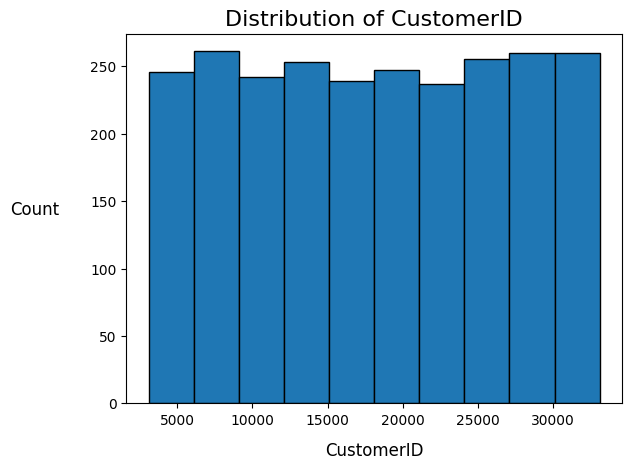

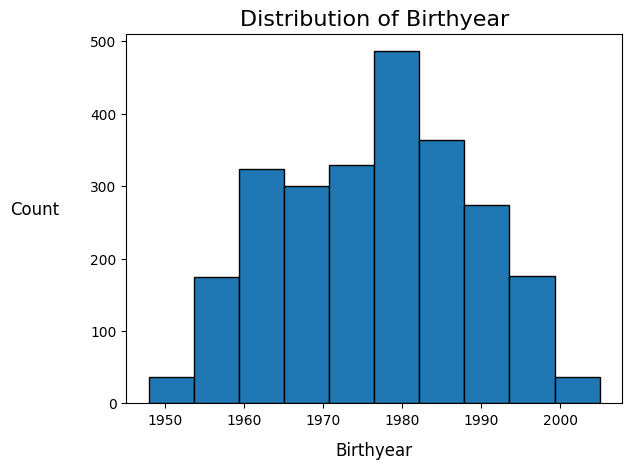

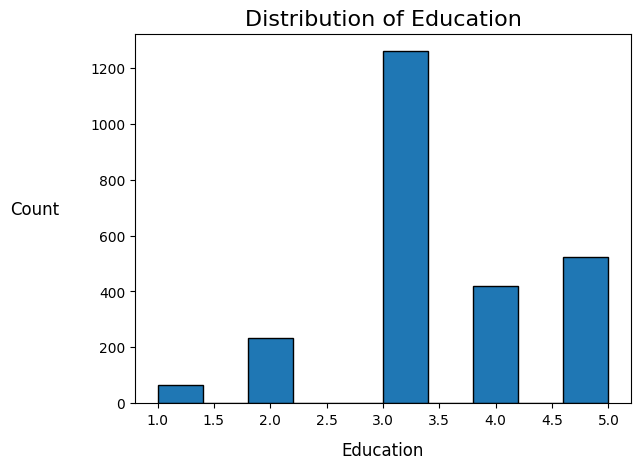

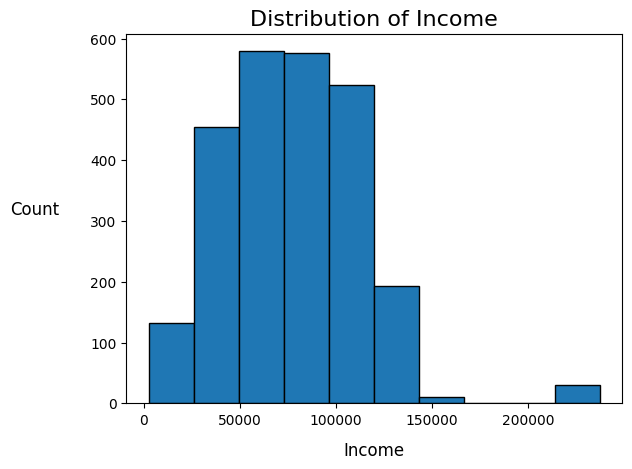

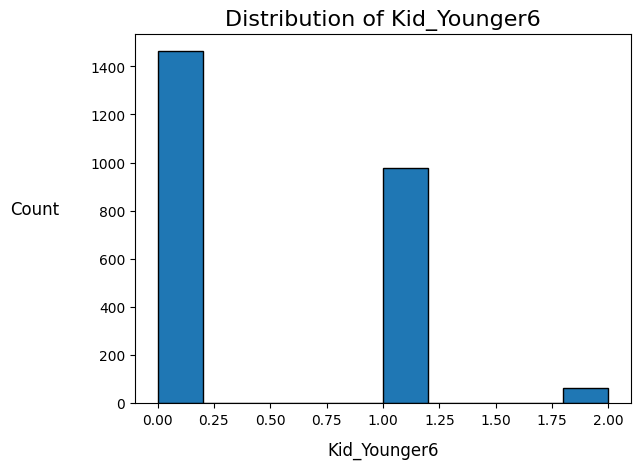

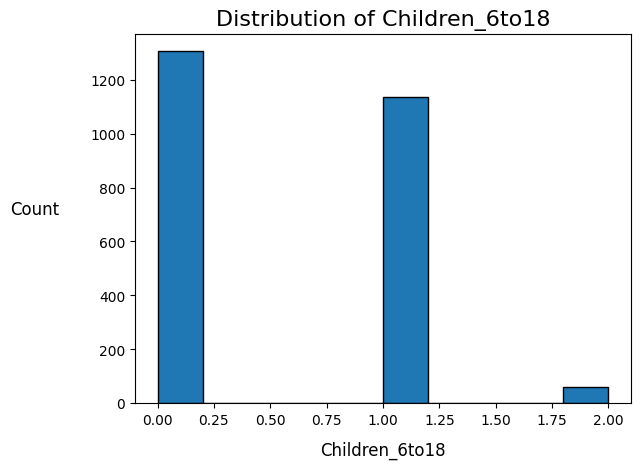

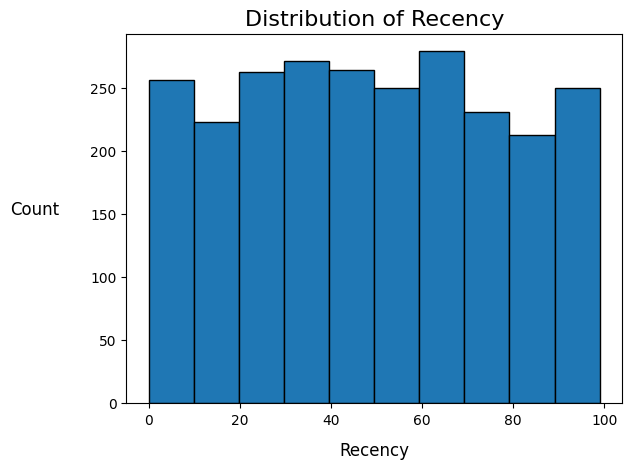

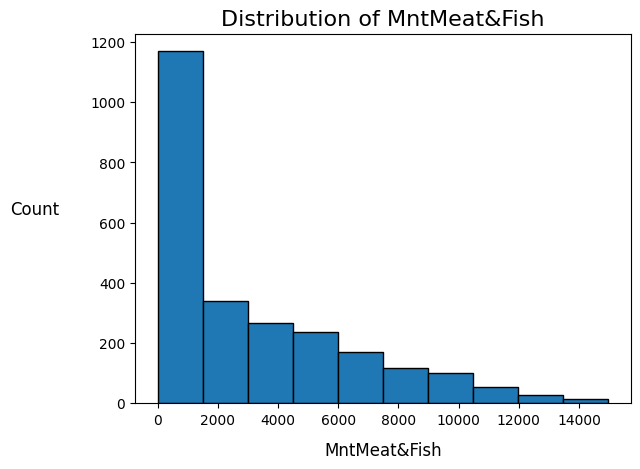

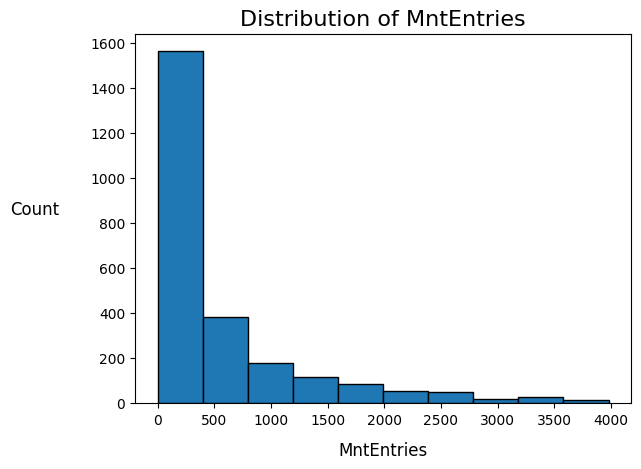

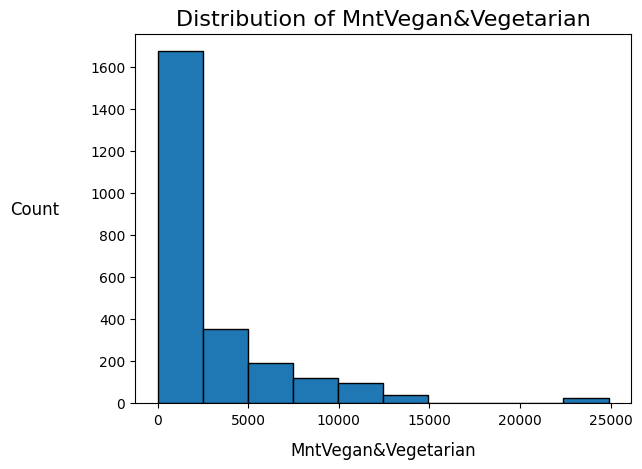

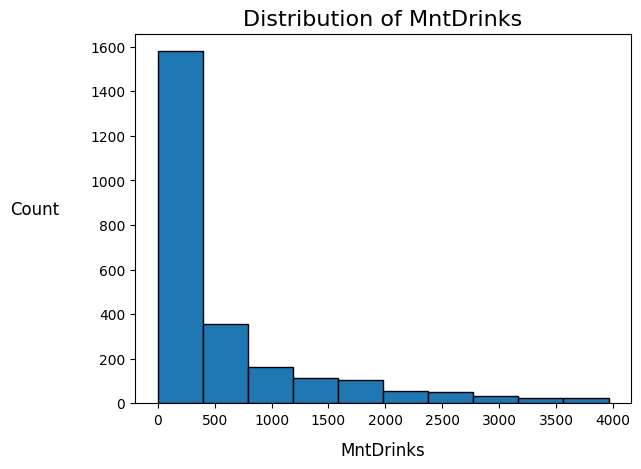

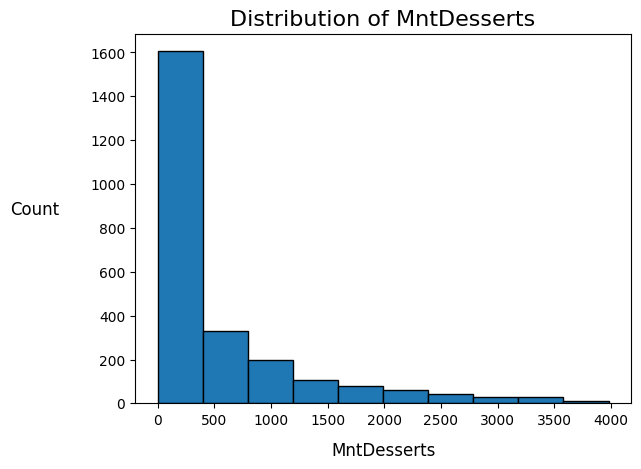

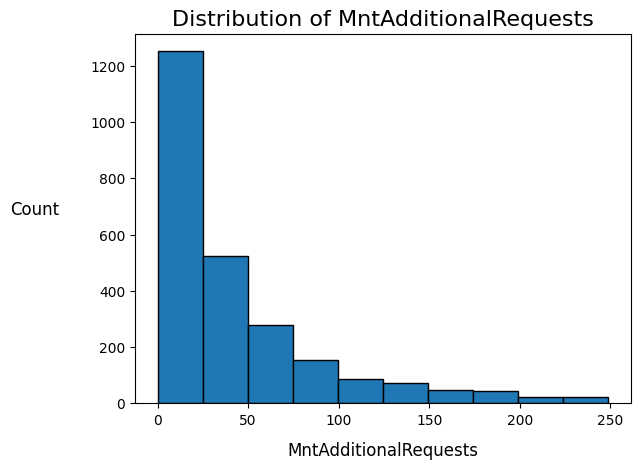

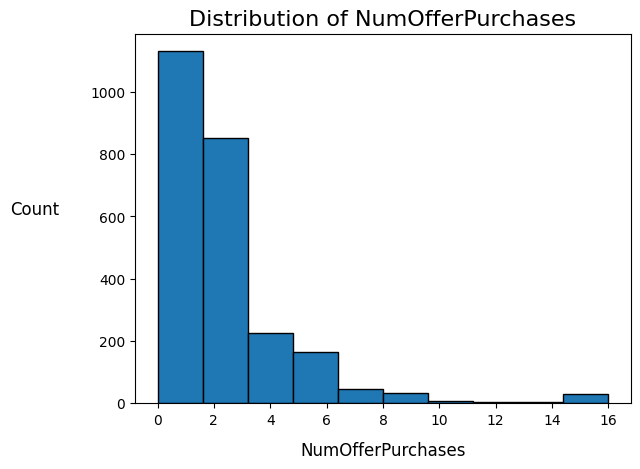

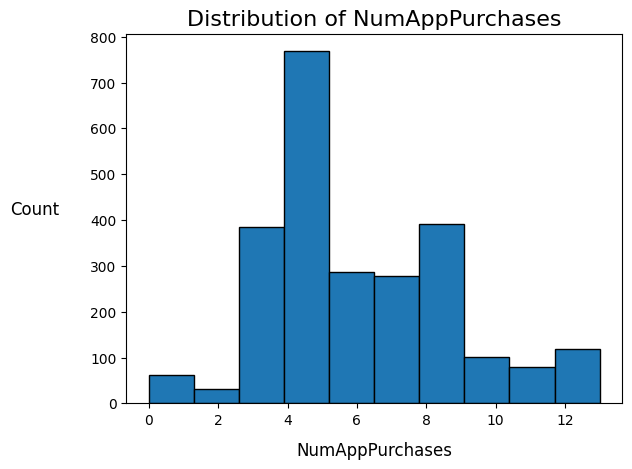

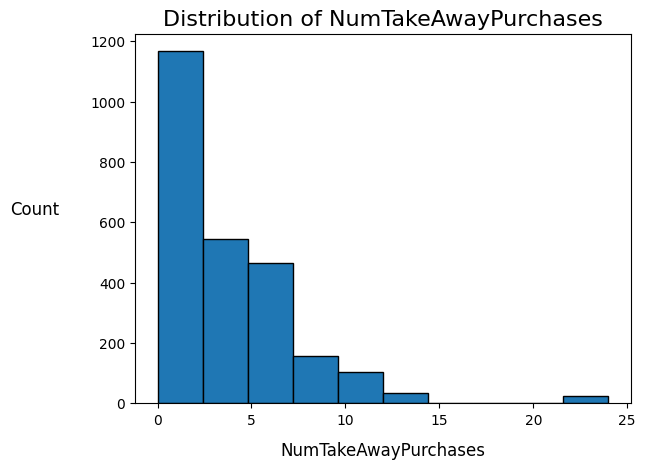

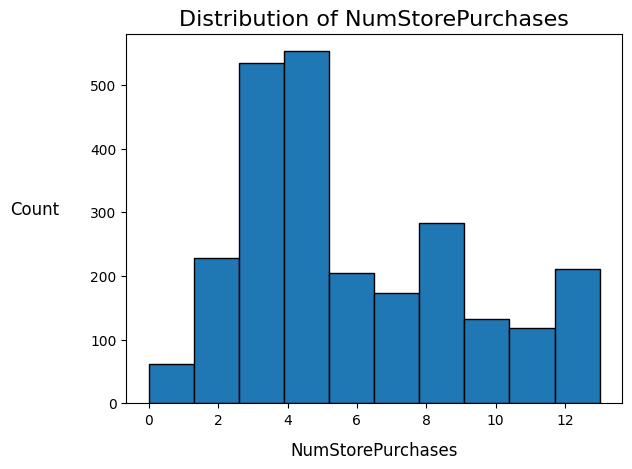

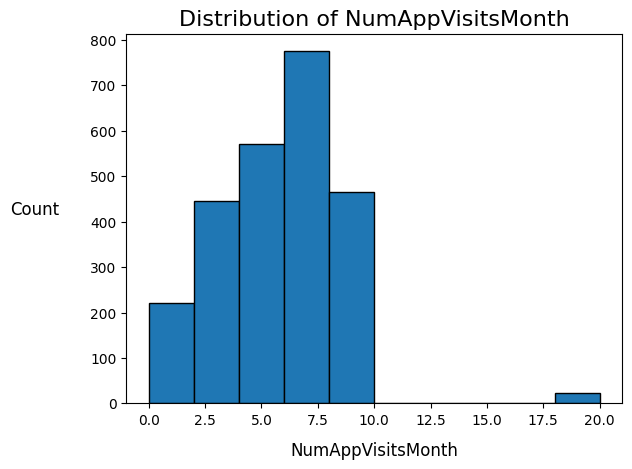

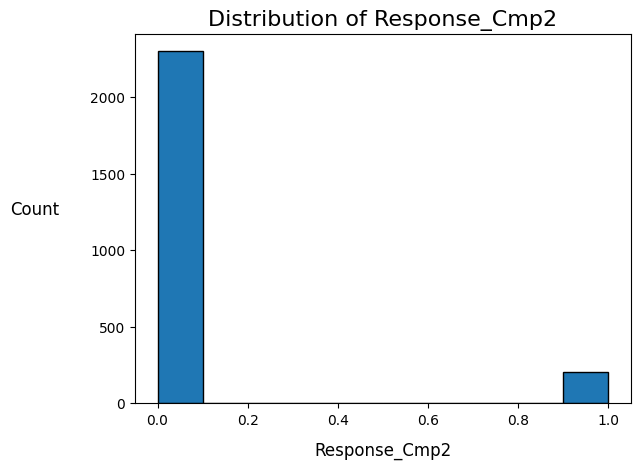

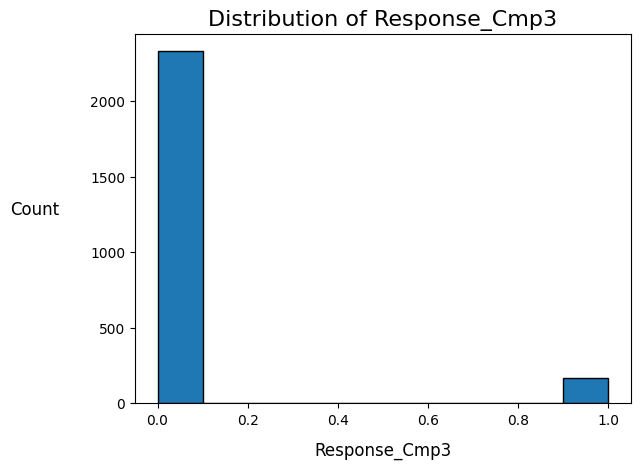

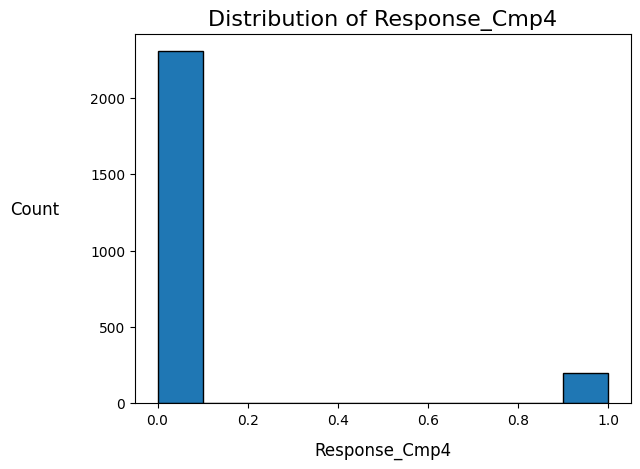

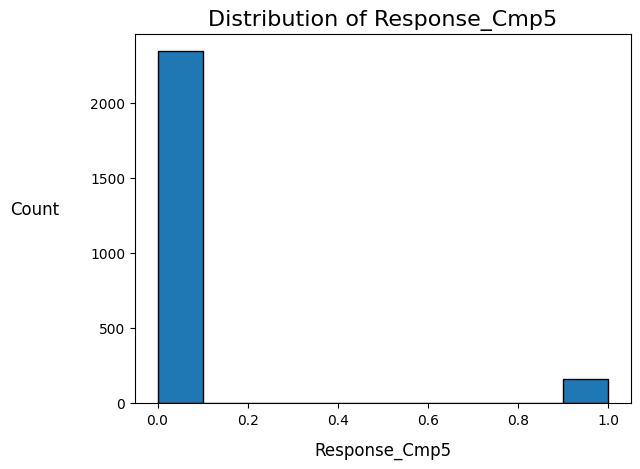

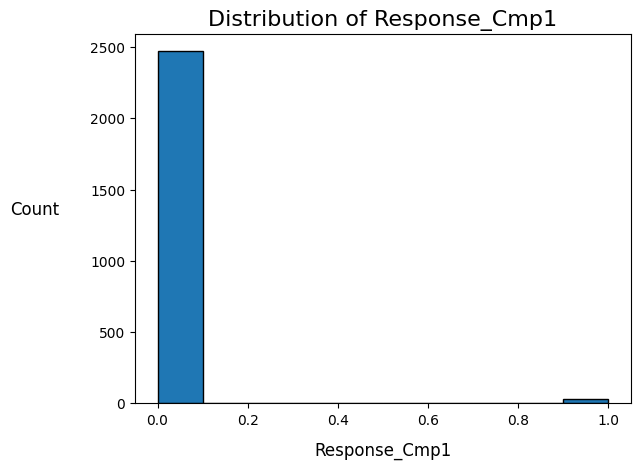

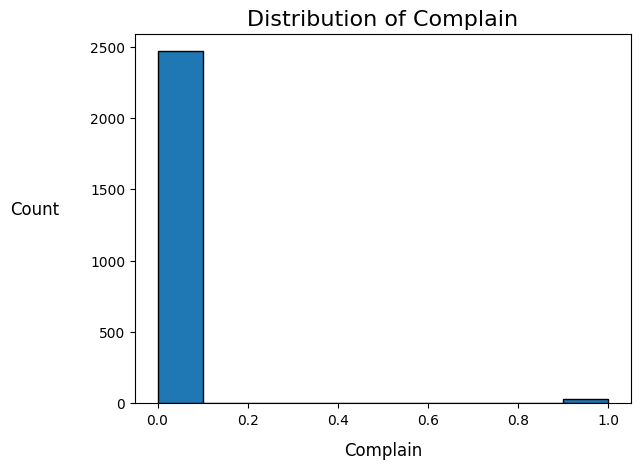

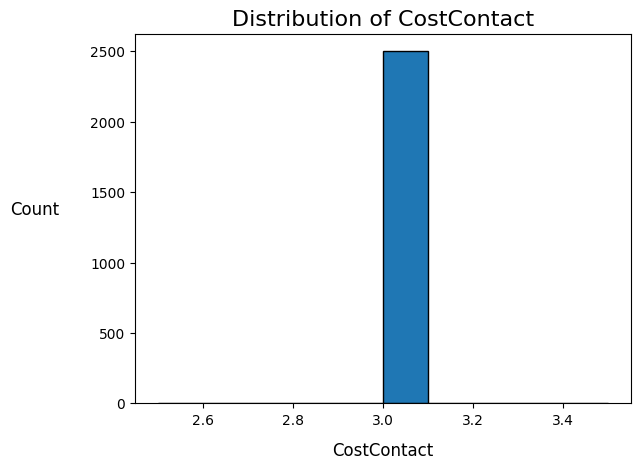

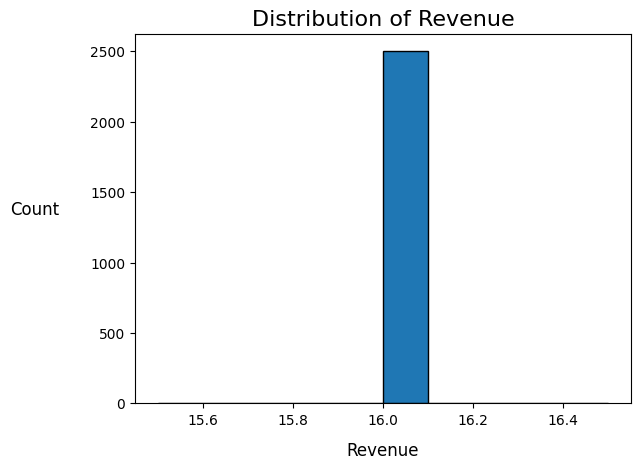

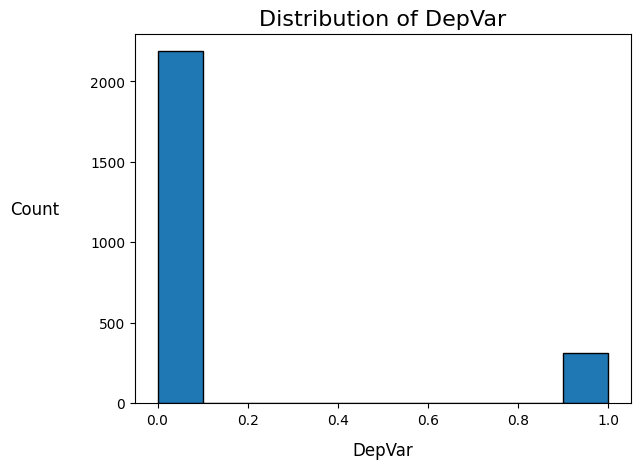

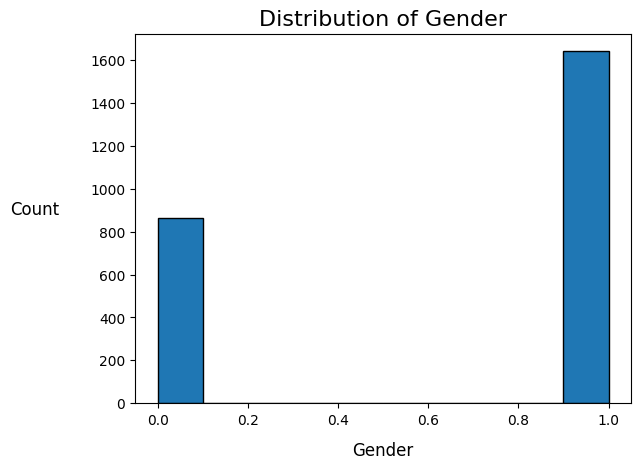

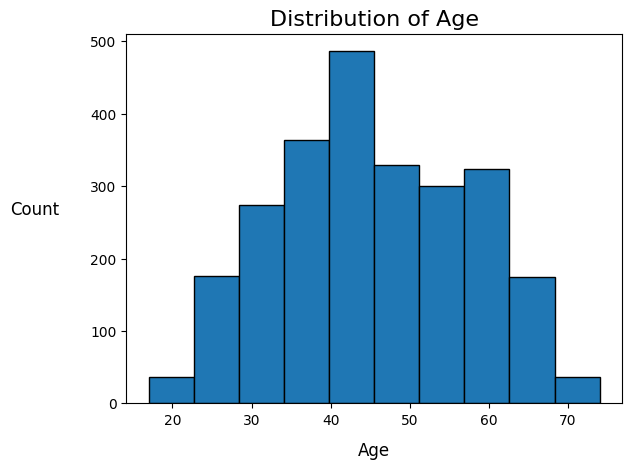

In [27]:
# Histogram of numerical variables

import matplotlib.pyplot as plt

for i in range(len(numerical_vars)):
    plt.hist(df_historical[numerical_vars[i]], edgecolor='black')
    plt.title(f'Distribution of {numerical_vars[i]}', fontsize=16)
    plt.xlabel(numerical_vars[i], fontsize=12, labelpad=10)
    plt.ylabel('Count', fontsize=12, rotation=0, labelpad=40)
    plt.show()

In [28]:
# Getting Education back as categorical variable

df_historical.loc[df_historical['Education']==1, "Education_c"] = 'basic'
df_historical.loc[df_historical['Education']==2, "Education_c"] = 'highschool'
df_historical.loc[df_historical['Education']==3, "Education_c"] = 'graduation'
df_historical.loc[df_historical['Education']==4, "Education_c"] = 'master'
df_historical.loc[df_historical['Education']==5, "Education_c"] = 'phd'

df_historical.drop('Education', axis=1, inplace=True)
df_historical.rename(columns={'Education_c': 'Education'}, inplace=True)
df_historical.T

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
CustomerID,30651,6222,3909,20121,19896,8769,4083,16590,15957,8013,...,7389,5703,11085,10131,13083,13344,28152,31938,20016,15492
Name,Mr. Trevor Ferguson,Mr. Peter Gray,Mrs. Theresa Wallace,Miss Lillian Alsop,Miss Lillian Dowd,Mr. Isaac Martin,Miss Hannah Rampling,Mr. Blake Buckland,Mr. Frank Rampling,Mr. Simon Peake,...,Mr. Richard Taylor,Mr. David Scott,Mr. Kevin North,Mrs. Sophie Payne,Mr. David Ferguson,Mr. Justin Metcalfe,Mr. Brandon Nash,Mr. Simon Mills,Mr. Brandon Poole,Miss Emily Wilkins
Birthyear,1987,1973,1961,1977,1961,1968,1970,1974,1970,1975,...,1982,1996,1991,1981,2000,1967,1968,1970,1966,1975
Marital_Status,married,together,married,together,together,married,single,married,married,married,...,married,together,married,married,single,widow,married,single,married,together
Income,46575.0,48852.0,91345.0,102522.0,38770.0,60661.0,45174.0,69035.0,121690.0,54624.0,...,62490.0,11212.0,32146.0,49591.0,82342.0,89377.0,95486.0,28620.0,59998.0,64162.0
Kid_Younger6,0,1,0,0,0,0,0,0,0,1,...,1,1,1,1,0,0,0,1,1,0
Children_6to18,0,0,1,1,0,1,1,0,0,1,...,1,0,0,0,0,0,1,1,1,1
Date_Adherence,2022-02-20 00:00:00,2022-01-13 00:00:00,2021-04-21 00:00:00,2021-05-30 00:00:00,2020-11-19 00:00:00,2021-04-16 00:00:00,2020-10-27 00:00:00,2020-10-07 00:00:00,2021-07-30 00:00:00,2021-04-28 00:00:00,...,2021-05-06 00:00:00,2020-09-29 00:00:00,2021-11-15 00:00:00,2020-11-04 00:00:00,2021-06-15 00:00:00,2021-09-26 00:00:00,2021-11-15 00:00:00,2022-01-27 00:00:00,2020-08-11 00:00:00,2021-05-22 00:00:00
Recency,71.0,34.0,75.0,95.0,46.0,85.0,23.0,61.0,66.0,90.0,...,75.0,2.0,37.0,86.0,2.0,11.0,4.0,47.0,26.0,95.0
MntMeat&Fish,30,130,4160,3120,30,2550,80,5920,10220,180,...,580,739,10,40,8910,2530,7380,140,640,570


In [29]:
num_var

['CustomerID',
 'Birthyear',
 'Income',
 'Kid_Younger6',
 'Children_6to18',
 'Recency',
 'MntMeat&Fish',
 'MntEntries',
 'MntVegan&Vegetarian',
 'MntDrinks',
 'MntDesserts',
 'MntAdditionalRequests',
 'NumOfferPurchases',
 'NumAppPurchases',
 'NumTakeAwayPurchases',
 'NumStorePurchases',
 'NumAppVisitsMonth',
 'Response_Cmp2',
 'Response_Cmp3',
 'Response_Cmp4',
 'Response_Cmp5',
 'Response_Cmp1',
 'Complain',
 'CostContact',
 'Revenue',
 'DepVar']

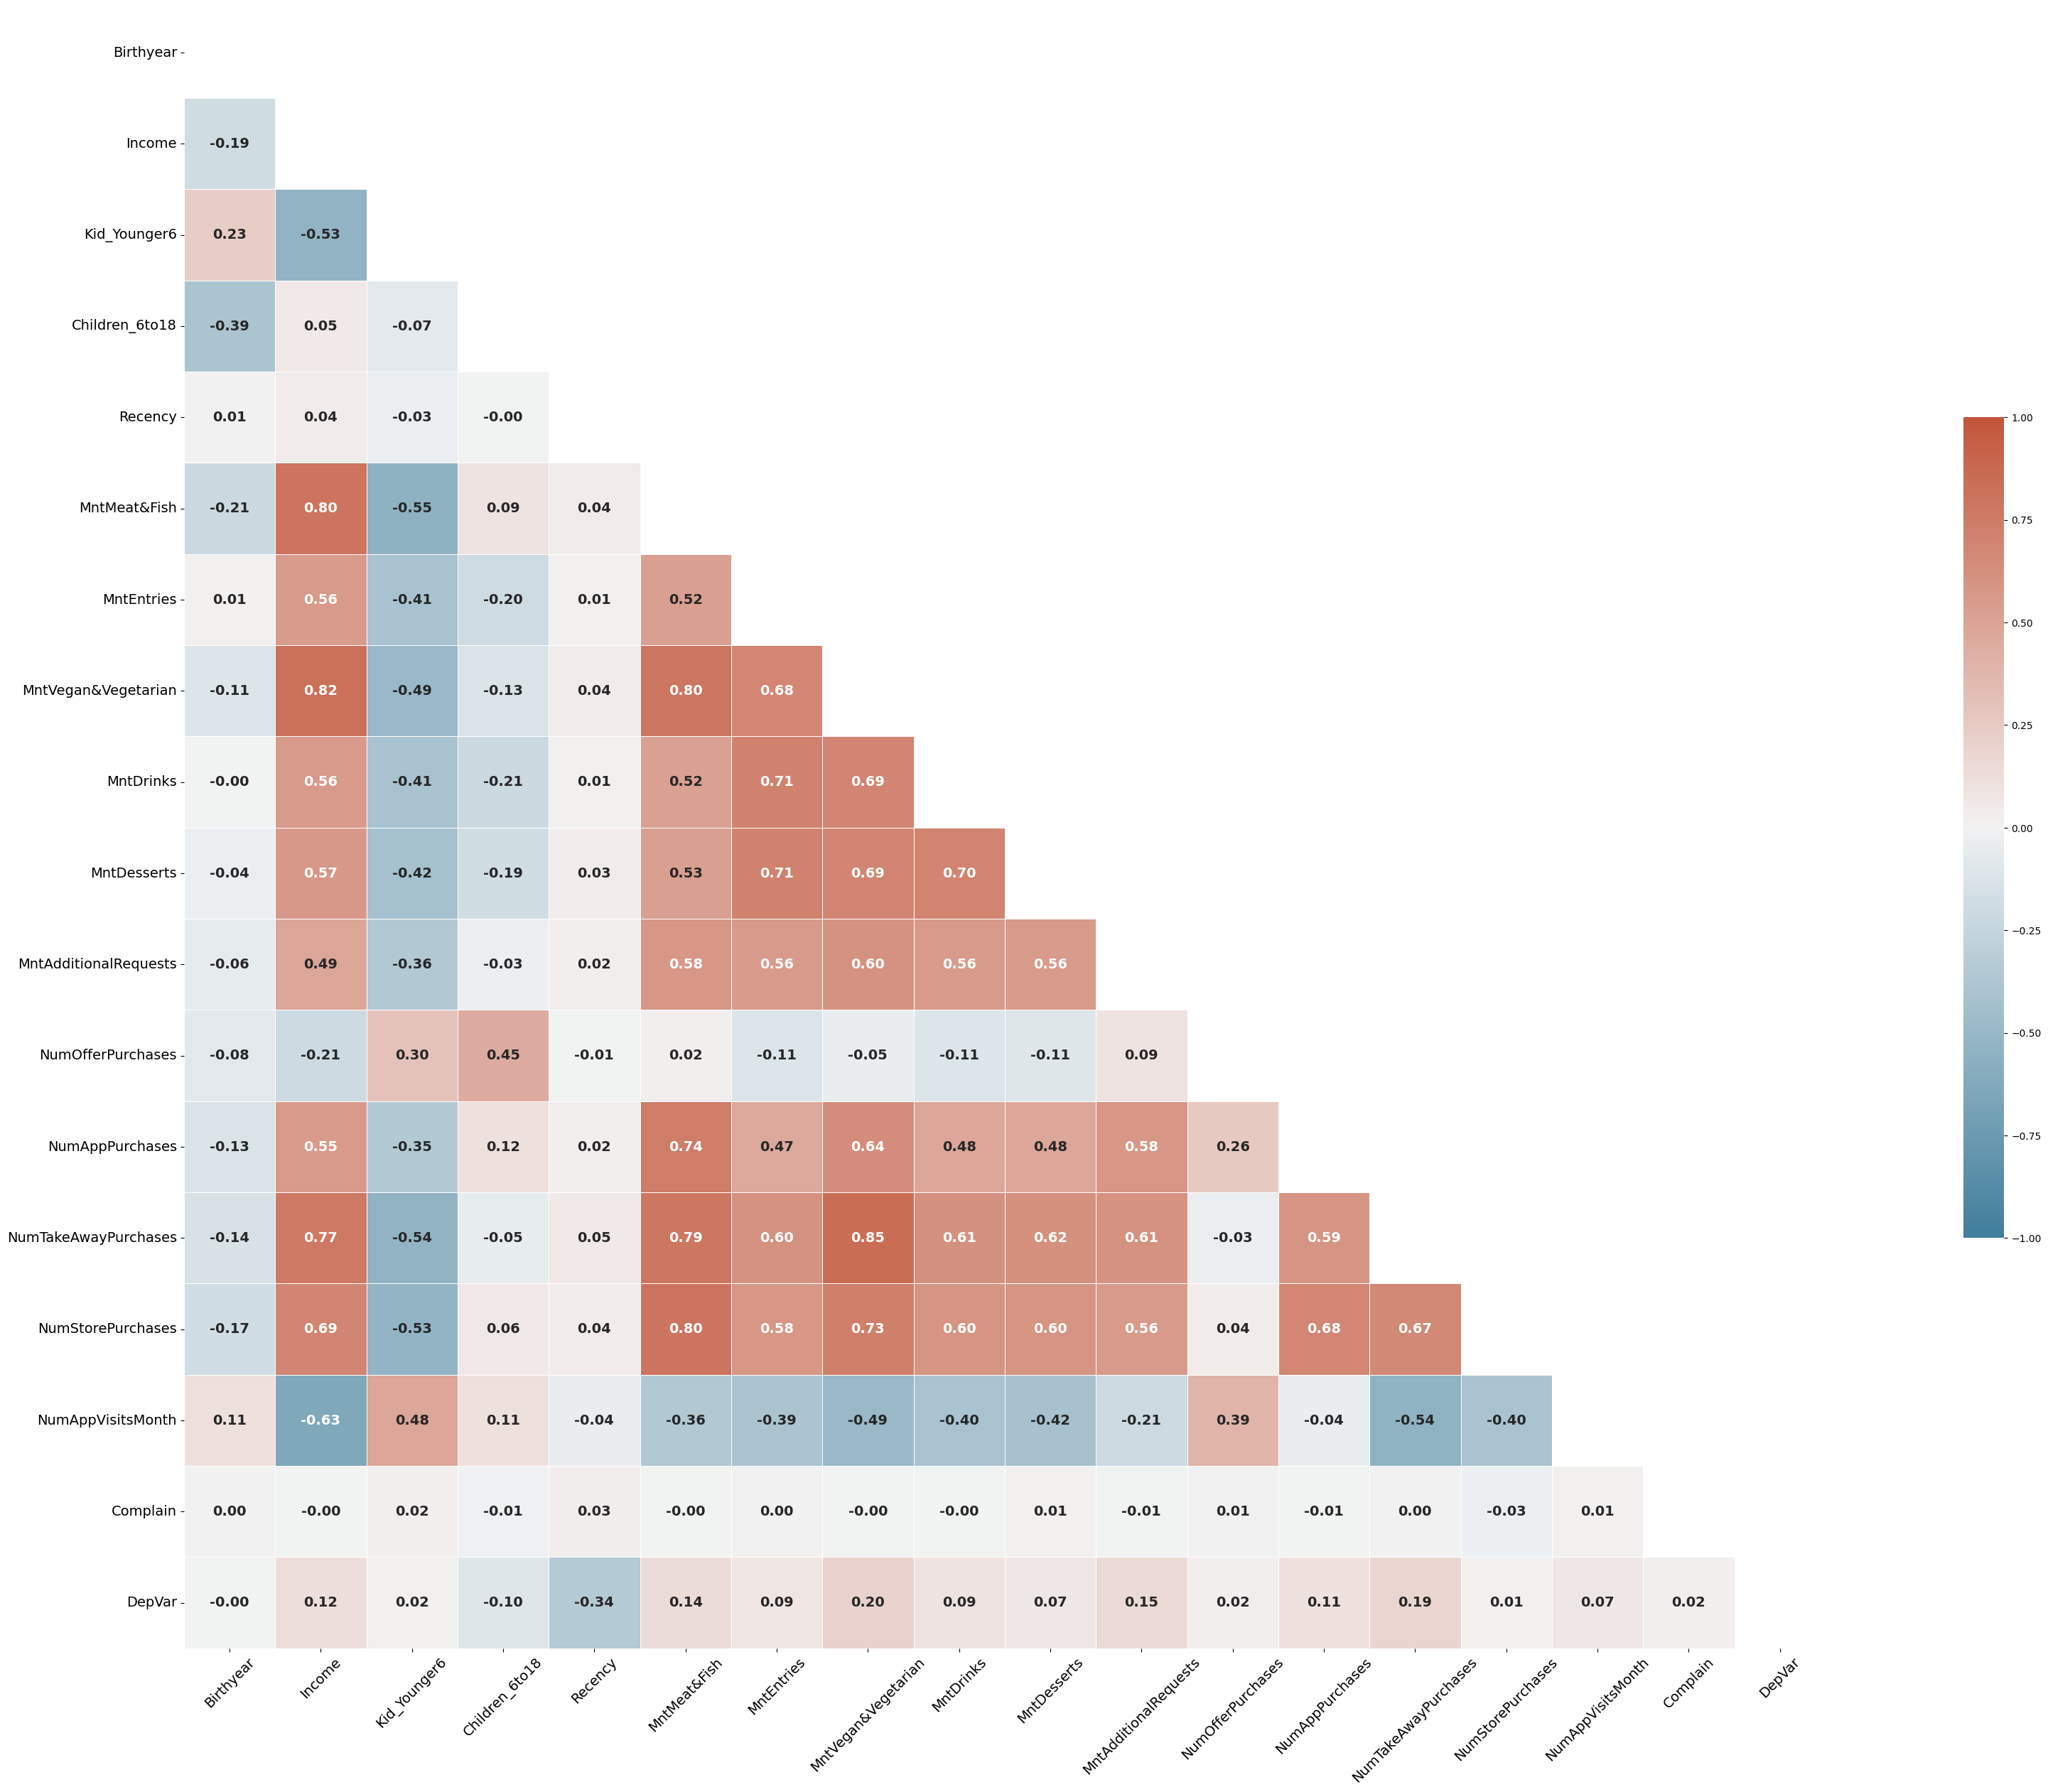

In [30]:
import numpy as np
import seaborn as sns

df_var_numerical=df_historical[num_var].drop(['CustomerID','Response_Cmp1','Response_Cmp2','Response_Cmp3','Response_Cmp4','Response_Cmp5', 'CostContact', 'Revenue'],axis=1).copy()

# Compute the correlation matrix
df_corr = df_var_numerical.corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, annot=True, fmt='0.2f', linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"fontweight": "bold", "fontsize": "14"})
# Draw the heatmap with the mask and correct aspect ratio
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.show()

In [31]:
# Setting `Customer_ID` as index.

df_historical.set_index('CustomerID', inplace = True)

## Cross-Validation

Create a new instance of StratifiedKFold named as `skf`, with the following hyperparameters:
- n_splits = 5
- random_state = 99
- shuffle = True

In [32]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)

To apply any of the model assessment techniques previously mentioned, we need to define at first what are our independent variables (`X`) and the target (`y`).

In [33]:
X = df_historical.drop('DepVar', axis = 1)
y = df_historical['DepVar'].copy()

<a class="anchor" id="4th-bullet">

## 3.1. Feature Selection
    
</a>

In this step we are going to apply Feature Selection, namely:
- __Variance (Filter Method)__ 
- __Spearman Correlation (Filter Method)__ 
- __Recursive Feature Elimination (RFE) (Wrapper Method)__
- __Lasso Regression (Wrapper Method)__
- __Decision Trees (Embedded Method)__

Since we know that regressions are really sensible to correlated features, we should remove the correlated features before applying those techniques, namely Lasso Regression and Recursive Feature Elimination if the estimator used is a regression model.

In that way, we are going to apply the feature selection techniques in the following order: <br>
__(1) Variance__ - To  understand if there are any constant variables;<br>
__(2) Spearman Correlation__ - To verify if there are any correlated features;<br>
__(3) Decision Trees__ - To just keep one variable from a group of correlated features;<br>
__(4) RFE__ - To iteratively select features by considering subsets of features;<br>
__(5) Lasso__ - To identify and select important features in a dataset;<br>

Furthermore, to apply Feature selection, we need at first to identify the data type of each variable, since different techniques are specific to different data types.


In [34]:
############################################ FEATURE SELECTION ############################################
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

import warnings
warnings.filterwarnings('ignore')

In [35]:
cat_var = df_historical.select_dtypes(include=['object']).columns.tolist()
num_var= df_historical.select_dtypes(exclude=['object']).columns.tolist()

print("The numerical variables are: \n{}.".format((num_var)))
print("\nThe non-numerical variables are:\n{}.".format(cat_var))

print("\nIn summary:")
pd.DataFrame(([cat_var, num_var]),index = ['Categorical Variables', 'Numerical Variables']).T

The numerical variables are: 
['Birthyear', 'Income', 'Kid_Younger6', 'Children_6to18', 'Recency', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Response_Cmp1', 'Complain', 'CostContact', 'Revenue', 'DepVar', 'Gender', 'Age'].

The non-numerical variables are:
['Name', 'Marital_Status', 'Date_Adherence', 'Education'].

In summary:


,Categorical Variables,Numerical Variables
0,Name,Birthyear
1,Marital_Status,Income
2,Date_Adherence,Kid_Younger6
3,Education,Children_6to18
4,None,Recency
5,None,MntMeat&Fish
6,None,MntEntries
7,None,MntVegan&Vegetarian
8,None,MntDrinks
9,None,MntDesserts


In [36]:
# Dropping some variables that were deemed not relevant for analysis

X = X.drop(['Date_Adherence', 'Birthyear', 'Name'], axis = 1)

<a class="anchor" id="5th-bullet">

### 3.1.1. Categorical features
    
</a>

We are going to use chi-square to understand which categorical variables should we keep. <br>


<a class="anchor" id="6th-bullet">

#### __`3.1.1.1. Chi-Square (Filter Method) - For categorical data`__
    
</a>

__`Step 8`__ - Create a function named as `apply_chisquare` to select features from the categorical variables using `chi2_contigency`from `scipy.stats`.

In [37]:
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

import warnings
warnings.filterwarnings('ignore')

In [38]:
def apply_chisquare(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
        #print(f'The p-value is {p}, which is lower than the alpha. Thus, we reject the null hypothesis in this variable')
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
        #print(f'The p-value is {p}, which is higher than the alpha. Thus, we fail to reject the null hypothesis in this variable')

    print(result)

Now it is time to select the categorical features to keep. <br> 
Remember that we want to select features that are important, independently of the subset of data that is being used for train. <br> 
For that, we need to apply our function previously defined inside the StratifiedKFold.

__`Step 9`__ - Create a function named as `select_best_cat_features` that receives the independent variables (X) and the target (y). <br>
Inside of this function, follow these steps:<br>
- Apply the previously defined StratifiedKFold as "skf" for cross-validation.
- Fill missing data, focusing on the categorical features.
- Correct misclassifications in the categorical data that were identified during exploration.
- Call the "apply_chisquare" function on your categorical variables.

In [39]:
def get_binary_columns(df):
    binary_columns = []
    for column in df.columns:
        unique_values = df[column].unique()
        if len(unique_values) == 2 and all(value in [0, 1] for value in unique_values):
            binary_columns.append(column)
    return binary_columns

binary_cols = get_binary_columns(X)
print("The binary variables are:", binary_cols)

The binary variables are: ['Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Response_Cmp1', 'Complain', 'Gender']


In [40]:
def select_best_cat_features(X,y):
    count = 1
    
    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        colunas=binary_cols + ['Education']  + ['Marital_Status']  
        # check which features to use using chi-square
        X_train_cat = X_train[colunas].copy()
        for var in X_train_cat:
            apply_chisquare(X_train_cat[var],y_train, var)
            
        count+=1

In [41]:
select_best_cat_features(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Response_Cmp2 is IMPORTANT for Prediction
Response_Cmp3 is IMPORTANT for Prediction
Response_Cmp4 is IMPORTANT for Prediction
Response_Cmp5 is IMPORTANT for Prediction
Response_Cmp1 is IMPORTANT for Prediction
Complain is NOT an important predictor. (Discard Complain from model)
Gender is NOT an important predictor. (Discard Gender from model)
Education is NOT an important predictor. (Discard Education from model)
Marital_Status is IMPORTANT for Prediction
_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________

#### Conclusions

| Predictor | Chi-Square | What to do? (One possible way to "solve")|
| --- | --- | --- |
| Gender | 5 NO | Remove |
| Education | 1 YES & 4 NO | Remove|
| Marital_Status | 4 YES & 1 No |Keep|
| Response_Cmp2 | 5 YES |Keep|
| Response_Cmp3 | 5 YES |Keep|
| Response_Cmp4 | 5 YES |Keep|
| Response_Cmp5 | 5 YES |Keep|
| Response_Cmp1 | 5 YES |Keep|
| Complain | 5 No |Remove|

We should keep only the Marital_Status and the Response_Cmp Variables

In [42]:
# Remove the variables that are not considered important from chi-square, namely Gender, Complain and Education.

X.drop(['Gender', 'Education', 'Complain'], axis = 1, inplace=True)

In [43]:
X.columns

Index(['Marital_Status', 'Income', 'Kid_Younger6', 'Children_6to18', 'Recency',
       'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases',
       'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases',
       'NumAppVisitsMonth', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4',
       'Response_Cmp5', 'Response_Cmp1', 'CostContact', 'Revenue', 'Age'],
      dtype='object')

<a class="anchor" id="7th-bullet">

### 3.1.2. Numerical features
    
</a>

<a class="anchor" id="8th-bullet">

__`3.1.2.1. Variance (Filter Method) - For continuous, ordinal and binary data`__
    
</a>

We can use variance to understand if our numerical data and ordinal data is constant or quasi-constant.

In [44]:
# Creating a variance function

def apply_variance(X_train):
    print(X_train.var())

Create a function named as `select_features_variance` that receives the independent variables (X) and the target (y). <br>
Inside of this function:
- Apply the previously defined StratifiedKFold as "skf" for cross-validation.
- Fill missing data, focusing this time on the numerical variables.
- Call the "apply_variance" function on your data.

In [45]:
X

,Marital_Status,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,...,NumStorePurchases,NumAppVisitsMonth,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Response_Cmp1,CostContact,Revenue,Age
CustomerID,,,,,,,,,,,,,,,,,,,,,
30651,married,46575.0,0,0,71.0,30,0,60,60.0,140,...,2,7,0,0,0,0,0,3,16,35.0
6222,together,48852.0,1,0,34.0,130,0,60,0.0,0,...,2,8,0,0,0,0,0,3,16,49.0
3909,married,91345.0,0,1,75.0,4160,380,2730,380.0,380,...,10,6,0,0,0,0,0,3,16,61.0
20121,together,102522.0,0,1,95.0,3120,420,3090,1560.0,1840,...,10,5,0,0,0,0,0,3,16,45.0
19896,together,38770.0,0,0,46.0,30,20,150,40.0,40,...,2,9,0,0,0,0,0,3,16,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,widow,89377.0,0,0,11.0,2530,1680,2220,2380.0,1960,...,13,3,0,0,0,0,0,3,16,55.0
28152,married,95486.0,0,1,4.0,7380,0,3480,200.0,400,...,7,7,0,0,0,0,0,3,16,54.0
31938,single,28620.0,1,1,47.0,140,60,315,20.0,20,...,2,8,1,0,0,0,0,3,16,52.0


In [49]:
# Dropping Marital Status

X_mar_drop = X.copy()
X_mar_drop.drop(["Marital_Status"], axis = 1, inplace=True)
X_mar_drop

def select_features_variance(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using variance
        apply_variance(X_train)
            
        count+=1

# Call your function select_features_variance passing as arguments your independent variables and your target.

select_features_variance(X_mar_drop,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Income                   1.280089e+09
Kid_Younger6             2.953654e-01
Children_6to18           2.931343e-01
Recency                  8.008605e+02
MntMeat&Fish             1.133034e+07
MntEntries               5.661167e+05
MntVegan&Vegetarian      1.531684e+07
MntDrinks                6.164152e+05
MntDesserts              5.681426e+05
MntAdditionalRequests    2.402257e+03
NumOfferPurchases        5.439750e+00
NumAppPurchases          7.553717e+00
NumTakeAwayPurchases     1.179090e+01
NumStorePurchases        1.099567e+01
NumAppVisitsMonth        7.420221e+00
Response_Cmp2            7.405678e-02
Response_Cmp3            6.340770e-02
Response_Cmp4            7.321636e-02
Response_Cmp5            5.993397e-02


#### What can we conclude?

- `CostContact` and `Revenue` are constant features. We should remove those.

In [57]:
X.drop(['CostContact', 'Revenue'], axis = 1, inplace=True)

# Doing the same for the temporary dataframe

X_mar_drop.drop(['CostContact', 'Revenue'], axis = 1, inplace=True)


<a class="anchor" id="9th-bullet">

__`3.1.2.2. Spearman Correlation (Filter Method) - For continuous and ordinal data`__
    
</a>

We can use Spearman correlation to determine if we have redundant variables that should be removed due to their high correlation. 

However, it's important to note that applying Spearman correlation to binary variables may not yield meaningful or accurate results. This correlation measure is more suitable for continuous and ordinal data. 

Therefore:
- Since our target is binary, we should not consider the correlation of the independent variables with the target variable to understand if they are "important". 

In [51]:
binaries = X.columns[X.isin([0,1]).all()]
print(binaries)

Index(['Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5',
       'Response_Cmp1'],
      dtype='object')


Create a function named as `cor_heatmap` that receives a correlation matrix, with a threshold of 0.8, so as not to remove too many variables

In [52]:
def cor_heatmap(cor):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(cor, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(50, 30))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Create a mask to filter values based on the condition
    condition_mask = (cor > 0.7) | (cor < -0.7)
    # Apply the condition mask to the correlation matrix
    masked_corr = cor.mask(~condition_mask)

    sns.heatmap(masked_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, annot=True, fmt='0.1', linewidths=.5, 
                cbar_kws={"shrink": .5}, annot_kws={"fontweight": "bold", "fontsize": "18"})
    # Increase the tick distance from the plot
    plt.tick_params(axis='y', which='both', pad=20)
    # Draw the heatmap with the mask and correct aspect ratio
    plt.xticks(fontsize=18, rotation=45)
    plt.yticks(fontsize=18)
    
    plt.show()

__`Step 15`__ - Create a function named `apply_correlation` that takes your training data as input. In this function:

- Remove all Response variables, as well as `Complain` and `Gender`, as they are binary and this not suitable for the correlation matrix.
- Create an object named `matrix` to store the results of the Spearman correlation matrix for our data.
- Call the previously defined function `cor_heatmap` to generate the correlation heatmap.

In [53]:
def apply_correlation(X_train):
    #correlation_data = X_train.drop(['Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5',
    #   'Response_Cmp1'], axis = 1).copy()
    correlation_data = X_train.drop(binaries,axis=1).copy()
    matrix = correlation_data.corr(method = 'spearman')
    cor_heatmap(matrix)
    
    for column in matrix.columns:
        high_correlation = matrix[abs(matrix[column] > 0.7) & (matrix[column] < 1)][column]
        if not high_correlation.empty:
            for index, value in high_correlation.items():
                print(f"Column: {column}, Row: {index}, Correlation: {value}")

Similarly to what we have done in the chi-square test and in the variance, we will now examine the correlation of the independent features in the training data, regardless of the specific train subset being used.

__`Step 16`__ - Create a function named as `redundant_features` that receives the independent variables (X) and the target (y). <br>
Inside of this function, follow these steps:<br>
- Apply the previously defined StratifiedKFold as "skf" for cross-validation.
- Fill missing data, focusing this time on the numerical variables.
- Call the "apply_correlation" function on your data.

In [54]:
def redundant_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        
        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')
        
        # check which features to use using spearman correlation
        apply_correlation(X_train)
        
        count+=1

__`Step 16B`__ - Call your function `redundant_features` passing as arguments your independent variables and your target.

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


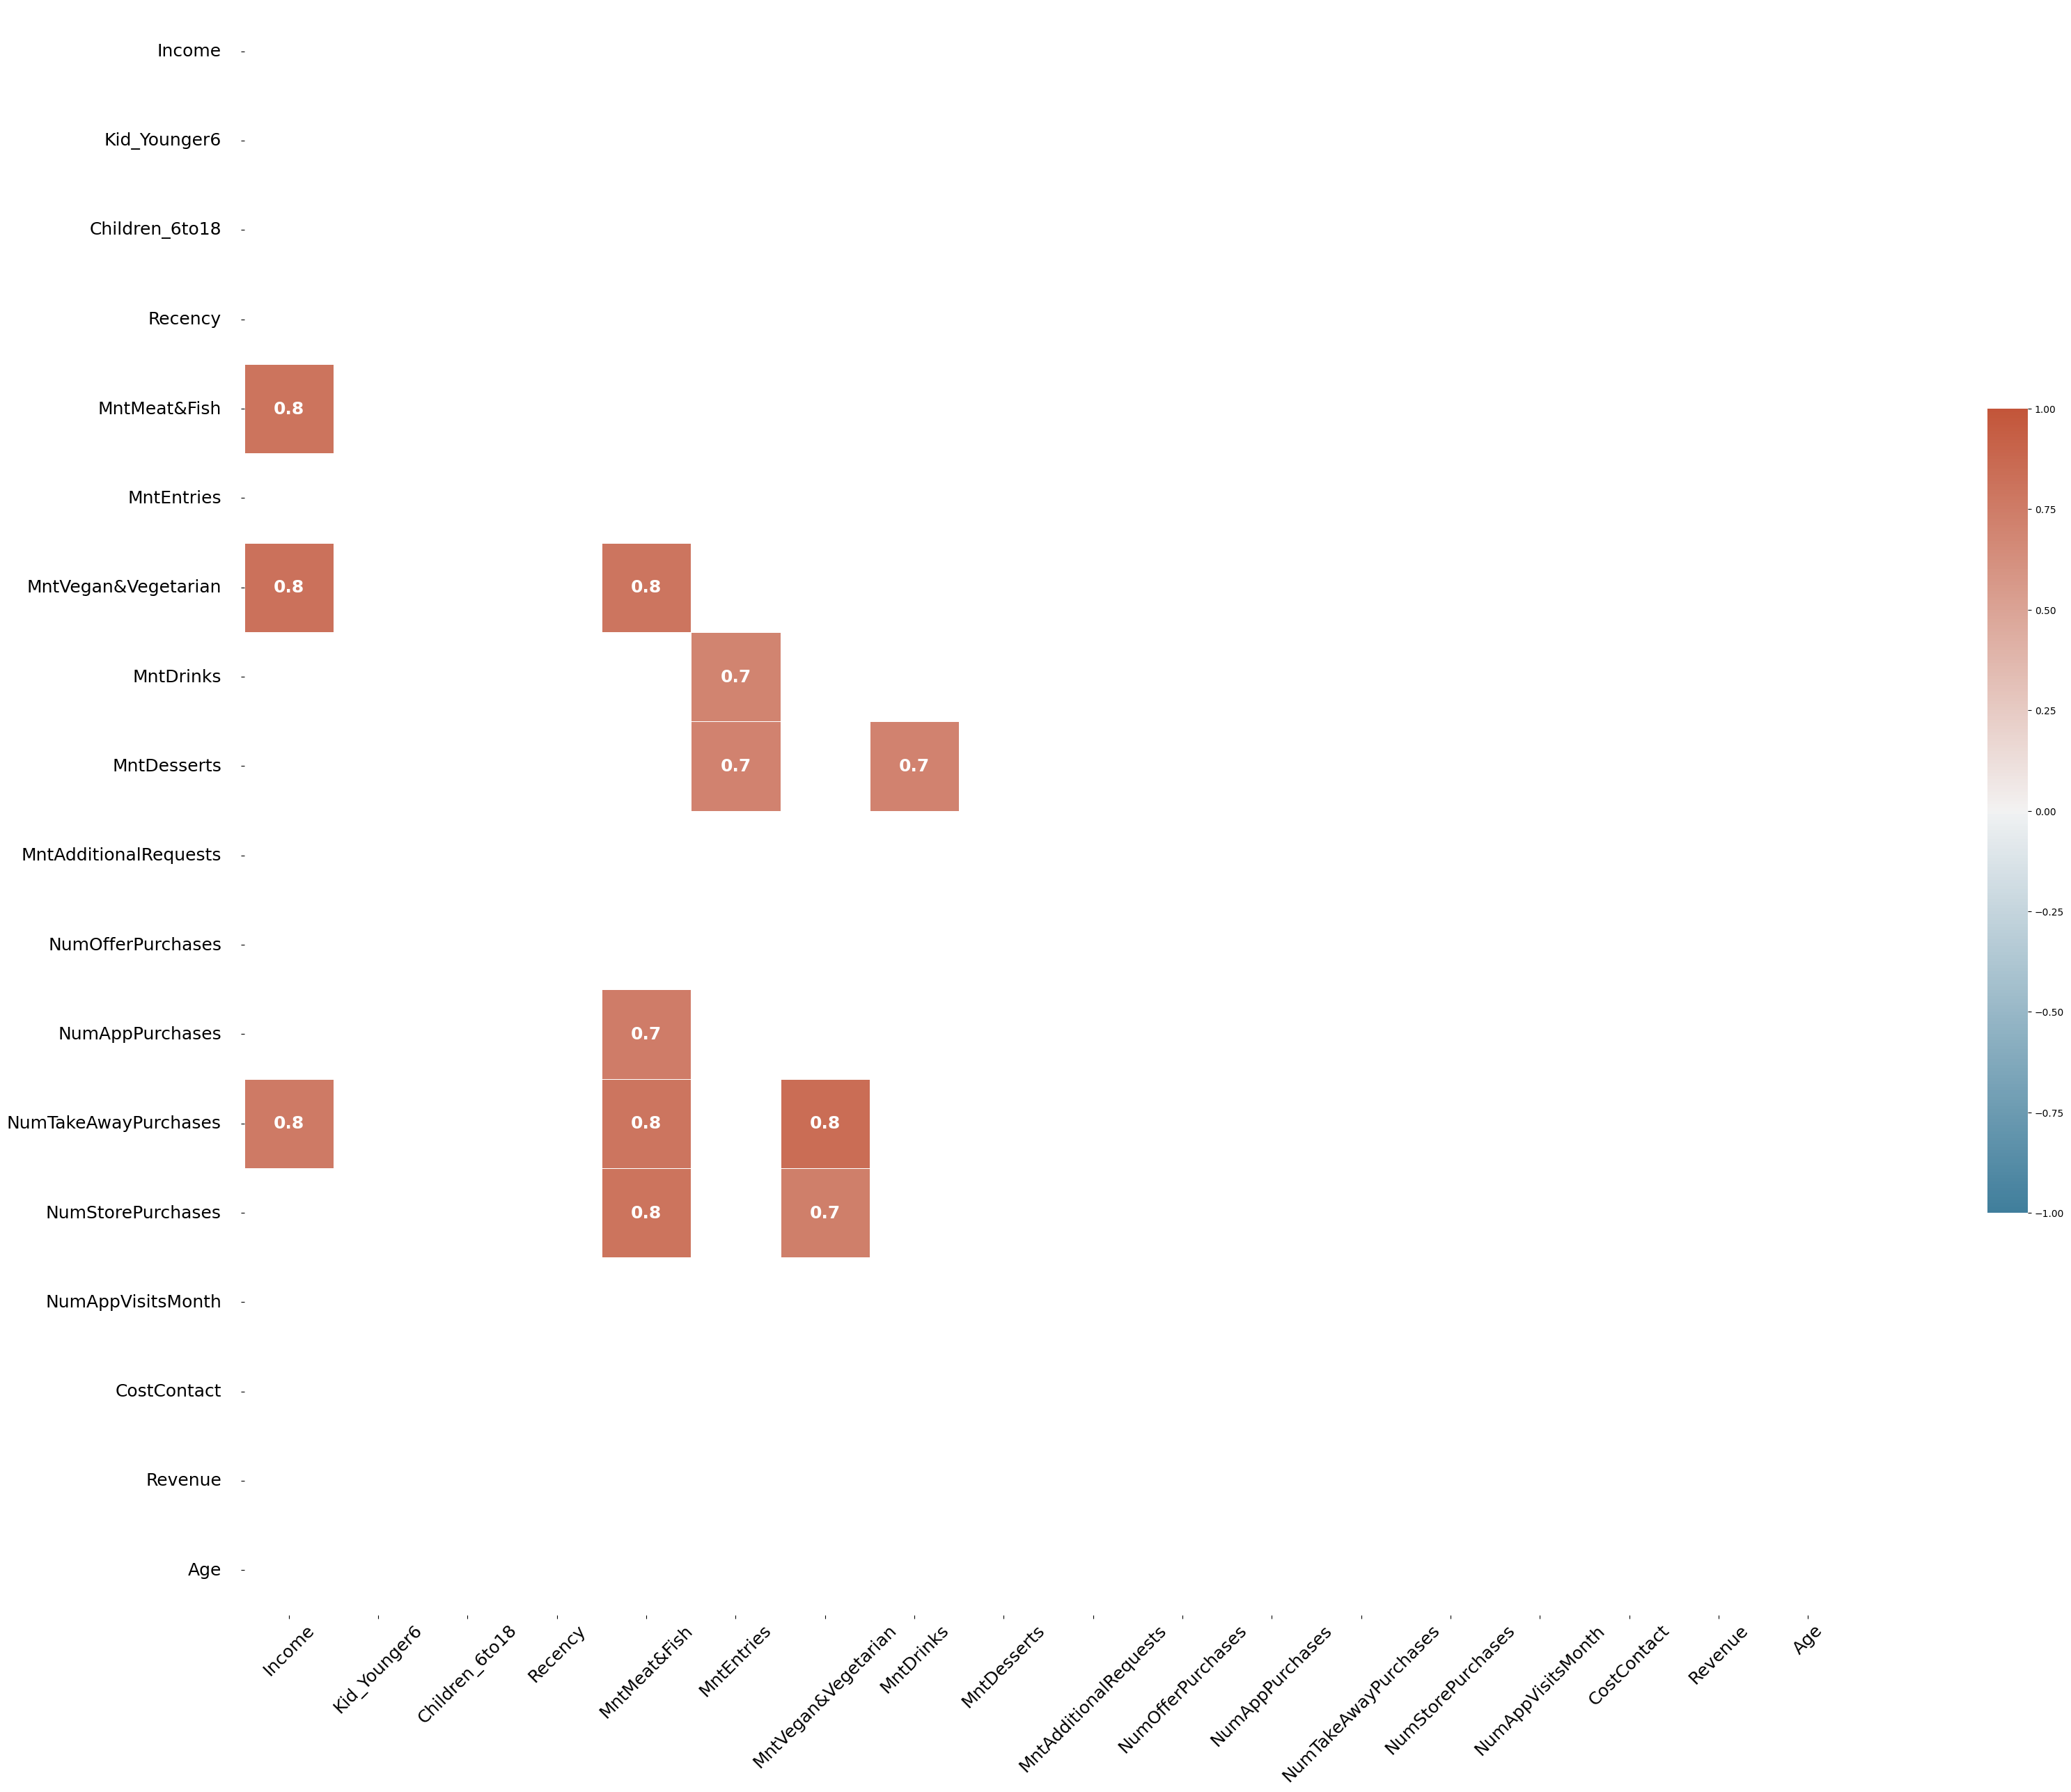

Column: Income, Row: MntMeat&Fish, Correlation: 0.8034867513027342
Column: Income, Row: MntVegan&Vegetarian, Correlation: 0.8164325724739118
Column: Income, Row: NumTakeAwayPurchases, Correlation: 0.764467218499857
Column: MntMeat&Fish, Row: Income, Correlation: 0.8034867513027342
Column: MntMeat&Fish, Row: MntVegan&Vegetarian, Correlation: 0.7955795015589735
Column: MntMeat&Fish, Row: NumAppPurchases, Correlation: 0.745509249108726
Column: MntMeat&Fish, Row: NumTakeAwayPurchases, Correlation: 0.7903267186652599
Column: MntMeat&Fish, Row: NumStorePurchases, Correlation: 0.8019363632249022
Column: MntEntries, Row: MntDrinks, Correlation: 0.7007827281705927
Column: MntEntries, Row: MntDesserts, Correlation: 0.7105200331864441
Column: MntVegan&Vegetarian, Row: Income, Correlation: 0.8164325724739118
Column: MntVegan&Vegetarian, Row: MntMeat&Fish, Correlation: 0.7955795015589735
Column: MntVegan&Vegetarian, Row: NumTakeAwayPurchases, Correlation: 0.8467316363459418
Column: MntVegan&Vegetar

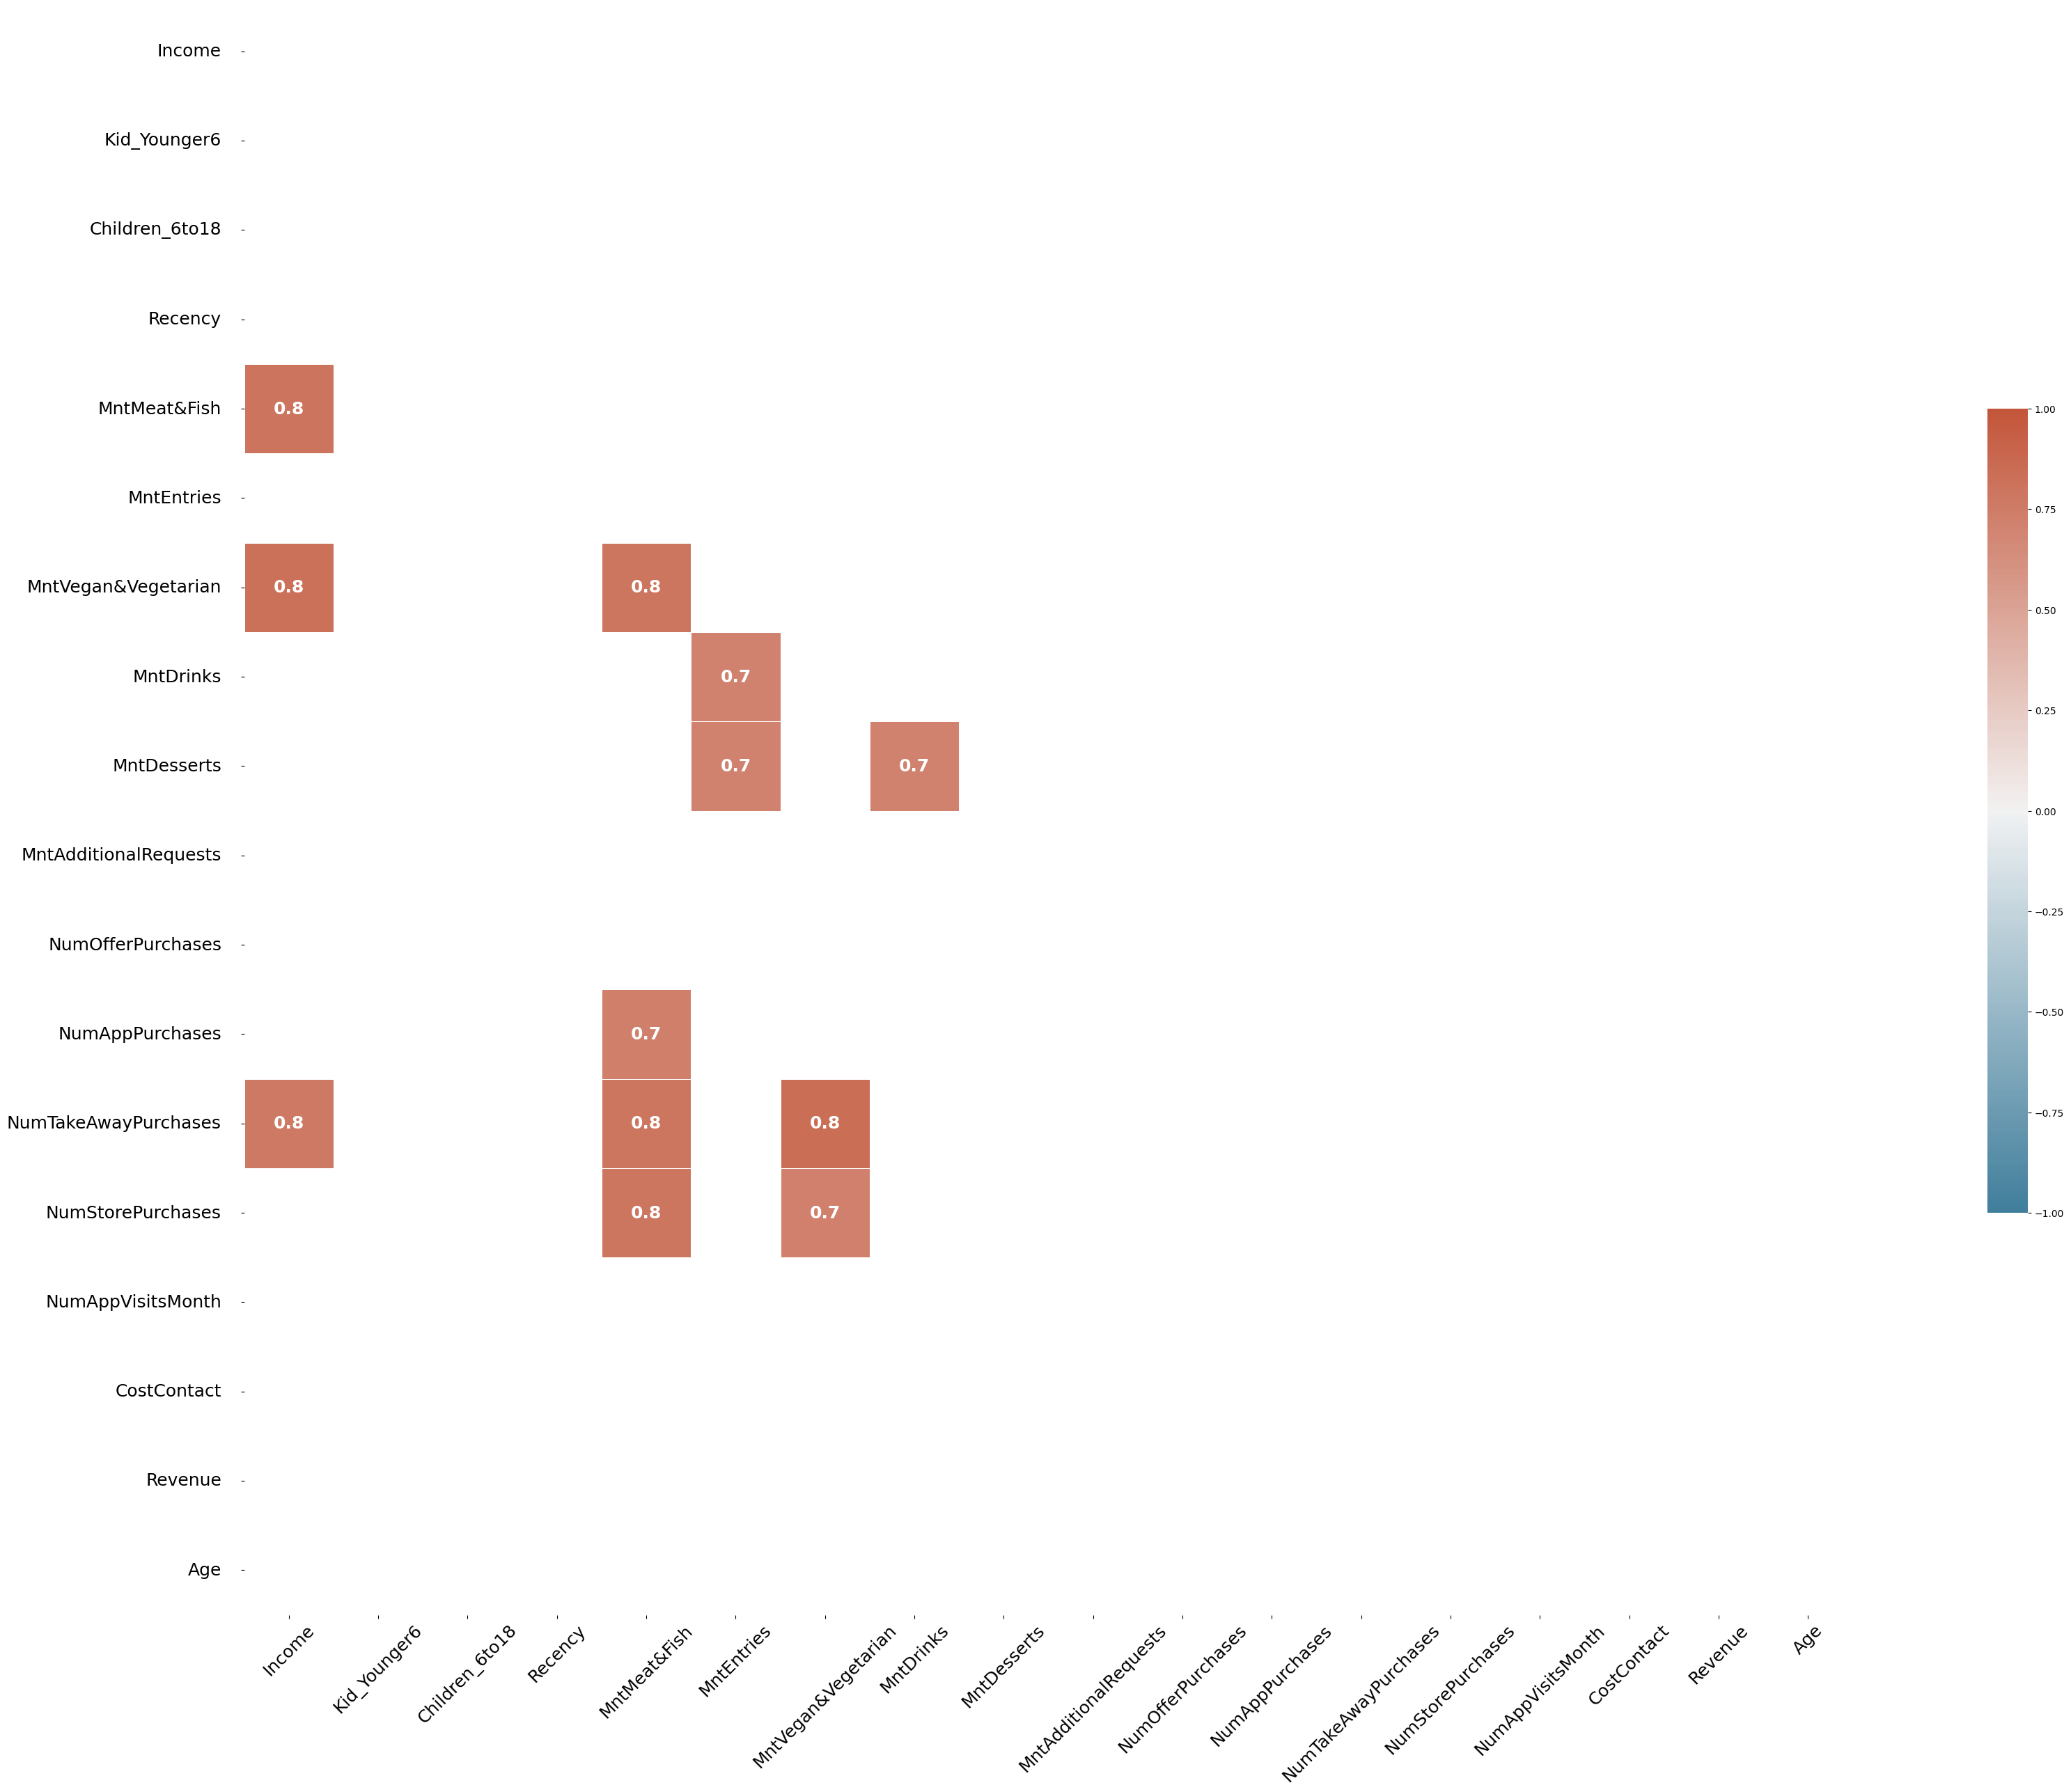

Column: Income, Row: MntMeat&Fish, Correlation: 0.797572318203678
Column: Income, Row: MntVegan&Vegetarian, Correlation: 0.8239169831522533
Column: Income, Row: NumTakeAwayPurchases, Correlation: 0.7711495170542247
Column: MntMeat&Fish, Row: Income, Correlation: 0.797572318203678
Column: MntMeat&Fish, Row: MntVegan&Vegetarian, Correlation: 0.7941184642373804
Column: MntMeat&Fish, Row: NumAppPurchases, Correlation: 0.73096501703122
Column: MntMeat&Fish, Row: NumTakeAwayPurchases, Correlation: 0.7892502394274237
Column: MntMeat&Fish, Row: NumStorePurchases, Correlation: 0.7950523321845054
Column: MntEntries, Row: MntDrinks, Correlation: 0.710734857756723
Column: MntEntries, Row: MntDesserts, Correlation: 0.7057459769427161
Column: MntVegan&Vegetarian, Row: Income, Correlation: 0.8239169831522533
Column: MntVegan&Vegetarian, Row: MntMeat&Fish, Correlation: 0.7941184642373804
Column: MntVegan&Vegetarian, Row: NumTakeAwayPurchases, Correlation: 0.8434816810385506
Column: MntVegan&Vegetarian

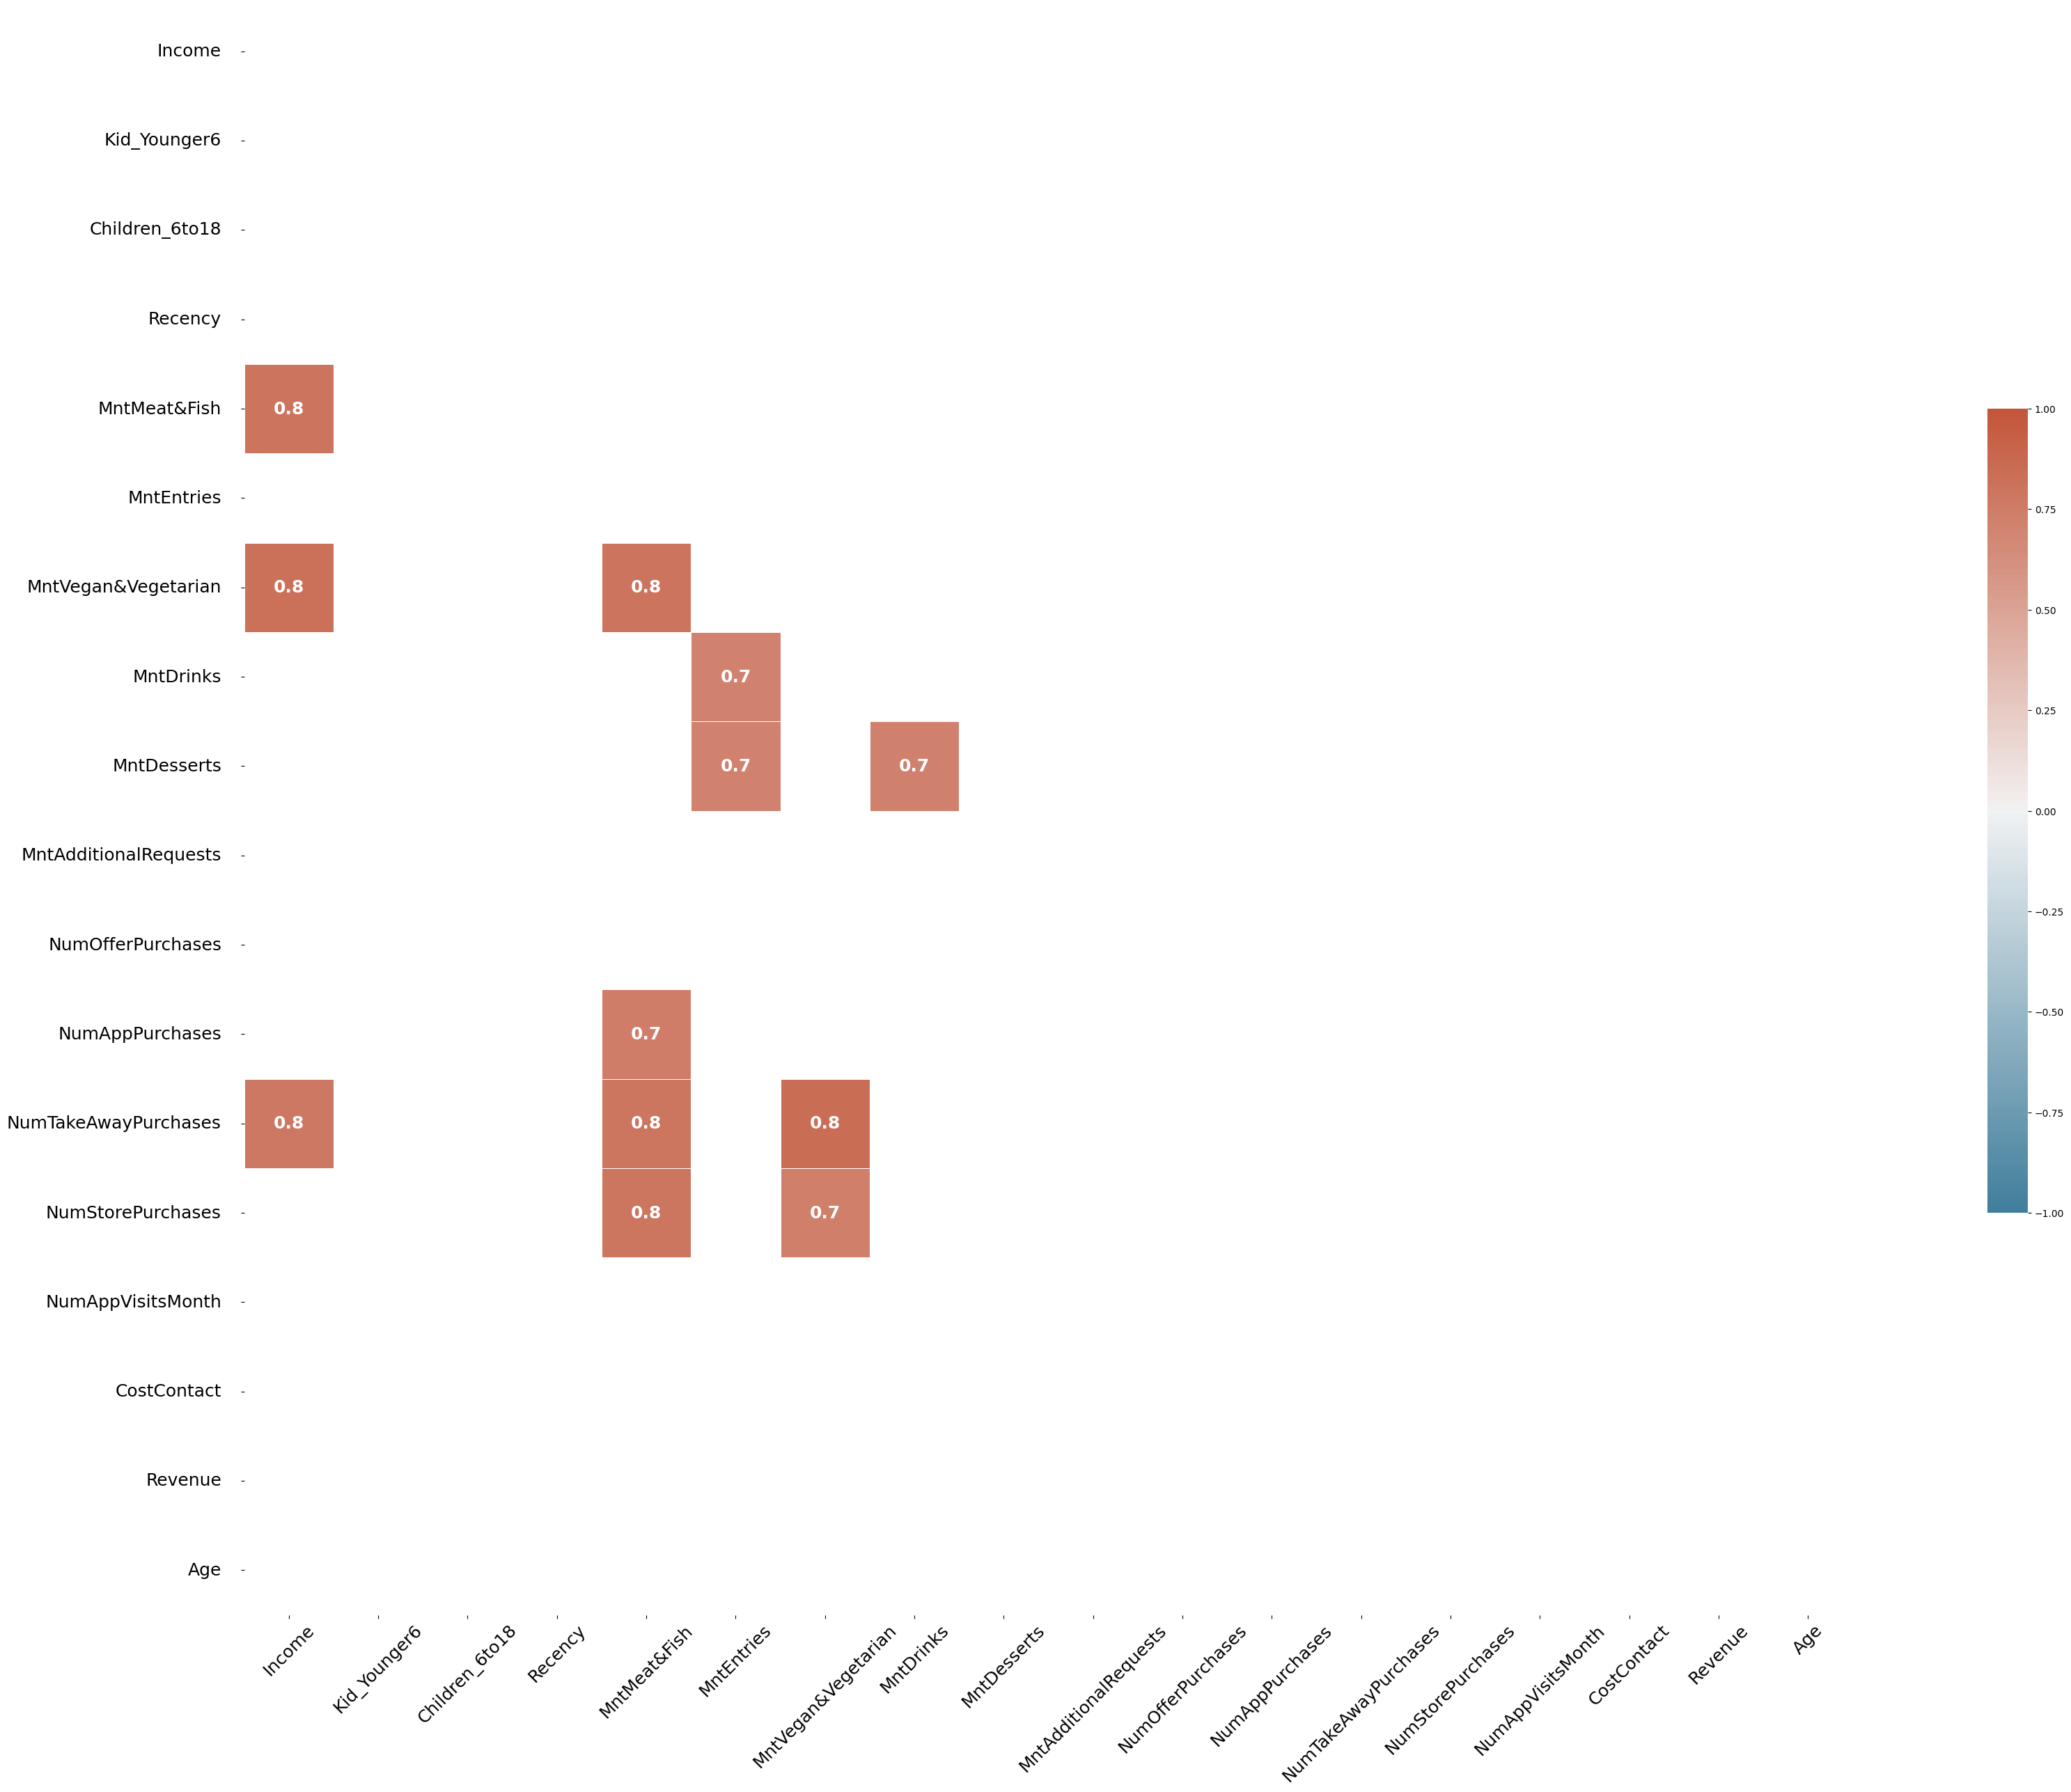

Column: Income, Row: MntMeat&Fish, Correlation: 0.8008176089333263
Column: Income, Row: MntVegan&Vegetarian, Correlation: 0.8255816329726472
Column: Income, Row: NumTakeAwayPurchases, Correlation: 0.779358479760595
Column: MntMeat&Fish, Row: Income, Correlation: 0.8008176089333263
Column: MntMeat&Fish, Row: MntVegan&Vegetarian, Correlation: 0.8026221131084371
Column: MntMeat&Fish, Row: NumAppPurchases, Correlation: 0.7444534264945211
Column: MntMeat&Fish, Row: NumTakeAwayPurchases, Correlation: 0.7920858027191071
Column: MntMeat&Fish, Row: NumStorePurchases, Correlation: 0.7955584836642389
Column: MntEntries, Row: MntDrinks, Correlation: 0.7045192917721127
Column: MntEntries, Row: MntDesserts, Correlation: 0.7098231825923043
Column: MntVegan&Vegetarian, Row: Income, Correlation: 0.8255816329726472
Column: MntVegan&Vegetarian, Row: MntMeat&Fish, Correlation: 0.8026221131084371
Column: MntVegan&Vegetarian, Row: NumTakeAwayPurchases, Correlation: 0.8492720684099149
Column: MntVegan&Vegeta

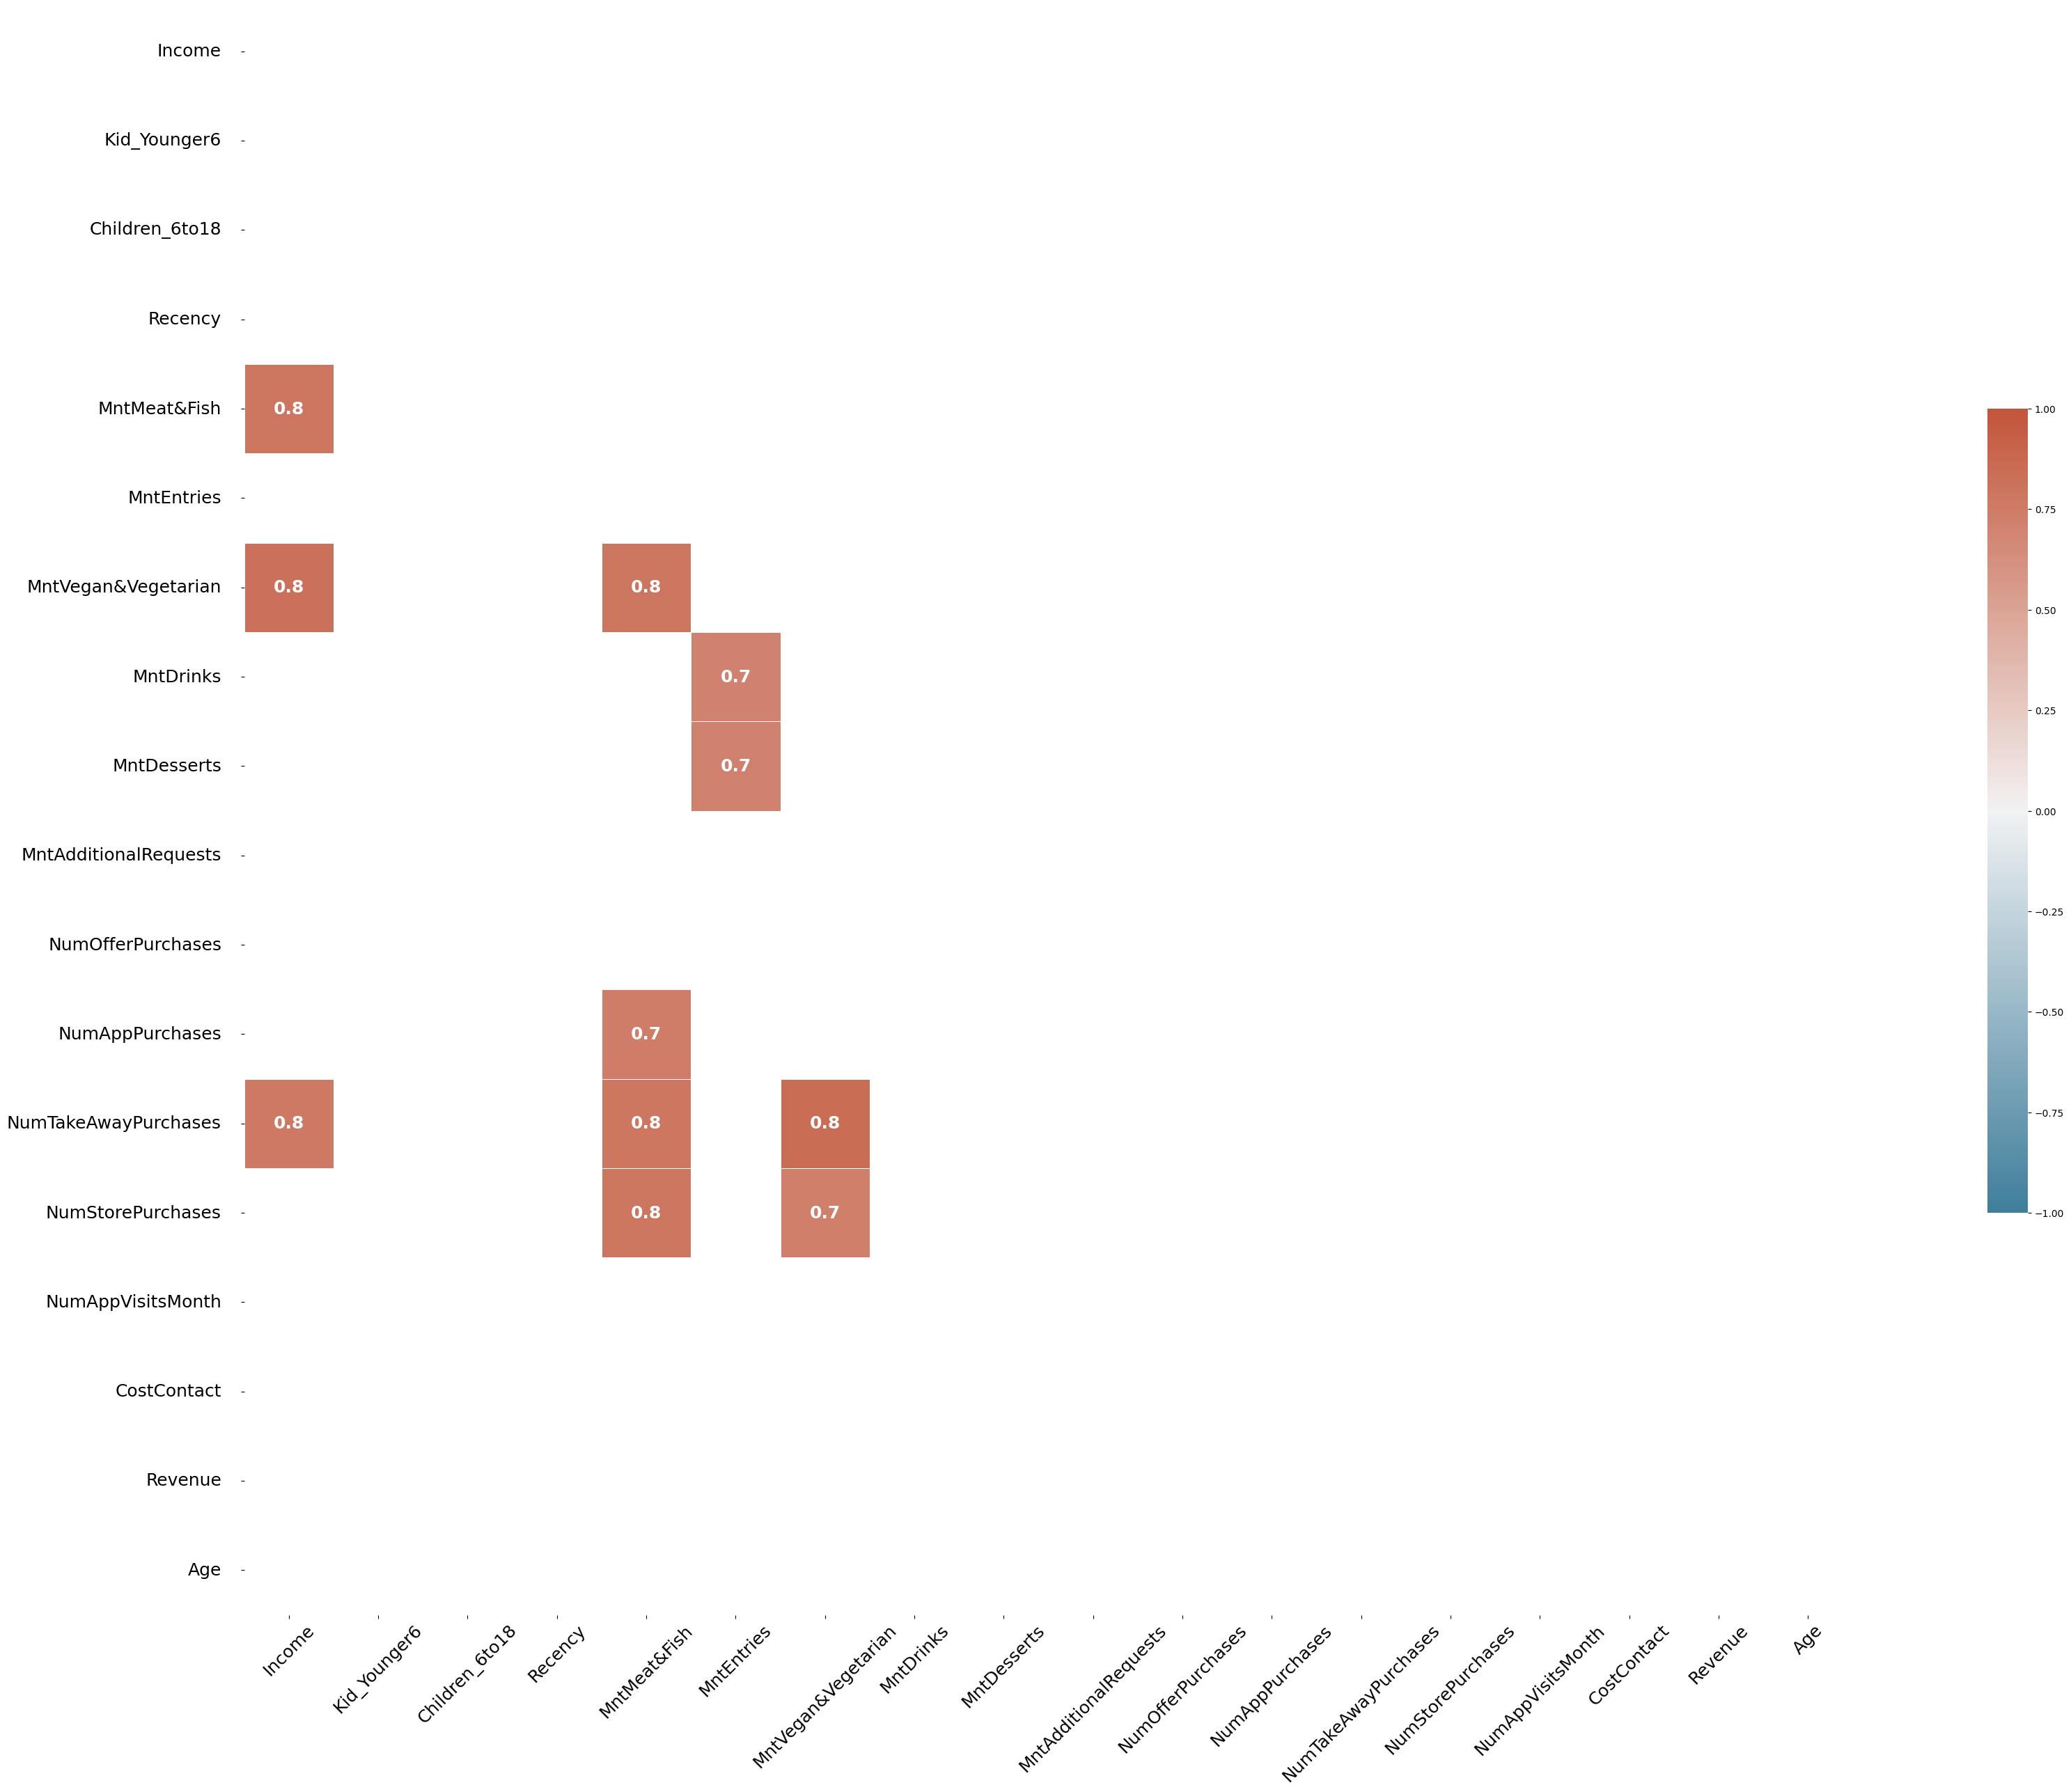

Column: Income, Row: MntMeat&Fish, Correlation: 0.7950101004409843
Column: Income, Row: MntVegan&Vegetarian, Correlation: 0.8197646925622093
Column: Income, Row: NumTakeAwayPurchases, Correlation: 0.767491361547748
Column: MntMeat&Fish, Row: Income, Correlation: 0.7950101004409843
Column: MntMeat&Fish, Row: MntVegan&Vegetarian, Correlation: 0.7955627507240053
Column: MntMeat&Fish, Row: NumAppPurchases, Correlation: 0.7454041036544826
Column: MntMeat&Fish, Row: NumTakeAwayPurchases, Correlation: 0.7888763627143272
Column: MntMeat&Fish, Row: NumStorePurchases, Correlation: 0.7938540861521584
Column: MntEntries, Row: MntDrinks, Correlation: 0.706368070613162
Column: MntEntries, Row: MntDesserts, Correlation: 0.7122961275764691
Column: MntVegan&Vegetarian, Row: Income, Correlation: 0.8197646925622093
Column: MntVegan&Vegetarian, Row: MntMeat&Fish, Correlation: 0.7955627507240053
Column: MntVegan&Vegetarian, Row: NumTakeAwayPurchases, Correlation: 0.8447882830416872
Column: MntVegan&Vegetar

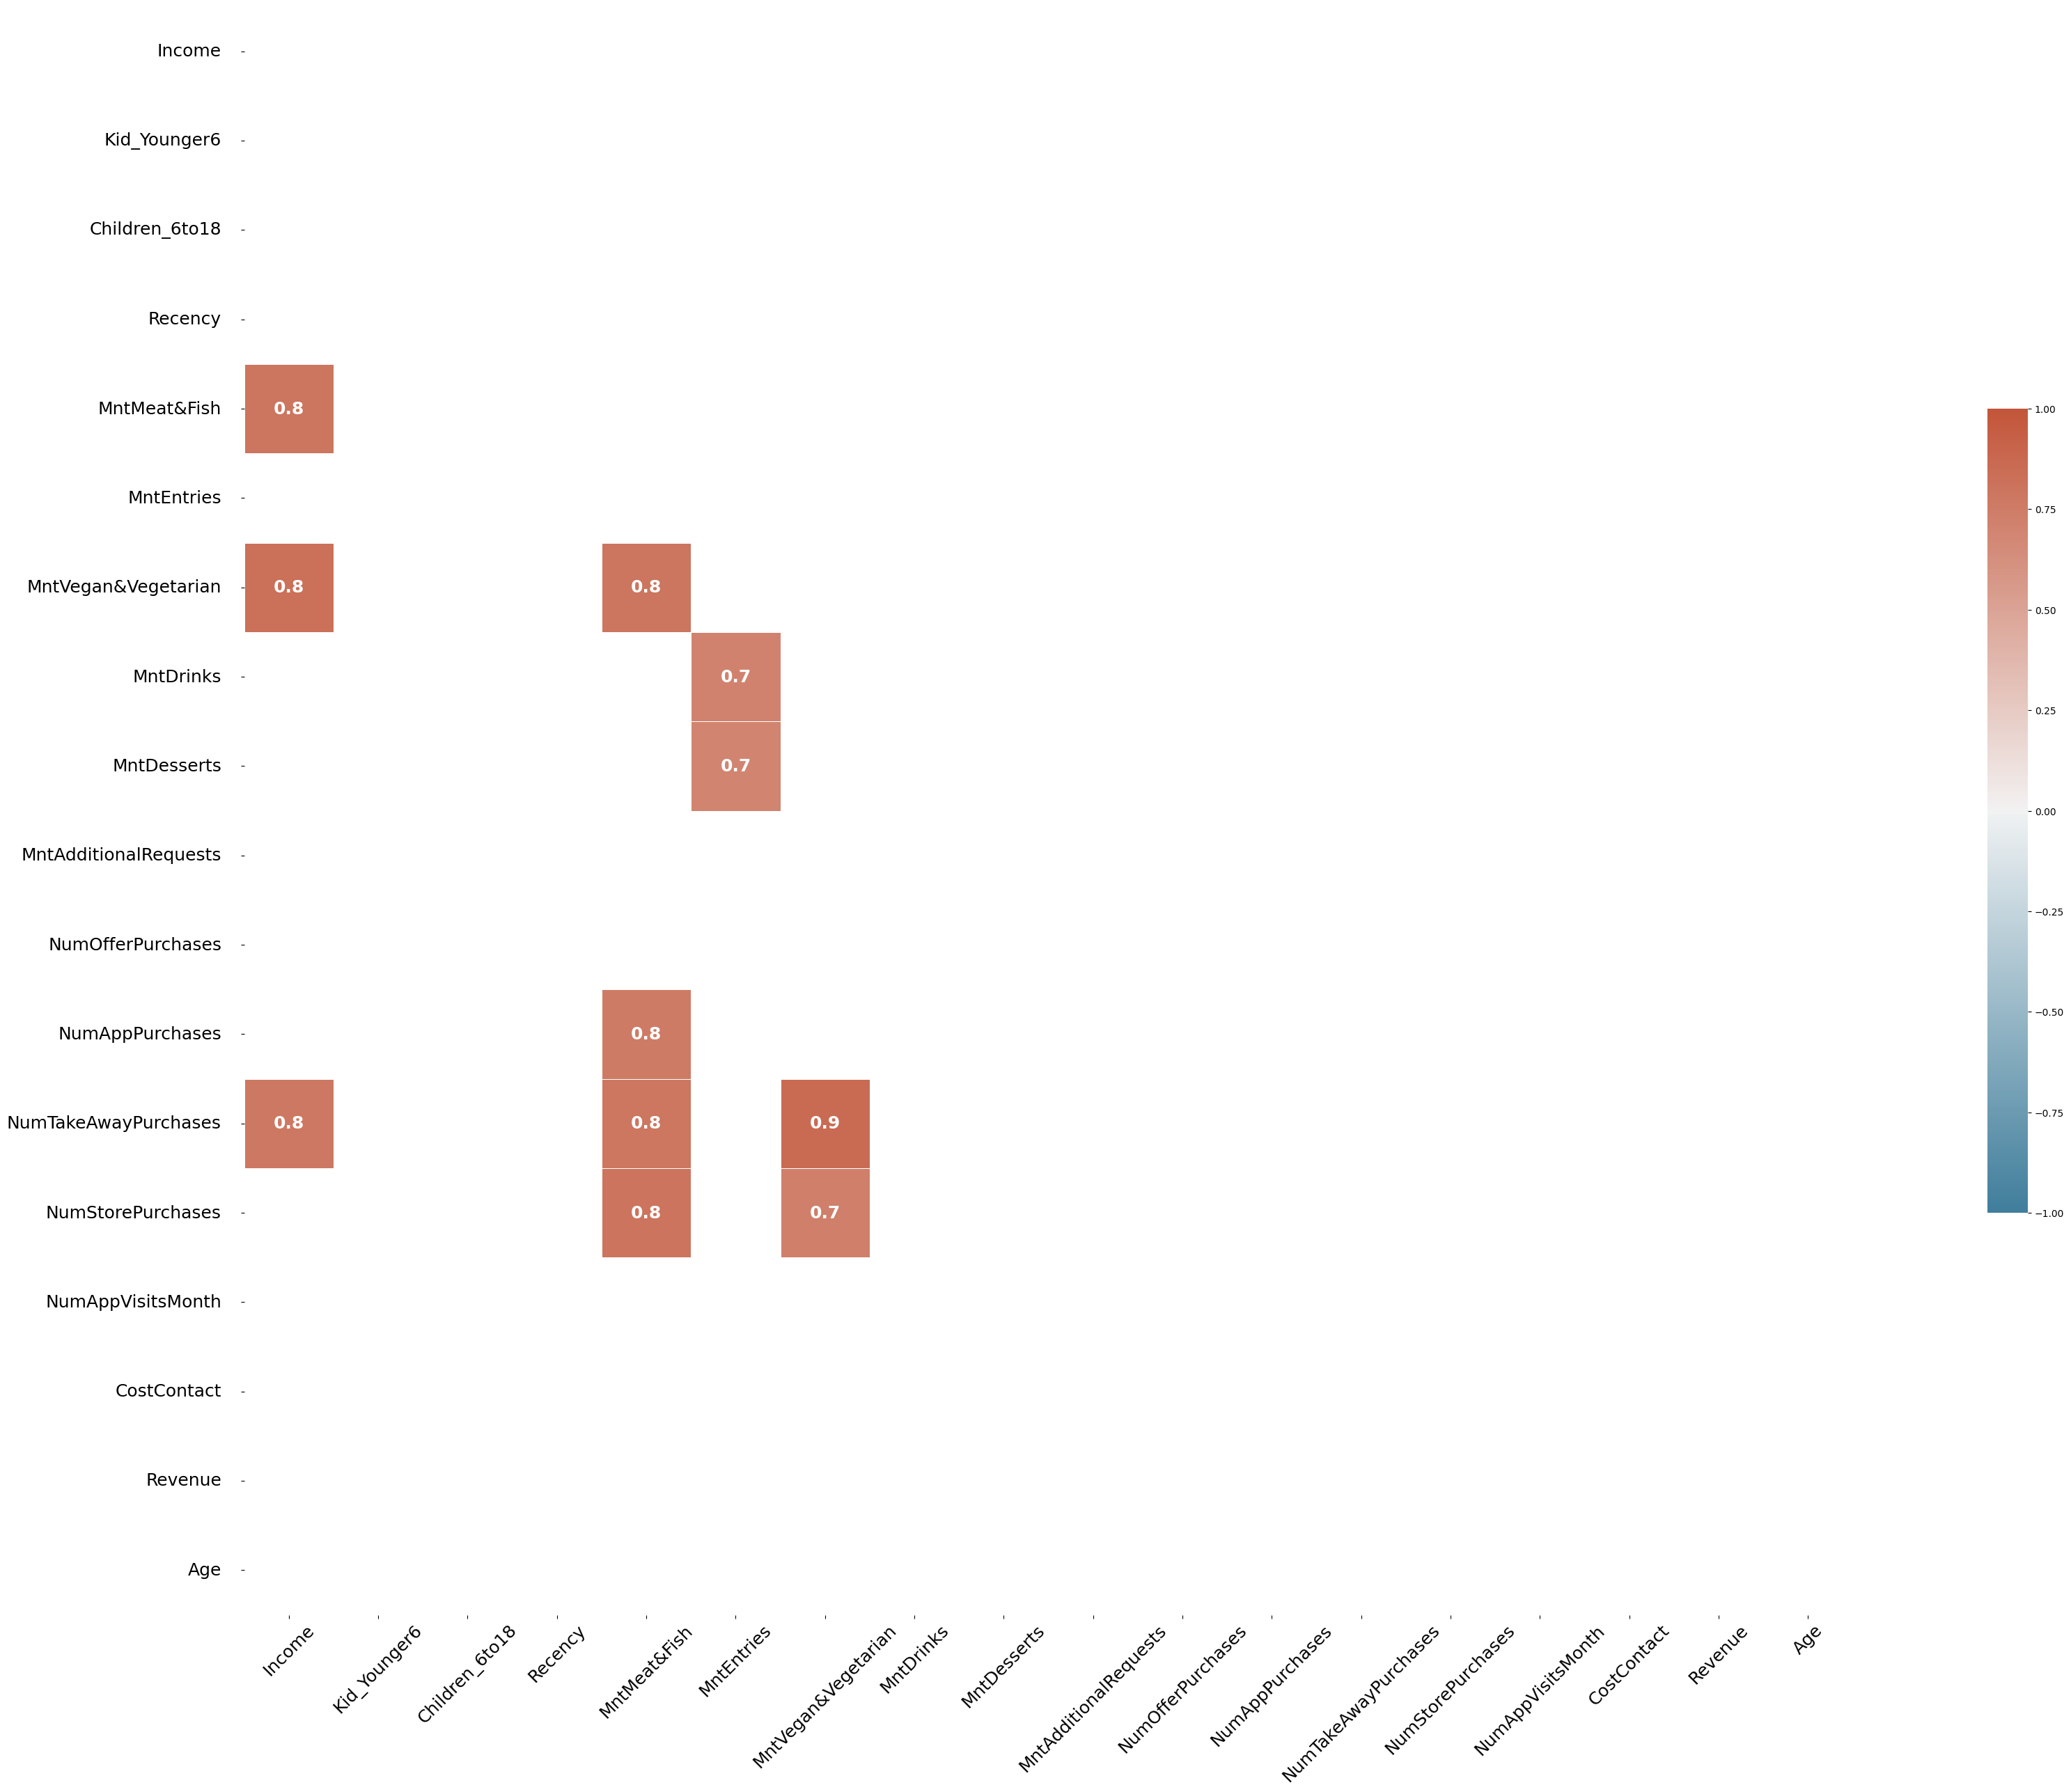

Column: Income, Row: MntMeat&Fish, Correlation: 0.7943346786325473
Column: Income, Row: MntVegan&Vegetarian, Correlation: 0.8269764395179124
Column: Income, Row: NumTakeAwayPurchases, Correlation: 0.7801389400791909
Column: MntMeat&Fish, Row: Income, Correlation: 0.7943346786325473
Column: MntMeat&Fish, Row: MntVegan&Vegetarian, Correlation: 0.7928647142997542
Column: MntMeat&Fish, Row: NumAppPurchases, Correlation: 0.7545200403867981
Column: MntMeat&Fish, Row: NumTakeAwayPurchases, Correlation: 0.7843987851253401
Column: MntMeat&Fish, Row: NumStorePurchases, Correlation: 0.8044567437995467
Column: MntEntries, Row: MntDrinks, Correlation: 0.7041936736422539
Column: MntEntries, Row: MntDesserts, Correlation: 0.7018914795356521
Column: MntVegan&Vegetarian, Row: Income, Correlation: 0.8269764395179124
Column: MntVegan&Vegetarian, Row: MntMeat&Fish, Correlation: 0.7928647142997542
Column: MntVegan&Vegetarian, Row: NumTakeAwayPurchases, Correlation: 0.8525103272161229
Column: MntVegan&Veget

In [56]:
redundant_features(X_mar_drop, y)

### Redundant Variables - Spearman Correlation (Correlation higher than |0.7|)

|  Feature 1            | Feature 2           | split 1 | split 2 | split 3 | split 4 | split 5 | total  |
|----------------------|---------------------|---------|---------|---------|---------|---------|--------|       
|0     Income          | MntMeat&Fish        |    1    |    1    |    1    |    1    |    1    |   5   |
|1     Income          | MntVegan&Vegetarian |    1    |    1    |    1    |    1    |    1    |   5   |
|2     Income          | NumTakeAwayPurchases|    1    |    1    |    1    |    1    |    1    |   5   |
|3     MntDesserts     | MntDrinks           |    1    |    1    |    1    |    0    |    0    |   3   |
|4     MntDesserts     | MntEntries          |    1    |    1    |    1    |    1    |    1    |   5
|5     MntDrinks       | MntDesserts         |    1    |    1    |    1    |    0    |    0    |   3
|6     MntDrinks       | MntEntries          |    1    |    1    |    1    |    1    |    1    |   5
|7    MntEntries       | MntDesserts         |    1    |    1    |    1    |    1    |    1    |   5
|8    MntEntries       | MntDrinks           |    1    |    1    |    1    |    1    |    1    |   5
|9  MntMeat&Fish       | Income              |    1    |    1    |    1    |    1    |    1    |   5
|10 MntMeat&Fish       | MntVegan&Vegetarian |    1    |    1    |    1    |    1    |    1    |   5
|11 MntMeat&Fish       | NumAppPurchases     |    1    |    1    |    1    |    1    |    1    |   5
|12 MntMeat&Fish       | NumStorePurchases   |    1    |    1    |    1    |    1    |    1    |   5
|13 MntMeat&Fish       | NumTakeAwayPurchases|    1    |    1    |    1    |    1    |    1    |   5
|14 MntVegan&Vegetarian| Income              |    1    |    1    |    1    |    1    |    1    |   5
|15 MntVegan&Vegetarian| MntMeat&Fish        |    1    |    1    |    1    |    1    |    1    |   5
|16 MntVegan&Vegetarian| NumStorePurchases   |    1    |    1    |    1    |    1    |    0    |   4
|17 MntVegan&Vegetarian| NumTakeAwayPurchases|    1    |    1    |    1    |    1    |    1    |   5
|18 NumAppPurchases    | MntMeat&Fish        |    1    |    1    |    1    |    1    |    1    |   5
|19 NumStorePurchases  | MntMeat&Fish        |    1    |    1    |    1    |    1    |    1    |   5
|20 NumStorePurchases  | MntVegan&Vegetarian |    1    |    1    |    1    |    1    |    0    |   4
|21 NumTakeAwayPurchases| Income             |    1    |    1    |    1    |    1    |    1    |   5
|22 NumTakeAwayPurchases| MntMeat&Fish        |    1    |    1    |    1    |    1    |    1    |   5
|23 NumTakeAwayPurchases| MntVegan&Vegetarian |    1    |    1    |    1    |    1    |    1    |   5

Now it is time to understand the ones that we should keep and the ones to be removed<br>

In this case, we can see that there are high correlations within two groups of variables:
- Desserts, Entries, Drinks;
- MntMeat&Fish, Income, MntVegan&Vegetarian, NumAppPurchases, NumTakeAwayPurchases, NumStorePurchases.


The remaining methods that we are going to apply  for feature selection are: 
- __Wrapper methods__ - RFE
- __Embedded Methods__ - Lasso Regression and Decision Trees

It is important to note that regression models are particularly sensible to correlated features. Therefore, we will begin by applying decision trees to identify which features among the correlated ones should be excluded. 

Once we have eliminated the correlated features, we can proceed with techniques that involve regression models, such as RFE (using Logistic Regression) and Lasso Regression.

<a class="anchor" id="10th-bullet">

__`3.1.2.3. Decision Trees (Embedded Method) - For continuous, ordinal and binary data`__

</a>

Similarly to what we have done in the previous techniques, we will now examine the feature importance of the _independent_ variables in the training data  using a decision tree, regardless of the specific train subset being used.

__`Step 17`__ - Create a function named as `plot_importance` that receives the feature importances and the name of the model being applied and: <br>
- Sort the feature importances using sort_values()
- create a figure with figsize=(4,5)  <br>
- plot an horizontal bar with the results <br>
- Add the title ("Feature importance using " and the name of the model)

In [74]:
def plot_importance(variables,name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

__`Step 18`__ - Create a function named `apply_dt` that takes your training data as input (independent variables and target). In this function:
- Create a DecisionTreeClassifier with random_state = 99 and fit to your training data, Name it as `dt`
- Call the attribute from the model decision trees `feature_importances_` and store those results in a Pandas DataFrame.
- Call the previously defined function `plot_importance` to generate the horizontal bar with the feature importances provided by the decision tree.

In [75]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

__`Step 19`__ - Create a function named as `select_best_features_dt` that receives the independent variables (X) and the target (y). <br>
Inside of this function, follow these steps:<br>
- Apply the previously defined StratifiedKFold as "skf" for cross-validation.
- Fill missing data, focusing this time on the numerical variables.
- ##### Drop the `Marital_Status`variable, since we are using the feature importance of decision trees to evaluate the numerical data (Aplica-se a nós?).
- Call the `apply_dt` function on your data.

In [76]:
def select_best_features_dt(X, y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

       
        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using decision Tree
        colunas=binaries.append(pd.Index(['Marital_Status']))
        X_train = X_train.drop(colunas , axis = 1)  # Só removemos Marital Status. Mantemos assim?
        apply_dt(X_train, y_train)
        
        count+=1 

__`Step 19B`__ - Call your function `select_best_features_dt` passing as arguments your independent variables and your target.

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


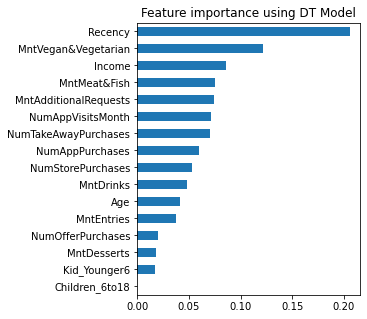

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


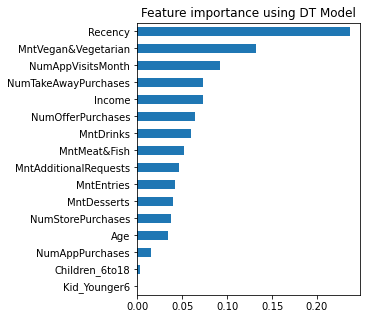

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


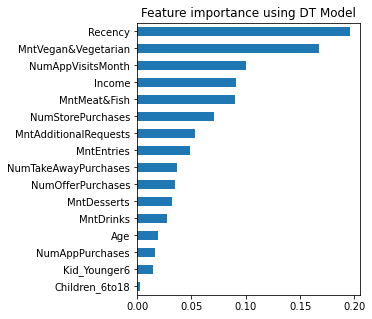

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


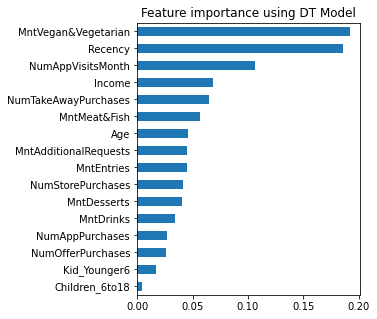

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


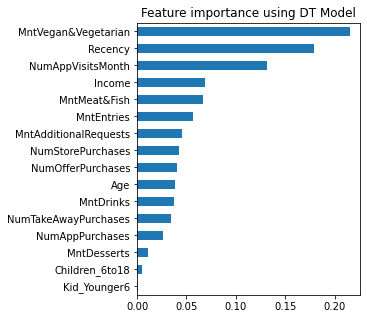

In [77]:
select_best_features_dt(X, y)

We had identified previously with correlation matrix that two groups of variables that seem to be highly correlated among them, namely:
- MntMeat&Fish, Income, MntVegan&Vegetarian, NumAppPurchases, NumTakeAwayPurchases, NumStorePurchases.
- MntDesserts, MntEntries, MntDrinks;

From the first group, we are going to include only `MntVegan&Vegetarian`, the variable that according to decision trees feature importance appears five times as the most important one. We remove `MntMeat&Fish`, `Income`, `NumAppPurchases`, `NumTakeAwayPurchases`, and `NumStorePurchases`.

From the second group, we are going to keep `MntDesserts`, that appears always more important than `MntEntries` and `MntDrinks` except in the last split. We remove `MntEntries` and `MntDrinks`.

__`Step 20`__ - Remove the variables that were excluded by the combination of the results of the decision tree and the correlation matrix, namely 'MntMeat&Fish', 'Income', 'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'MntEntries', 'MntDrinks'.

In [78]:
X = X.drop(
    ['MntMeat&Fish', 'Income', 'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'MntDrinks', 'MntEntries'], 
    axis = 1)

In [79]:
X.columns

Index(['Marital_Status', 'Kid_Younger6', 'Children_6to18', 'Recency',
       'MntVegan&Vegetarian', 'MntDesserts', 'MntAdditionalRequests',
       'NumOfferPurchases', 'NumAppVisitsMonth', 'Response_Cmp2',
       'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Response_Cmp1',
       'Age'],
      dtype='object')

At this moment, you already removed correlated features and can apply techniques where regression is used.
 <br><br>
 To apply Lasso Regression and RFE (using Logistic Regression as an estimator), we should scale our data previously. <br>
 In the case of the Decision Trees, it is not needed - the results should be similar if data is scaled or not. <br><br>

<a class="anchor" id="11th-bullet">

__`3.1.2.4. Recursive Feature Elimination (RFE) (Wrapper Method) - For continuous, ordinal and binary data`__
    
</a>

__`Step 21`__ - Create a function named `apply_rfe` that takes your training data as input (independent variables and target). In this function:
- Create an instance of RFE named as `rfe`, where `estimator = LogisticRegression()` and `n_features_to_select = 5` 
- Apply the method `fit_transform()` from `rfe` to your training data.
- Call the attribute from the RFE named `support_` and store those results in a Pandas Series named `selected_features`.
- Print `selected_features`


In [80]:
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

<a class="anchor" id="12th-bullet">

__`3.1.2.5. Lasso - For continuous and ordinal data`__
    
</a>

__`Step 22`__ - Create a function named `apply_lasso` that takes your training data as input (independent variables and target). In this function:
- Remove the variable `Dependents` from the training data, since Lasso regression is not appropriate for binary data. 
- Create an instance of LassoCV, and apply the method `fit()`to your training data.
- Call the attribute from the Lasso named `coef_` and store those results in a Pandas Series named `coef`. This will return the coefficients associated with each variable.
- Call the previously defined function `plot_importance` to generate the horizontal bar with the coefficients provided by the Lasso.

In [81]:
def apply_lasso(X_train, y_train):
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    plot_importance(coef,'Lasso')

Now it is time to apply the different techniques to our data to each partition, and get insights from it. We can also apply again Decision Trees to obtain our final results.

__`Step 23`__ - Create a function named as `select_best_features` that receives the independent variables (X) and the target (y). <br>
Inside of this function, follow these steps:<br>
- Apply the previously defined StratifiedKFold as "skf" for cross-validation.
- Drop the `Marital_Status`variable, since we are evaluating the numerical data.
- Apply MinMaxScaler to your training data.
- Call the `apply_rfe` function on your data.
- Call the `apply_lasso` function on your data. 
- Call the `apply_dt` function on your data.

In [82]:
from sklearn.preprocessing import MinMaxScaler

def select_best_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        
        ########################################### SCALE DATA #################################################### 
        colunas=binaries.append(pd.Index(['Marital_Status']))
        numerical_data = X_train.drop(colunas, axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)
    
        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')
        
        # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)
        
        # check which features to use using lasso
        print('')
        print('----------------- LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)
            
        # check which features to use using lasso
        print('')
        print('----------------- DT ----------------------')
        apply_dt(X_train_scaled, y_train)
        
        count+=1
        

__`Step 23B`__ - Call your function `select_best_features` passing as arguments your independent variables and your target.

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Kid_Younger6             False
Children_6to18            True
Recency                   True
MntVegan&Vegetarian       True
MntDesserts              False
MntAdditionalRequests     True
NumOfferPurchases        False
NumAppVisitsMonth         True
Age                      False
dtype: bool

----------------- LASSO ----------------------


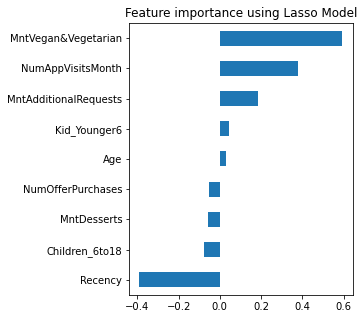


----------------- DT ----------------------


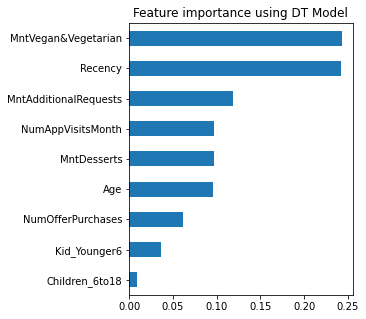

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Kid_Younger6             False
Children_6to18            True
Recency                   True
MntVegan&Vegetarian       True
MntDesserts              False
MntAdditionalRequests     True
NumOfferPurchases        False
NumAppVisitsMonth         True
Age                      False
dtype: bool

----------------- LASSO ----------------------


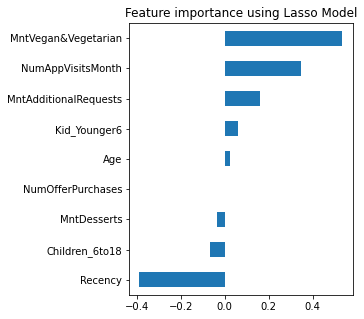


----------------- DT ----------------------


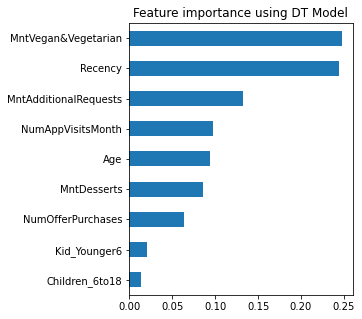

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Kid_Younger6             False
Children_6to18            True
Recency                   True
MntVegan&Vegetarian       True
MntDesserts              False
MntAdditionalRequests     True
NumOfferPurchases        False
NumAppVisitsMonth         True
Age                      False
dtype: bool

----------------- LASSO ----------------------


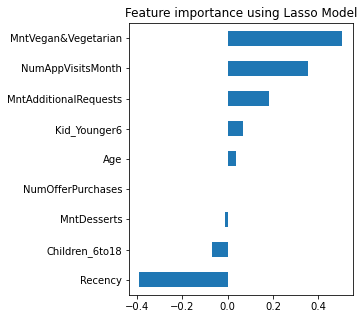


----------------- DT ----------------------


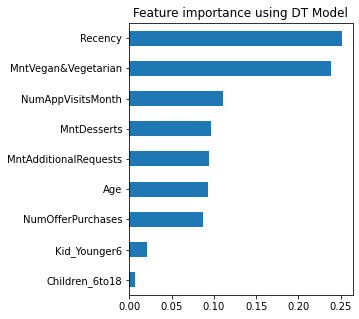

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Kid_Younger6             False
Children_6to18            True
Recency                   True
MntVegan&Vegetarian       True
MntDesserts              False
MntAdditionalRequests     True
NumOfferPurchases        False
NumAppVisitsMonth         True
Age                      False
dtype: bool

----------------- LASSO ----------------------


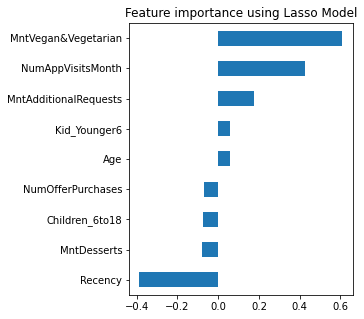


----------------- DT ----------------------


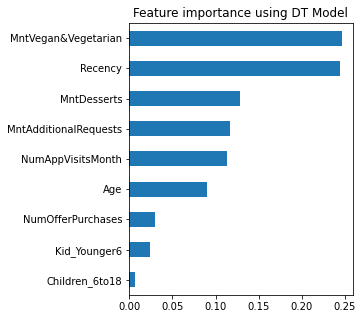

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________

----------------- RFE ----------------------
Kid_Younger6             False
Children_6to18            True
Recency                   True
MntVegan&Vegetarian       True
MntDesserts              False
MntAdditionalRequests     True
NumOfferPurchases        False
NumAppVisitsMonth         True
Age                      False
dtype: bool

----------------- LASSO ----------------------


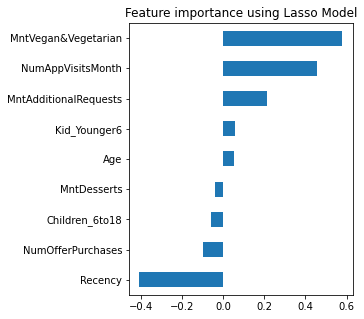


----------------- DT ----------------------


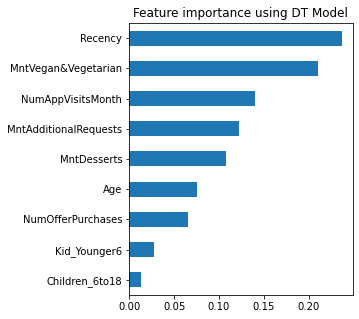

In [83]:
select_best_features(X, y)

| Feature                 | RFE | LASSO | DT | Total        |         |
|-------------------------|-----|-------|----|--------------|---------|
| Kid_Younger6            | 0   | 1     | 0  | 1            |         |
| Children_6to18          | 0   | 4     | 0  | 4            |         |
| Recency                 | 5   | 5     | 5  | 15            | Keep   |
| MntVegan&Vegetarian     | 5   | 5     | 5  | 15            | Keep   |
| MntDesserts             | 0   | 0     | 2  | 3            |         |
| MntAdditionalRequests   | 0   | 5     | 5  | 10            | Keep   |
| NumOfferPurchases       | 0   | 0     | 1  | 1            |         |
| NumAppVisitsMonth       | 5   | 5     | 3  | 13            | Keep   |
| Age                     | 0   | 0     | 4  | 4            |         |

In [84]:
X.columns

Index(['Marital_Status', 'Kid_Younger6', 'Children_6to18', 'Recency',
       'MntVegan&Vegetarian', 'MntDesserts', 'MntAdditionalRequests',
       'NumOfferPurchases', 'NumAppVisitsMonth', 'Response_Cmp2',
       'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Response_Cmp1',
       'Age'],
      dtype='object')

In [85]:
X.drop(['Kid_Younger6', 'Children_6to18','MntDesserts','NumOfferPurchases','Age'], axis = 1, inplace=True)

<a class="anchor" id="13th-bullet">

# 4. Model & Assess (Modelling and Assessment)

</a>

<div class="alert alert-block alert-success">

<a class="anchor" id="14th-bullet">

## 4.1. Model Selection
    
</div></a>

In this section you should take the time to train different predictive algorithms with the data that got to this stage and **use the approppriate model assessment metrics to decide which model you think is the best to address your problem**.

**You are expected to present on your report the model performances of the different algorithms that you tested and discuss what informed your choice for a specific algorithm**

__`Step 01`__ Import all the needed libraries:

- MinMaxScaler from sklearn.preprocessing

- LogisticRegression from sklearn.linear_model
- KNeighborsClassifier from sklearn.neighbors
- DecisionTreeClassifier from sklearn.tree
- MLPClassifier from sklearn.neural_network <br><br>

- f1_score from sklearn.metrics
- roc_curve from sklearn.metrics
- precision_recall_curve from sklearn.metrics <br><br>

- StratifiedKFold from sklearn.model_selection
- train_test_split from sklearn.model_selection
- GridSearchCV from sklearn.model_selection
- RandomizedSearchCV from sklearn.model_selection 


In [86]:
############################################## PREPROCESSING ##############################################

from sklearn.preprocessing import MinMaxScaler

################################################# MODELS ##################################################

#!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

################################################# METRICS #################################################

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

################################### MODEL SELECTION & OPTIMIZATION ########################################

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

######################################### DECISION TREES PLOTS ############################################

# in anaconda prompt: conda install python-graphviz
#!pip install pydotplus
#!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz
import pydotplus

__`Step 02`__ From the feature selection steps on the previous class, we obtained two different data sets, one called `keep_data` and another named as `all_data`. Import those data sets.

keep_data = # As variáveis que obtivemos do feature selection
all_data = # As variáveis que obtivemos do feature selection + outras que ainda não sabemos bem se devemos usar

##### Vamos só com o X (variáveis que escolhemos até agora)

At this point, we have two data sets to test:
- `keep_data`- This dataset is composed by the most important variables defined by the feature selection techniques applied previously. It is composed by: <br><br>
    - Mnt, Clothes, NetPurchase, Marital_status, DepVar<br><br>
- `all_data` - This dataset is composed by the most important variables defined by the feature selection techniques applied previously, but also with the variables that we are in doubt to use. It is composed by:<br><br>
    - Mnt, Clothes, NetPurchase, Marital_status, Rcn, SmallAppliances, Toys, Recomendation, DepVar

__NOTE ABOUT PREPROCESSING:__ <br>
Concerning the variable `Marital_Status`:
- It has misclassifications
- It has missing values
- Is a categorical variable and we need to convert it to a numerical one

Furthermore, the models we are going to apply (except decision trees) are sensible to scaling issues. We need to scale our data accordingly.

__`Step 03`__ Create a function called `transform_data` that will receive one or two datasets and make the following changes in the categorical data:

In the training data:
- Fill missing data in Marital_status with the mode from the training data
- Replace 'BigConfusion' to the most frequent value from the training data
- Replace 'Together' to 'Married'
- Create dummies on your data set, and drop one possible column (for example 'Marital_Status_widow')

If you have a second data set (validation or test):
- Fill missing data in your second data set in Marital_Status with the mode from the training data
- Replace 'BigConfusion' in your second data set to the most frequent value on the training data
- Replace 'Together' to 'Married'
- Create dummies on your data set, and drop the same column that you dropped on the training data set.

__NOTE ABOUT USING DUMMIES WITH pandas.dummies__ <br>
When you are creating dummies in your data, it is possible that one class appears on your training data, but not on your second data set (or on the other way around).
Take as example:
- In your training data, you have a column named 'Animals' with the possible values 'Cat','Dog','Turtle','Goat'. When applying dummies, you are going to create 4 new columns and you should drop one of those to avoid multicollinearity, like for example 'Turtle'.
- In your second data set, you have also a column named 'Animals', but this time with the possible values 'Cat','Dog','Turtle'. When applying dummies, you are just going to create 3 new columns and remove 'Turtle'. In this data set, you are not going to have a column named as 'Goat', and this is going to generate an error.

One possible way to solve this is to understand wich columns are different from your training data and your second data set. All the columns that are missing are going to be created and filled with zeros. Then, you just need to ensure that the order of the columns is the same in both data sets.


In [87]:
X = df_historical[['Marital_Status', 'Recency', 'MntVegan&Vegetarian', 'MntAdditionalRequests', 'NumAppVisitsMonth', 
                  'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Response_Cmp1', 'DepVar']]

In [88]:
df_historical2=df_historical[['Marital_Status', 'Income', 'Kid_Younger6',
       'Children_6to18', 'Recency', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5',
       'Response_Cmp1', 'Complain', 'CostContact', 'Revenue', 'DepVar',
       'Gender', 'Age', 'Education']]

df_historical2['Marital_Status']=df_historical2['Marital_Status'].str.lower()

In [89]:
def transform_data(X_train, X_2nd_df = False, X_2nd_df_flag = False):
    
    ########################################## CREATE DUMMIES #################################################    
    # Create dummies and remove one of the variables (to avoid multicollinearity)
    X_train_dummies = pd.get_dummies(X_train)
    X_train_dummies.drop('Marital_Status_widow', axis = 1, inplace = True) 
    
    if 'Education' in X_train.columns:
        X_train_dummies.drop('Education_phd', axis = 1, inplace = True)
        
    ############################################ SCALE DATA ###################################################    
   
    scaler = MinMaxScaler().fit(X_train_dummies)
    X_train_scaled = scaler.transform(X_train_dummies)
    X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train_dummies.columns)
    
    if X_2nd_df_flag == True:
        
        ########################################## CREATE DUMMIES #############################################
        X_2nd_df_dummies = pd.get_dummies(X_2nd_df)
        X_2nd_df_dummies.drop('Marital_Status_widow', axis = 1, inplace = True)
        
        if 'Education' in X_2nd_df.columns:
            X_2nd_df_dummies.drop('Education_phd', axis = 1, inplace = True)
        
        # If we don't have all the values in the validation dataset that we have in the train, that column will not be created
        # We should assure that all columns in train are also present in validation
        # Get missing columns from the training dataset
        missing_cols = set(X_train_dummies.columns ) - set(X_2nd_df_dummies.columns )
        # Add a missing column in test set with default value equal to 0
        for c in missing_cols:
            X_2nd_df_dummies[c] = 0
        # Ensure the order of column in the test set is in the same order than in train set
        X_2nd_df_dummies = X_2nd_df_dummies[X_train_dummies.columns]
        
        if 'DepVar' in X_2nd_df_dummies.columns:
            X_2nd_df_dummies.drop(['DepVar'], axis=1, inplace=True)
        else:
            pass
        
        ############################################ SCALE DATA ###################################################    
        X_2nd_df_scaled = scaler.transform(X_2nd_df_dummies) # Scaling with 'scaler' from train data
        X_2nd_df_scaled = pd.DataFrame(X_2nd_df_scaled , columns = X_2nd_df_dummies.columns, index = X_2nd_df_dummies.index )
        
   
    if X_2nd_df_flag == False:
        return X_train_scaled
    else:
        return X_train_scaled, X_2nd_df_scaled

__`Step 04`__ Create a function named as `select_best_models` that will receive as arguments your data set and an instance of a model and:
- Create an instance of StratifiedKFold with 5 splits, `random_state = 99` and `shuffle = True` named as `skf`.
- Create two empty lists named as `score_train` and `score_val` that will receive the performances of the model for train and for validation.

- Inside the loop of the StratifiedKFold:
    - Create the dataframes that will correspond to your training data and your validation data at each iteration.
    - Call the function defined previously named `transform_data` to do all the needed changes on the data.
    - Fit your model to the training data.
    - Obtain the predictions of your model in the training data and save those in an object named as `predictions_train`
    - Obtain the predictions of your model in the validation data and save those in an object named as `predictions_val`
    - Append to the list `score_train` the f1-score obtained in your training data set.
    - Append to the list `score_val` the f1-score obtained in your validation data set.

- After all the iterations on the StratifiedKFold:
    - Calculate the mean and the standard deviation of the performance of the models in the training data.
    - Calculate the mean and the standard deviation of the performance of the models in the validation data.

- Return those results.



In [90]:
def select_best_models(data, model):
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    
    X = data.drop('DepVar', axis = 1)
    y = data['DepVar'].copy()
    
    score_train, score_val = [],[]
        
    # perform the cross-validation    
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
          
        # Change categorical data - call function "transform_data"
        X_train, X_val = transform_data(X_train, X_val, X_2nd_df_flag = True)
        
        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val

__`Step 05`__ Create a function called `show_results` that will receive as arguments:
- A dataframe to be filled with the results
- Your data set
- One or more instances of models.

Inside this function, you are going to create a loop where for each model you receive as argument:
- you are going to obtain the average and the standard deviation of the performance in train and in validation by calling the function `select_best models`, passing as arguments your data and the instance of your model.
- Fill the dataframe with those values.

In [91]:
def show_results(df, data, *args):
    count = 0
    # Create a new column for delta
    df['Delta Train - Validation'] = 0.0
    
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        train_delta = avg_train - avg_val
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val), train_delta
        count+=1
    return df

<a class="anchor" id="15th-bullet">

<div class="alert alert-block alert-warning">

### 4.1.1. Compare different algorithms and select the most promising ones  
    
</div></a>


__`Step 06`__ The first thing we are going to do is to compare the performance of different algorithms with the default parameters. The only exceptions on the hyperparameters are:
- The decision tree will be tested with max_depth = 3 <br>
        - __*Why?*__ Decision Trees by default are going to grow until full depth on the training data set. This will lead to situations of overfitting. <br> <br>
- The neural network will be tested with max_iterations = 2000 <br>
        - __*Why?*__ By default, the neural networks will run for only 200 iterations, which can be a small value for the majority of the situations. <br> <br>
        
- __`Step 6.1.`__ Create an instance of a LogisticRegression named as `model_LR`
- __`Step 6.2.`__ Create an instance of a KNeighborsClassifier named as `model_KNN`
- __`Step 6.3.`__ Create an instance of a DecisionTreeClassifier named as `model_DT`. Define `max_depth = 3` and `random_state = 99`
- __`Step 6.4.`__ Create an instance of a DecisionTreeClassifier named as `model_NN`. Define `max_iter = 2000` and `random_state = 99`


In [92]:
from sklearn.ensemble import RandomForestClassifier

model_LR = LogisticRegression()
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(max_depth = 3, random_state = 99)
model_NN = MLPClassifier(max_iter = 2000, random_state = 99)
model_SVM = SVC()
model_XGB = XGBClassifier()
model_RF = RandomForestClassifier(random_state=99)

__`Step 07`__ Create a Dataframe with the columns `['Train', 'Validation]` and the index `['Logistic Regression','KNN','DT','NN']` named as `df_all`.

In [93]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['Logistic Regression','KNN','DT','NN',"SVM","XGB","RF"])

__`Step 08`__ Call the function `show_results` and pass as arguments:
- The dataframe `df_all` - This will store the results from the different models;
- The data set `all_data`- This is the data we are going to use to train and validate the different models;
- The models `model_LR`, `model_KNN`, `model_DT` and `model_NN`.

In [94]:
show_results(df_all, df_historical2, model_LR, model_KNN, model_DT, model_NN,model_SVM, model_XGB,model_RF)


KeyboardInterrupt



__`Step 09`__ Similarly to what you have done on Step 07, now create a Dataframe called `df_keep`. 

In [101]:
df_keep = pd.DataFrame(columns = ['Train','Validation'], index = ['Logistic Regression','KNN','DT','NN',"SVM","XGB","RF"])

__`Step 10`__ Call the function `show_results` and pass as arguments:
- The dataframe `df_keep` - This will store the results from the different models;
- The data set `X`- This is the data we are going to use to train and validate the different models;
- The models `model_LR`, `model_KNN`, `model_DT` and `model_NN`.

In [102]:
show_results(df_keep, X, model_LR, model_KNN, model_DT, model_NN, model_SVM, model_XGB, model_RF)

,Train,Validation,Delta Train - Validation
Logistic Regression,0.553+/-0.02,0.535+/-0.06,0.018
KNN,0.656+/-0.02,0.496+/-0.07,0.160
DT,0.522+/-0.02,0.495+/-0.04,0.027
NN,0.747+/-0.02,0.625+/-0.05,0.122
SVM,0.561+/-0.02,0.444+/-0.06,0.117
XGB,1.0+/-0.0,0.633+/-0.02,0.367
RF,1.0+/-0.0,0.599+/-0.02,0.401


<div class="alert alert-block alert-success">

<a class="anchor" id="16th-bullet">

## 4.2. Model Optimization
    
</div></a>

After selecting the best algorithm (set of algorithms), you can try to optimize the performance of your model by fiddling with the algorithms' hyper-parameters and select the options that result on the best overall performance.

Possible ways of doing this can be through:
1. Manual optimization
2. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
3. [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)


We are going to compare the f1-score for different algorithms with different hyperparameters in train and validation dataset. We can use a pointplot from seaborn to plot the results. <br>

__`Step 11`__ Create a function called `point_plot` that receives as arguments: <br>
- The results from the training data (`train`)<br>
- The results from the validation data (`validation`)<br>
- A list of the different values tested as hyperparameters (`values_try`). <br> <br>
    
Inside the function, we are going to create two pointplots (`sns.pointplot`):<br>
- One where the x axis will be equal to the `values_try`, the y will represent the training results, the `color = teal` and the `label = Train`.<br>
- One where the x axis will be equal to the `values_try`, the y will represent the validation results, the `color = goldenrod` and the `label = Validation`.<br>
- Call the command plt.legend() to add a legend to the plot.
    

In [96]:
def point_plot(train, validation, values_try):
    x = values_try
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()

<div class="alert alert-block alert-info">
    
<a class="anchor" id="17th-bullet">

### 4.2.1. K-Nearest Neighbor
    
</a>
    
<b>class sklearn.neighbors.KNeighborsClassifier</b>(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
</div>    

In K-Nearest Neighbor, the hyperparameter `n_neighbors` defines the number of neighbors to take into consideration. 
Having a small value of neighbors in k-nearest neighbors (KNN) algorithm typically leads to overfitting and using a large value of k in KNN tends to result in smoother decision boundaries and can lead to underfitting.

__`Step 12`__ Create a function called `get_models_knn` that receives as parameters the data set you want to use and a list of values of different number of neighbors. <br>
Inside this function you will:
- create an empty dictionary called `models` that will receive several instances of models.
- create three empty lists: `results_train`, `results_val` and `names`

For each value of neighbors:
- Create an instance of a KNeighborsClassifier with `n_neighbors = value`. This will be an element on the dictionary, where the key is the name of the model and the value is the instance itself.

For each entry / instance of model you have in your dictionary:
- run the function select_best_models and get the average value of the performance for train, validation, and the name of the model.

In [97]:
def get_models_knn(data, values):
    models = dict()
    results_train, results_val = [],[]
    
    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = KNeighborsClassifier(n_neighbors = value)
            
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        
    print(results_train)
    print(results_val)
        
        
    return results_train, results_val

__`Step 13`__ In this step:
- Define a list of number of neighbors to test, namely [1,3,5,7,9,11]. 
- Call the function previously defined `get_models_knn` passing as arguments your data set and the list of neighbors.
- Call the function `point_plot`passing as arguments the results of the training data set, the results of the validation data set and the values of neighbors that you try.

[1.0, 0.739, 0.656, 0.592, 0.542, 0.503]
[0.535, 0.514, 0.496, 0.468, 0.444, 0.393]


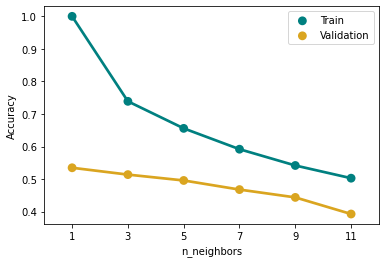

In [98]:
values_try_knn = [1,3,5,7,9,11]
results_train, results_val = get_models_knn(X, values_try_knn)
point_plot(results_train, results_val, values_try_knn)

__CONCLUSION__: <br>
It seems that the best value of number of neighbors to keep is 5 neighbors.

__`Step 14`__ - Create an instance of the model chosen for the algorithm KNN named as `final_model_knn`.

In [520]:
#final_model_knn = KNeighborsClassifier(n_neighbors = 5)
final_model_knn = KNeighborsClassifier(n_neighbors = 7)

<div class="alert alert-block alert-info">
    
<a class="anchor" id="18th-bullet">

### 4.2.2. Decision Trees
    
</a>
    
<b>class sklearn.tree.DecisionTreeClassifier</b>(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
</div>

In Decision Trees, the hyperparameter `max_depth` defines the number of levels our decision tree is going to have. Usually, a higher value leads to overfitting and a lower value to underfitting.

__`Step 15`__ Simillarly to what was done in Step 12, for the function `get_models_knn`, this time create a function to Decision Trees called `get_models_dt`. Instead of applying a KNeighborsClassifier with `n_neighbors = value`, we are going to test different depths of the decision tree with `max_depth = value`.

In [521]:
def get_models_dt(data, values):
    models = dict()
    results_train, results_val = [],[]
    
    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = DecisionTreeClassifier(max_depth = value, random_state = 99)
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        
    return results_train, results_val

__`Step 16`__ In this step:
- Define a list of number of maximum depths to test, namely [1,2,3,4,5,6,7,8,9]. 
- Call the function previously defined `get_models_dt` passing as arguments your data set and the list of depths.
- Call the function `point_plot`passing as arguments the results of the training data set, the results of the validation data set and the values of depths that you try.

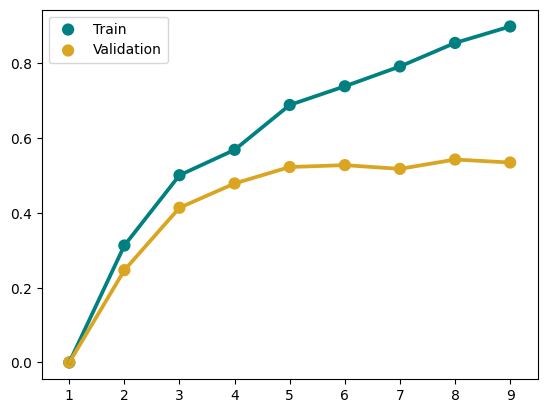

In [522]:
values_try_dt = [1,2,3,4,5,6,7,8,9]
results_train, results_val = get_models_dt(X, values_try_dt)
point_plot(results_train, results_val, values_try_dt)

__CONCLUSION__: <br>
It seems that the best value of levels to keep is 5 levels, due to the higher value in validation without much trade off in train-validation distance.

__`Step 17`__ Create an instance of the model chosen for the algorithm DecisionTree named as `final_model_dt`.

In [288]:
final_model_dt = DecisionTreeClassifier(max_depth = 5, random_state = 99)

<a class="anchor" id="19th-bullet">

#### 4.2.2.1. ADDITIONAL: HOW TO VISUALIZE TREES
    
</a>

To visualize a decision tree, you need to create just one single model. For that, we are going to use train_test_split to apply an holdout method.

In [523]:
data = X.copy()

X_x = data.drop(['DepVar'], axis = 1)
y_y = data['DepVar'].copy()

X_train, X_val, y_train, y_val = train_test_split(X_x, y_y, test_size = 0.2, random_state = 99, stratify = y_y)
X_train, X_val = transform_data(X_train, X_val, X_2nd_df_flag = True)

In [88]:
def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train.columns,
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

In [525]:
dt_visual = final_model_dt.fit(X_train, y_train)

In [526]:
plot_tree(dt_visual)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<div class="alert alert-block alert-info">
    
<a class="anchor" id="20th-bullet">

### 4.2.3. Neural Networks
    
</a>

In [99]:
def get_models_nn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]
    
    # create the instances of each model with different values
    for value in values:
        models[str(value)] = MLPClassifier(hidden_layer_sizes = value, max_iter = 2000, random_state = 99)
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

Elapsed time: 1.71 minutes.


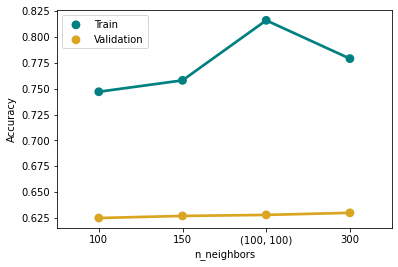

In [100]:
start_time = time.time()

################################

values_try = [(100),(150),(100,100),(300)]
results_train, results_val, names = get_models_nn(X, values_try)
point_plot(results_train, results_val, names)

################################

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {round(elapsed_time/60, 2)} minutes.")

<div class="alert alert-block alert-info">
    
<a class="anchor" id="20th-bullet">

### 4.2.4. Logistic Regression
    
</a>

In [529]:
data = X.copy()

X_data = data.drop(['DepVar'], axis = 1)

y_data = data['DepVar'].copy()

X_data = transform_data(X_train = X_data, X_2nd_df_flag = False)

from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
model_lr = LogisticRegression()

# Define the parameter grid for grid search

param_grid = {

    'penalty': ['l1', 'l2'],  # Regularization penalty

     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength

    'solver': ['liblinear', 'saga']  # Solver algorithm

}

grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_data, y_data) 

# Get the best parameter values and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

print("Best Score:", best_score)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.5791689442632839


In [732]:
final_model_LR = LogisticRegression(C = 10, penalty = 'l1', solver = 'saga')

<a class="anchor" id="21st-bullet">

### 4.2.4. RandomSearch
    
</a>

RandomizedSearchCV is a function provided by Scikit-learn (sklearn) that is used for hyperparameter tuning. While GridSearchCV exhaustively explores all possible combinations of hyperparameters, RandomizedSearchCV randomly samples a specified number of combinations from the parameter grid.

The random sampling of parameter combinations makes RandomizedSearchCV more efficient than GridSearchCV for large hyperparameter spaces. It allows you to define the number of iterations to control the search space exploration. RandomizedSearchCV selects the hyperparameter values randomly for each iteration and evaluates them using cross-validation.

Similar to GridSearchCV, RandomizedSearchCV returns the best set of hyperparameters based on a specified performance metric. The best hyperparameters can then be used to train a final model on the full dataset for making predictions.

RandomizedSearchCV is particularly useful when the hyperparameter search space is large and you want to explore a subset of it efficiently. It is a good choice when you have a limited computational budget or when you want to get a sense of the hyperparameter space before performing a more focused search using GridSearchCV.

__NOTE:__ RandomizedSearch do the process of cross validation inside the method itself. In this way, we are going to use the full data set and do all the needed changes and transformations on the data before applying the RandomizedSearch.

In theory, the best approach would be doing the needed changes inside the GridSearch, since we know that we want to use only information to fill missing data, scale the data, and so on. However, we are not be able to do this inside GridSearch without the usage of pipelines, which are not approached in this course.

__`Step 20`__ Create a copy of keep_data named as `data` and define the independent variables as `X_data` and the target as `y_data`. Transform the data as needed by calling the function `transform_data`. 

In [91]:
data = X.copy()

X_data = data.drop(['DepVar'], axis = 1)
y_data = data['DepVar'].copy()

X_data = transform_data(X_train = X_data, X_2nd_df_flag = False)

In [734]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

__`Step 21`__ Create an instance of MLPClassifier named as `nn` with `max_iter = 2000` and `random_state = 99`.

In [92]:
nn = MLPClassifier(max_iter = 2000, random_state = 99)
#lg = LogisticRegression()

__`Step 22`__ Define a dictionary named as __parameter_space_random__ and define the following options to be considered during modelling:
- 'hidden_layer_sizes': [(280),(290),(300),(310),(320)],
- 'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
- 'learning_rate': ['constant', 'invscaling','adaptive'],
- 'solver': ['sgd','adam'],
- 'activation': ['logistic','relu']

In [94]:
parameter_space_random = {
    'hidden_layer_sizes': [(100),(200),(300)],
    'learning_rate_init': [0.0001, 0.001, 0.01], #normalmente são estes os valores para começar
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    #'activation': ['logistic','relu']
}

__`Step 23`__ Create an instance of RandomizedSearchCV named as __random_search__ and pass as parameters the model __nn__, the __parameter_space_random__, define `scoring = f1`, `cv = 5` and `random_state = 42`.

In [95]:
random_search = RandomizedSearchCV(nn, param_distributions=parameter_space_random, 
                                   scoring = 'f1', cv=5, random_state = 42)

__`Step 24`__ Fit your instance to __X_data__ and __y_data__. <br>
Call the attribute __best_params___ to check which is the best combination of parameters<br>
Call the attribute __best_score___ to obtain the mean cross-validated score of the best_estimator.

In [96]:
start_time = time.time()

################################


random_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

################################

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {round(elapsed_time/60, 2)} minutes.")

Best Hyperparameters:  {'solver': 'adam', 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': 100}
Best Score:  0.6272910125367785
Elapsed time: 7.13 minutes.


<a class="anchor" id="22nd-bullet">

### 4.2.5. GridSearch
    
</a>



Another approach is using GridSearch that performs an exhaustive search over specified parameter values for an estimator. <br>
It is used for hyperparameter tuning, which involves finding the best combination of hyperparameters for a machine learning model.

To use GridSearchCV, you provide a parameter grid, which is a dictionary or a list of dictionaries containing the hyperparameters and their corresponding values to explore. The function then evaluates all possible combinations of hyperparameters using cross-validation. It trains and evaluates the model with each combination and returns the best set of hyperparameters that optimize a specified performance metric, such as accuracy or F1 score.

GridSearchCV systematically explores the entire parameter grid, making it computationally expensive for large grids or complex models. However, it ensures that you find the optimal hyperparameters by considering all possible combinations. Once you have the best hyperparameters, you can use them to train a final model on the full dataset for making predictions.

__`Step 25`__ Define a dictionary named as __parameter_space_grid__ and define the following options to be considered during modelling:
- 'hidden_layer_sizes': [(310)],
- 'learning_rate_init': [0.01, 0.005, 0.015],
- 'learning_rate': ['adaptive'],
- 'solver': ['adam'],
- 'activation': ['relu','logistic]

<a class="anchor" id="22nd-bullet">

#### 4.2.5.1. Decision Tree
    
</a>

In [739]:
data = X_responses_bin.copy()

X_data = data.drop(['DepVar'], axis = 1)
y_data = data['DepVar'].copy()

X_data = transform_data(X_train = X_data, X_2nd_df_flag = False)

In [740]:
parameter_space_grid = {
    'criterion': ['gini'],
    'splitter':['best', 'random'],
    'max_depth': [3, 4, 5, 6],
    'max_features': ['auto', 'sqrt']}

In [741]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = 99)

In [742]:
grid_search = GridSearchCV(dt, parameter_space_grid, scoring = 'f1', return_train_score = True, cv = 5)

In [743]:
start_time = time.time()

################################

grid_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

################################

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {round(elapsed_time/60, 2)} minutes.")

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}
Best Score:  0.460019685920093
Elapsed time: 0.01 minutes.


In [744]:
final_model_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_features = 'auto', 
                                        splitter = 'best', random_state = 99)

<a class="anchor" id="22nd-bullet">

#### 4.2.5.1. Neural Networks
    
</a>

In [97]:
data = X_responses_bin.copy()

X_data = data.drop(['DepVar'], axis = 1)
y_data = data['DepVar'].copy()

X_data = transform_data(X_train = X_data, X_2nd_df_flag = False)

NameError: name 'X_responses_bin' is not defined

In [746]:
#from imblearn.over_sampling import SMOTE

 #Apply SMOTE to the training set
#sm = SMOTE(random_state=42)
#X_data, y_data = sm.fit_resample(X_data, y_data)

In [747]:
parameter_space_grid = {
    'hidden_layer_sizes': [(100), (150), (300)],
    'learning_rate_init': [0.01, 0.015],
    'learning_rate': ['adaptive'],
    'solver': ['adam'],
    'activation': ['relu'],
    'validation_fraction': [0.1, 0.2, 0.3, 0.4],
    'early_stopping': [True, False]
}

__`Step 26`__ Create an instance of GridSearchCV named as __grid_search__ and pass as parameters the model __nn__, the __parameter_space_grid__, define `scoring = f1` and `cv = 5`.

In [748]:
grid_search = GridSearchCV(nn, parameter_space_grid, scoring = 'f1', return_train_score = True, cv = 5)

__`Step 27`__ Fit your instance to __X_data__ and __y_data__. <br>
Call the attribute __best_params___ to check which is the best combination of parameters<br>
Call the attribute __best_score___ to obtain the mean cross-validated score of the best_estimator.

In [749]:
start_time = time.time()

################################

grid_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

################################

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {round(elapsed_time/60, 2)} minutes.")

__`Step 28`__ Create an instance of the model chosen for the algorithm MLPClassifier named as `final_model_nn`.

In [98]:
final_model_nn = MLPClassifier(max_iter = 2000, hidden_layer_sizes = 100,
                               activation = 'relu', learning_rate = 'adaptive', learning_rate_init = 0.001, 
                               solver = 'adam', random_state = 99)

<a class="anchor" id="22.2nd-bullet">

#### 4.2.5.2. SVM
    
</a>

In [ ]:
data = X.copy()

X_data = data.drop(['DepVar'], axis = 1)
y_data = data['DepVar'].copy()

X_data = transform_data(X_train = X_data, X_2nd_df_flag = False)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_SVM = SVC(probability = True)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 1000, 100],
    'gamma': [0.1, 1, 5, 'scale'],
    'kernel': ['rbf']

    # Add more parameters to tune
}

# Perform grid search with cross-validation

grid_search = GridSearchCV(model_SVM, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_data, y_data)

# Get the best parameter values and corresponding score

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.585232924487224


In [ ]:
final_model_svm = SVC(C = 100, gamma = "scale", kernel = 'rbf', probability = True)

<a class="anchor" id="22.3nd-bullet">

#### 4.2.5.3. XGB
    
</a>

In [ ]:
data = X.copy()

X_data = data.drop(['DepVar'], axis = 1)
y_data = data['DepVar'].copy()

X_data = transform_data(X_train = X_data, X_2nd_df_flag = False)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model_XGB = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [5, 8, 10],
    'max_leaves': [8, 16, 32]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model_XGB, param_grid, cv=3, scoring='f1', return_train_score=True)
grid_search.fit(X_data, y_data)

# Get the best parameter values and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'max_leaves': 8, 'min_child_weight': 8, 'n_estimators': 100}
Best Score: 0.685365258896304


In [ ]:
final_model_xgb = XGBClassifier(gamma = 0, learning_rate = 0.1, max_depth = 10, n_estimators = 100, 
                                min_child_weight = 8, max_leaves = 8)

<a class="anchor" id="22.3nd-bullet">

#### 4.2.5.3. Random Forest
    
</a>

In [ ]:
data = X.copy()

X_data = data.drop(['DepVar'], axis = 1)
y_data = data['DepVar'].copy()

X_data = transform_data(X_train = X_data, X_2nd_df_flag = False)

In [ ]:
#from imblearn.over_sampling import SMOTE

#Apply SMOTE to the training set
#sm = SMOTE(random_state=42)
#X_data, y_data = sm.fit_resample(X_data, y_data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_RF = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [2,3,5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model_RF, param_grid, cv=3, scoring='f1', return_train_score=True)
grid_search.fit(X_data, y_data)

# Get the best parameter values and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'bootstrap': False, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.4150666975094457


In [ ]:
final_model_RF= RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=2 ,max_features="sqrt" ,  bootstrap=False )

<a class="anchor" id="23rd-bullet">

### 4.2.6. Select the winner model
    
</a>

<a class="anchor" id="24th-bullet">

#### 4.2.6.1. COMPARE THE PERFORMANCE
    
</a>

Let's compare our final models:

__`Step 29`__ Compare the models using the function defined previoulsy `show_results`.

In [ ]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ["BestLR", 'Best KNN','Best DT', 'Best NN',"Best SVM","Best XGB", "Best RF"])

show_results(df_final_models, X, final_model_LR, final_model_knn, final_model_dt, final_model_nn, final_model_svm ,final_model_xgb,final_model_RF)

,Train,Validation,Delta Train - Validation
BestLR,0.579+/-0.01,0.575+/-0.05,0.004
Best KNN,0.592+/-0.01,0.469+/-0.07,0.123
Best DT,0.573+/-0.08,0.409+/-0.09,0.164
Best NN,0.816+/-0.03,0.613+/-0.06,0.203
Best SVM,0.782+/-0.02,0.578+/-0.06,0.204
Best XGB,0.829+/-0.01,0.658+/-0.02,0.171
Best RF,0.524+/-0.03,0.416+/-0.04,0.108


<a class="anchor" id="25th-bullet">

#### __4.2.6.2. PLOT A ROC CURVE__
    
</a>

__`Step 30`__ Now we are going to compare our models using a ROC CURVE. To plot a ROC Curve, we need to create just one single model, and not several as we have when we apply StratifiedKFold.

Create a copy of `keep_data` as `data` and define your independent variables as `X_data` and your target as `y_data`.

In [99]:
data = X.copy()

X_data = data.drop('DepVar', axis = 1)
y_data = data['DepVar']

__`Step 31`__ Split your dataset into train and validation using train_test_split, where `train_size = 0.8`, `random_state = 99` and `stratify = y_data`.

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, 
                                                  train_size = 0.8, 
                                                  random_state = 99, 
                                                  stratify = y_data)

__`Step 32`__ Apply the needed transformations by calling the `transform_data` function and fit your three models in the training data.

In [101]:
X_train, X_val = transform_data(X_train, X_val, X_2nd_df_flag = True)

#model_lr = final_model_LR.fit(X_train, y_train)
#model_knn = final_model_knn.fit(X_train, y_train)
#model_dt = final_model_dt.fit(X_train, y_train)
model_nn = final_model_nn.fit(X_train, y_train)
#model_svm = final_model_svm.fit(X_train, y_train)
#model_xgb = final_model_xgb.fit(X_train, y_train)
#model_RF =  final_model_RF.fit(X_train, y_train)

__`Step 33`__ Use the `.predict_proba()` method of `modelknn` to obtain the probability estimates for the `X_val` and assign it to the object `prob_modelKNN`. Do the same for the other models, and assign it to `prob_modelDT` and `prob_modelNN`.

In [102]:
#prob_modelKNN = model_knn.predict_proba(X_val)
#prob_modelDT =  model_dt.predict_proba(X_val)
prob_modelNN =  model_nn.predict_proba(X_val)
#prob_modelSVM = model_svm.predict_proba(X_val)
#prob_modelXGB = model_xgb.predict_proba(X_val)
#prob_modelLR = model_lr.predict_proba(X_val)
#prob_modelRF = model_RF.predict_proba(X_val)

#dá-nos a probabilidade para cada row de ser 0 e ser 1

__`Step 34`__ Call roc_curve() for the three different models. In this way, you should: <br>
1) For the first roc curve, call the roc_curve metric and define the arguments `y_true` equal to `y_val` and `y_score` equal to `prob_modelKNN[:, 1]`. Assign the results to `fpr_modelKNN`, `tpr_modelKNN` and `thresholds_modelKNN`. <br>
2) Repeat the same procedure to the remaining models, changing the names of the objects accordingly.

In [103]:
#fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val, y_score = prob_modelKNN[:,1])
#fpr_modelDT, tpr_modelDT, thresholds_modelDT = roc_curve(y_val, prob_modelDT[:,1])
fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val, prob_modelNN[:,1])
#fpr_modelSVM, tpr_modelSVM, thresholds_modelSVM = roc_curve(y_val, prob_modelSVM[:,1])
#fpr_modelXGB, tpr_modelXGB, thresholds_modelXGB = roc_curve(y_val, prob_modelXGB[:,1])
#fpr_modelLR, tpr_modelLR, thresholds_modelLR = roc_curve(y_val, prob_modelLR[:,1])

#fpr_modelRF, tpr_modelRF, thresholds_modelRF = roc_curve(y_val, prob_modelRF[:,1])

__`Step 35`__ The purpose of this step is to plot the roc curve associated to each model. Do the following instructions in only one single cell, so the three roc curves appear in the same visualization. <br>
1) Create a plot using the function `plt.plot()`, where the data to be represented is going to be the `fpr_modelKNN`, `tpr_modelKNN`, and `label="ROC Curve KNN"` <br>
2) Similarly to the previous step, plot now the values regarding `modelDT` <br>
3) Similarly to the previous step, plot now the values regarding `modelNN` <br>
4) call the function plt.legend()
5) Call the function plt.show()

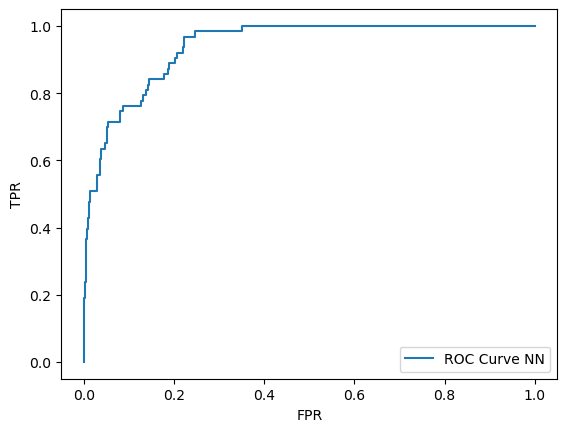

In [104]:
#plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
#plt.plot(fpr_modelDT, tpr_modelDT, label="ROC Curve DT")
plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
#plt.plot(fpr_modelSVM, tpr_modelSVM, label="ROC Curve SVM")
#plt.plot(fpr_modelXGB, tpr_modelXGB, label="ROC Curve XGB")
#plt.plot(fpr_modelLR, tpr_modelLR, label="ROC Curve LR")
#plt.plot(fpr_modelRF, tpr_modelRF, label="ROC Curve RF")

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

<a class="anchor" id="26th-bullet">

#### 4.2.6.3. CHANGE THE THRESHOLD
    
</a>

At this point, you already know which are the best hyperparameters of your best model. <br>
The last thing you can try out to improve the performance of your model is to change the threshold of what you consider a positive prediction vs a negative prediction. <br>
By default, that threshold is 0.5, i.e., observations where the probability of being 1 is equal or higher to 0.5 are considered positive, otherwise negative.

Like we did to plot the ROC Curve, in this case we are just going to use one partition, provided by the train_test_split on `Step 31.`


__`Step 36`__ Fit your final model to the training data.

In [105]:
final_model_nn = final_model_nn.fit(X_train, y_train)
#final_model_knn = final_model_knn.fit(X_train, y_train)
#final_model_dt = final_model_dt.fit(X_train, y_train)
#final_model_svm = final_model_svm.fit(X_train, y_train)
#final_model_xgb = final_model_xgb.fit(X_train, y_train)
#final_model_LR = final_model_LR.fit(X_train, y_train)
#final_model_RF = final_model_RF.fit(X_train, y_train)

__`Step 37`__ Calculate the probabilities associated with each observation in X_val being of class 0 or 1.

In [106]:
predict_proba_nn = final_model_nn.predict_proba(X_val)
#predict_proba_dt = final_model_dt.predict_proba(X_val)
#predict_proba_xgb = final_model_xgb.predict_proba(X_val)
#predict_proba_lr = final_model_LR.predict_proba(X_val)
#predict_proba_RF = final_model_RF.predict_proba(X_val)


In [107]:
from sklearn.metrics import precision_recall_curve

def get_threshold_per_model(x):
    precision, recall, thresholds = precision_recall_curve(y_val, x[:,1])

    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore)
    return thresholds[ix]

def get_thresholds(all_predict_proba):
    thresholds = []
    for predict_proba in all_predict_proba:
        threshold = get_threshold_per_model(predict_proba)
        thresholds.append(threshold)
    return thresholds

predict_proba_nn = final_model_nn.predict_proba(X_val)
#predict_proba_knn =  final_model_knn.predict_proba(X_val)
#predict_proba_dt = final_model_dt.predict_proba(X_val)
#predict_proba_svm = final_model_svm.predict_proba(X_val)
#predict_proba_xgb = final_model_xgb.predict_proba(X_val)
#predict_proba_RF=final_model_RF.predict_proba(X_val)



__`Step 38`__ The purpose of this step is to plot the precision recall curve associated to the best model. <br>
1) Import precision_recall_curve from sklearn.metrics<br>
2) Get the precision, the recall and the thresholds from your precision recall curve<br>
3) Check what is the threshold for the best f1 score<br>
4) Plot the precision recall curve and the best threshold.<br>

Best Threshold=0.297991, F-Score=0.687


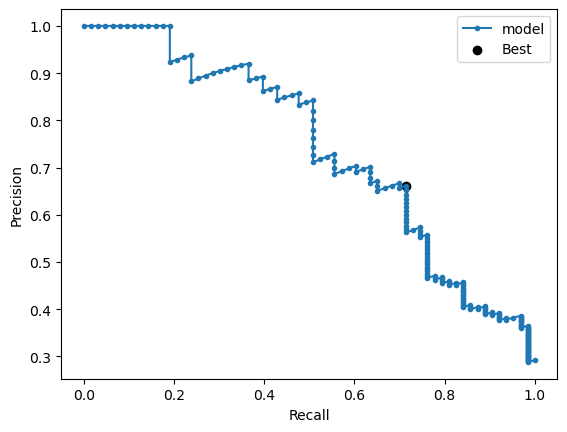

In [109]:
precision, recall, thresholds = precision_recall_curve(y_val, predict_proba_nn[:,1])

# apply f1 score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

plt.plot(recall, precision, marker='.', label='model')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [110]:
all_predict_proba = [predict_proba_nn]#, predict_proba_knn, predict_proba_dt, predict_proba_svm, predict_proba_xgb,  predict_proba_RF]

thresholds = get_thresholds(all_predict_proba)

<a class="anchor" id="27th-bullet">

# 5. Deploy

</a>

You used the previous steps of modelling and assessment to determine what would be the best strategies when it comes to preprocessing, scaling, feature selection, algorithm and hyper-parameters you could find. 

**By this stage, all of those choices were already made**. For that reason, a split between training and validation is no longer necessary. **A good practice** would be to take the initial data and train a final model with all of the labeled data that you have available.

In [111]:
train = X.copy()

X_train = X.drop(['DepVar'], axis = 1)
y_train = X['DepVar']

**Everything is figured by this stage**, so, on a first level all you need to do is replicate the exact preprocessing, scaling and feature selection decisions you made before.<br>
When it comes to the final model, all you have to do is creeate a new instance of your best algorithm with the best parameters that you uncovered (no need to try all algorithms and hyper-parameters again).

<div class="alert alert-block alert-success">

<a class="anchor" id="28th-bullet">

## 5.1. Import your test data and apply transformations
    
</a>
    
</div>

__`Step 39`__ Remember, the test data does not have the `outcome` variable.

In [112]:
test = df_predict[['CustomerID','Marital_Status', 
             'Recency', 'MntVegan&Vegetarian', 'MntAdditionalRequests', 'NumAppVisitsMonth', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Response_Cmp1' ]].copy() 

# now we have all the columns needed

test.set_index(['CustomerID'], inplace = True)

# Data Cleaning 
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import calendar

# Define a function to transform data and feature engineering

def data_Transf(datafr):
    # 3. Marital_Status
    ## Check unique values
    print("\nThere are {} nulls.".format(len(datafr.loc[datafr["Marital_Status"].isnull()])))
    print("\n")
    print("The unique values in the Marital Status column are: {}.".format(list(set(list(datafr['Marital_Status'])))))
    print("\n")

    #Correct labels (Capital Letters, etc)
    datafr['Marital_Status']=datafr['Marital_Status'].str.lower()
    print("After the data transformation, the unique values, in the Marital Status column, are: {}.".format(list(set(list(datafr['Marital_Status'])))))

    # 7. Numerical Variables
    print("\nAnalyze Numerical Variables")
    numerical_vars = datafr.select_dtypes(include=['int64', 'float64']).columns
    print(numerical_vars)
    numerical_vars_with_nans = datafr[numerical_vars].isna().sum()[datafr[numerical_vars].isna().sum() > 0].index
    print("\nThe numerical variables with NaNs are:",list(numerical_vars_with_nans))
    
    # 8. Numerical Variables - Recency
    ## Fill NaNS for Recency | we should see which variables are higher correlated and select those
    corrRecency = datafr.corr()['Recency']
    #This will return a pandas Series object with the top 5 variables that have the highest absolute correlation with MntDrinks.
    #The abs() method is used to get the absolute values of the correlation coefficients, and the [1:6] notation is used to exclude the MntDrinks variable itself from the list of top correlated variables.
    top_Recency = corrRecency.abs().sort_values(ascending=False)[1:6]
    print("\nThe most correlated variables are:",list(top_Recency.index))

    # Identify the numerical variables with NaNs
    numerical_vars_with_nans = datafr.select_dtypes(include=['int64', 'float64']).columns[datafr.select_dtypes(include=['int64', 'float64']).isna().any()].tolist()

    # Subset the data into predictor and target variables
    predictors = datafr[list(top_Recency.index)]
    target = datafr[numerical_vars_with_nans]

    # Create a boolean mask indicating which rows in the target variable have NaNs
    mask = target['Recency'].isnull()

    # Split the dataset into training and test sets, using only the rows without NaNs in the target variable for training
    X_train, X_test, y_train, y_test = train_test_split(predictors[~mask], target['Recency'][~mask], test_size=0.2)

    # Instantiate a Random Forest model with 100 trees
    rf = RandomForestRegressor(n_estimators=100, max_depth=10)

    # Fit the Random Forest model on the training data
    rf.fit(X_train, y_train)

    # Predict the target variable values for the test set
    y_pred = rf.predict(X_test)

    # Calculate the mean absolute error, mean squared error, and R-squared
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('R-squared:', r2)

    # Predict the NaN values in the target variable using the trained model
    predicted_recency = rf.predict(predictors[mask])

    # Replace the NaN values with the predicted values in the original dataset
    datafr.loc[mask, 'Recency'] = predicted_recency

    # Check if any NaN values remain in the target variable
    print(datafr[numerical_vars_with_nans].isnull().sum())

In [113]:
data_Transf(test)


There are 0 nulls.


The unique values in the Marital Status column are: ['single', 'Single', 'together', 'Divorced', 'Widow', 'Married', 'divorced', 'widow', 'Together', 'married'].


After the data transformation, the unique values, in the Marital Status column, are: ['single', 'together', 'divorced', 'widow', 'married'].

Analyze Numerical Variables
Index(['Recency', 'MntVegan&Vegetarian', 'MntAdditionalRequests',
       'NumAppVisitsMonth', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4',
       'Response_Cmp5', 'Response_Cmp1'],
      dtype='object')

The numerical variables with NaNs are: ['Recency']

The most correlated variables are: ['Response_Cmp3', 'Response_Cmp4', 'MntAdditionalRequests', 'MntVegan&Vegetarian', 'Response_Cmp2']
Mean Absolute Error: 25.90146034462416
Mean Squared Error: 898.3100771523194
R-squared: -0.0756498869428428
Recency    0
dtype: int64


__`Step 40`__ Apply all the needed transformations in your training data and your test data.

In [115]:
train, test = transform_data(X_train, test, X_2nd_df_flag = True)

__`Step 41`__ Train your final model in the training data.

In [116]:
final_model_nn = final_model_nn.fit(train, y_train)
#final_model_knn = final_model_knn.fit(train, y_train)
#final_model_dt = final_model_dt.fit(train, y_train)
#final_model_svm = final_model_svm.fit(train, y_train)
#final_model_xgb = final_model_xgb.fit(train, y_train)
#final_model_LR = final_model_LR.fit(train, y_train)
#final_model_RF = final_model_RF.fit(train, y_train)

<div class="alert alert-block alert-success">

<a class="anchor" id="29th-bullet">

## 5.2. Obtain Predictions on the test data from your final model
    
</a>
    
</div>

__`Step 42`__ Obtain the predictions of the probabilities of your final model in the test data. by calling the method `predict_proba()`.

In [117]:
final_model_nn_predict = final_model_nn.predict(test)
#final_model_knn_predict = final_model_knn.predict(test)
#final_model_dt_predict = final_model_dt.predict(test)
#final_model_svm_predict = final_model_svm.predict(test)
#final_model_xgb_predict = final_model_xgb.predict(test)
#final_model_LR_predict = final_model_LR.predict(test)
#final_model_RF_predict = final_model_RF.predict(test)

In [119]:
predict_proba_test_nn = final_model_nn.predict_proba(test)
#predict_proba_test_knn =  final_model_knn.predict_proba(test)
#predict_proba_test_dt = final_model_dt.predict_proba(test)
#predict_proba_test_svm = final_model_svm.predict_proba(test)
#predict_proba_test_xgb = final_model_xgb.predict_proba(test)
#predict_proba_test_LR = final_model_LR.predict_proba(test)
#predict_proba_test_RF = final_model_RF.predict_proba(test)

__`Step 43`__ Define your final predictions, by changing the threshold of what is accepted as 1 and as 0. 

In [120]:
final_pred = []

for value in predict_proba_test_nn[:,1]:
    if (value>=0.297991):
        final_pred.append(1)
    else:
        final_pred.append(0)

final_pred

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [670]:
final_pred_LR = []
final_pred_nn = []
final_pred_knn = []
final_pred_dt = []
final_pred_svm = []
final_pred_xgb = []
final_pred_RF = []

In [671]:
#--------------------------------------------------#

for value in predict_proba_test_nn[:,1]:
    if (value>=thresholds[0]):
        final_pred_nn.append(1)
    else:
        final_pred_nn.append(0)

#--------------------------------------------------#

for value in predict_proba_test_knn[:,1]:
    if (value>=thresholds[1]):
        final_pred_knn.append(1)
    else:
        final_pred_knn.append(0)

#--------------------------------------------------#

for value in predict_proba_test_dt[:,1]:
    if (value>=thresholds[2]):
        final_pred_dt.append(1)
    else:
        final_pred_dt.append(0)
#--------------------------------------------------#

for value in predict_proba_test_svm[:,1]:
    if (value>=thresholds[3]):
        final_pred_svm.append(1)
    else:
        final_pred_svm.append(0)
#--------------------------------------------------#

for value in predict_proba_test_xgb[:,1]:

    if (value>=thresholds[4]):

        final_pred_xgb.append(1)

    else:

        final_pred_xgb.append(0)

#--------------------------------------------------#

In [679]:
from collections import Counter

Counter(final_pred_xgb)
Counter(final_pred_nn)

Counter({0: 2243, 1: 257})

In [677]:
from collections import Counter

def majority_voting_ensemble(all_models, thresholds):

    ensemble_predictions = []

    for i in range(len(all_models[0])):

        votes = []

        for j, model in enumerate(all_models):

            if model[i][1] >= thresholds[j]:

                votes.append(1)

            else:

                votes.append(0)

        majority_vote = Counter(votes).most_common(1)[0][0]

        ensemble_predictions.append(majority_vote)

    return ensemble_predictions


# Example usage

all_models = [predict_proba_test_nn, predict_proba_test_xgb]

thresholds = [thresholds[0], thresholds[4]]

ensemble_predictions = majority_voting_ensemble(all_models, thresholds)

print(ensemble_predictions)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 

In [678]:
Counter(ensemble_predictions)

Counter({0: 2243, 1: 257})

<div class="alert alert-block alert-success">

<a class="anchor" id="30th-bullet">

## 5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file
    
</a>
    
</div>

__`Step 44`__ Create a new DataFrame, and add as column `Custid` the values of the `Custid` for each customer in the test data set, and a column named `DepVar` where you will store the preditions of your final model in the test data. Save those results in a .csv file.

In [456]:
#answerLR= pd.DataFrame()

#answerLR['CustomerID'] = test.index

#answerLR['DepVar'] = final_pred_LR

#--------------------------------------------------#

answerNN= pd.DataFrame()

answerNN['CustomerID'] = test.index

answerNN['DepVar'] = final_pred_nn


#--------------------------------------------------#

answerknn= pd.DataFrame()

answerknn['CustomerID'] = test.index

answerknn['DepVar'] = final_pred_knn


#--------------------------------------------------#




answerdt= pd.DataFrame()

answerdt['CustomerID'] = test.index

answerdt['DepVar'] = final_pred_dt





#--------------------------------------------------#

answerSVM= pd.DataFrame()

answerSVM['CustomerID'] = test.index

answerSVM['DepVar'] = final_pred_svm






#--------------------------------------------------#

answerXGB= pd.DataFrame()

answerXGB['CustomerID'] = test.index

answerXGB['DepVar'] = final_pred_xgb

#--------------------------------------------------#




answerEnsemble= pd.DataFrame()

answerEnsemble['CustomerID'] = test.index

answerEnsemble['DepVar'] = ensemble_predictions

#--------------------------------------------------#

In [121]:
answer = pd.DataFrame()
answer['CustomerID'] = test.index
answer['DepVar'] = final_pred

#answer['DepVar'] = ensemble_predictions
answer.head(20)

,CustomerID,DepVar
0,3102,0
1,3105,1
2,3108,1
3,3111,0
4,3120,0
5,3123,0
6,3126,0
7,3132,0
8,3135,0
9,3138,0


In [122]:
answer['DepVar'].value_counts()

0    2124
1     376
Name: DepVar, dtype: int64

In [123]:
answer.to_csv('Final_Answer.csv', index = False)

In [ ]:
answerLR.to_csv('answerLR.csv', index = False)

answerNN.to_csv('answerNN.csv', index = False)

answerknn.to_csv('answerknn.csv', index = False)

answerdt.to_csv('answerdt.csv', index = False)

answerSVM.to_csv('answerSVM.csv', index = False)

answerXGB.to_csv('answerXGB.csv', index = False)

answerEnsemble.to_csv('answerEnsemble.csv', index = False)

In [ ]:
print("\nThe most correlated variables are:",list(top_corrDepVar.index))

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Separate the input features (X) from the output variable (y)
X = df_historical.drop(['CustomerID', 'Name', 'Date_Adherence', 'DepVar',"Marital_Status"], axis=1)
y = df_historical['DepVar']

# Initialize the logistic regression model
model = LogisticRegression(solver='liblinear')

# Initialize the RFE object, setting the number of desired features to 10
rfe = RFE(model, n_features_to_select=5)

# Fit the RFE object to the training data
rfe.fit(X, y)

# Print the selected features
selected_features = X.columns[rfe.support_]
print(selected_features)

**Feature Importance method**

In [ ]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Split data into features and target
X = df_historical.drop(['CustomerID', 'Name', 'Date_Adherence', 'DepVar',"Marital_Status"], axis=1)
y = df_historical['DepVar']

# Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances from Random Forest
rf_importances = pd.DataFrame({'feature': X.columns,
                               'importance': rf_model.feature_importances_})
rf_importances = rf_importances.sort_values('importance', ascending=False)

# Fit Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X, y)

# Get feature importances from Gradient Boosting
gb_importances = pd.DataFrame({'feature': X.columns,
                               'importance': gb_model.feature_importances_})
gb_importances = gb_importances.sort_values('importance', ascending=False)

In [ ]:
gb_importances[0:5]

In [ ]:
rf_importances[0:5]

**Ball Tree**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Split data into features and target
X = df_historical.drop(['CustomerID', 'Name', 'Date_Adherence', 'DepVar', 'Marital_Status'], axis=1)
y = df_historical['DepVar']

# Create Extra Trees Classifier model
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X, y)

# Print the feature importance scores
print(model.feature_importances_)

# Use the SelectFromModel function to select the important features
sfm = SelectFromModel(model, prefit=True)
X_selected = sfm.transform(X)

# Print the selected features
print(X.columns[sfm.get_support()])

**KDTree for feature selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KDTree

# Split data into features and target
X = df_historical.drop(['CustomerID', 'Name', 'Date_Adherence', 'DepVar',"Marital_Status"], axis=1)
y = df_historical['DepVar']

# Create KDTree object
kdt = KDTree(X)

# Calculate mutual information
mutual_info = mutual_info_classif(X, y, random_state=0)

# Select top k features based on mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get indices of selected features
indices = selector.get_support(indices=True)

# Print selected features
selected_features = X.columns[indices]
print("Selected features:", list(selected_features))

<div class="alert alert-block alert-warning">

<a id='stats'></a>

## 2.3. Modelling
    
</div>

### Random Forest

### Cross Validation

In [ ]:
#pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Split data into features and target
#X = df_historical.drop(['CustomerID', 'Name', "Birthyear","Gender",'Date_Adherence', 'DepVar',"Marital_Status"], axis=1)


X=df_historical[['Income', 'Recency', 'NumTakeAwayPurchases', 'Response_Cmp2', 'Response_Cmp4']]
X= X.astype(int)
y = df_historical['DepVar']
y = y.astype(int)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Create random forest classifier
rf = RandomForestClassifier(random_state=42)

# Use k-fold cross validation to evaluate the model
scores = cross_val_score(rf, X_res, y_res, cv=5, scoring='f1_macro')

# Print the average score across all folds
print("Cross Validation F1 Score: ", scores.mean())

# Train and test the model on the original dataset
rf.fit(X_res, y_res)
y_pred = rf.predict(X)
print("Accuracy Score: ", accuracy_score(y, y_pred))
print("Precision Score: ", precision_score(y, y_pred))
print("Recall Score: ", recall_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

#Tentar fazer a ROC Curve

### 80% train and 20% test

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Split data into features and target
X = [['Income', 'Recency', 'NumTakeAwayPurchases', 'Response_Cmp2', 'Response_Cmp4']]
X= X.astype(int)

y = df_historical['DepVar'].astype(int)

# Split the data into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Create random forest classifier
rf = RandomForestClassifier(n_estimators = 100000,random_state=42)

# Train the model on the resampled training set
rf.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Generate the ROC curve
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### SVM

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Split data into features and target
X = df_historical.drop(['CustomerID', 'Name', "Birthyear","Gender",'Date_Adherence', 'DepVar',"Marital_Status"], axis=1)
X= X.astype(int)

y = df_historical['DepVar'].astype(int)

# Split the data into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Create SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

# Train the model on the resampled training set
svm.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate evaluation metrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Generate the ROC curve
y_pred_prob = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

